## **Modern Analytics Final Project**

**Problem Statement:**
Develop a deep learning model to predict a movie's revenue based on available features such as genre, budget, cast, score, and release date.

**Problem Background/Scenario:**
In the movie industry, predicting the potential revenue of a film before its release is crucial for financial planning, marketing strategies, and investment decisions. Using a dataset of past movie performances and their associated attributes, a predictive model can provide valuable insights into how these factors contribute to a movie's success. This could assist studios, directors,  production houses, investors, and marketers in making data-driven decisions.


This is a semester final project for my deep learning class at Duke's Master of Quantitative Management Program taught by Professor Jiaming Xu. I am responsible for all the data analysis and coding aspects of this project; all the code in this file was completed exclusively by me.

Team #36: Bohan Bai (bb422), Meiyi Guo (mg483), Ethan Jaglal (enj13), Atharv Verma (av300), Jingwen Yu (jy421)

In [ ]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Source:**
https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset/data

**Deep Learning Approach:**

Data Preprocessing:

1. **Categorical Data Handling:** One-hot encoding for features like genre, orig_lang, and country.
2. **Text Processing:** Use word embeddings (e.g., Word2Vec, GloVe, or Transformer models like BERT) for features such as overview and crew to extract semantic information.
3. **Date Feature Engineering:** Extract information such as the month, quarter, and year from the date_x column to capture seasonality and trends.
Normalization: Scale numerical features like budget_x for better model convergence.

Model Architecture:
1. **Embedding Layers:** For handling categorical and text data.
2. **LSTM/GRU Layers:** If leveraging sequence data (e.g., release trends over time).
3. **Dense Layers:** Fully connected layers for combining all input features and making revenue predictions.
4. **Output Layer:** Single node for continuous revenue prediction using a linear activation function.



In [ ]:
# Load movie dataset
data = pd.read_csv("/content/drive/My Drive/MQM_Team36/Fall 2/Modern_Analytics/Final Project/imdb_movies.csv", encoding='utf-8')
data

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


## **Data Cleaning: Overall distribution, Handel Missing Values, Feature Engineering**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [ ]:
# Counting the number of zeros in each column
zeros_count = (data == 0).sum()

# Calculating the proportion of zeros in each column
zeros_proportion = zeros_count / len(data) * 100

# Displaying the result to the user
zeros_df = pd.DataFrame({
    'Zeros Count': zeros_count,
    'Zeros Proportion (%)': zeros_proportion
})

zeros_df

,Zeros Count,Zeros Proportion (%)
names,0,0.000000
date_x,0,0.000000
score,211,2.073099
genre,0,0.000000
overview,0,0.000000
crew,0,0.000000
orig_title,0,0.000000
status,0,0.000000
orig_lang,0,0.000000
budget_x,0,0.000000


In [ ]:
# Find and display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}")
    print('-' * 50)

Column: names
Unique Values (9660): ['Creed III' 'Avatar: The Way of Water' 'The Super Mario Bros. Movie' ...
 'The Russia House' 'Darkman II: The Return of Durant'
 'The Swan Princess: A Royal Wedding']
--------------------------------------------------
Column: date_x
Unique Values (5688): ['03/02/2023 ' '12/15/2022 ' '04/05/2023 ' ... '12/28/2016 ' '08/24/1990 '
 '07/20/2020 ']
--------------------------------------------------
Column: score
Unique Values (79): [ 73.  78.  76.  70.  61.  66.  80.  83.  59.  58.  55.  65.  72.  62.
  64.  57.  69.  74.  53.  71.  63.  60.  54.  52.  81.  68.  79.  67.
  47.  82.  43.  56.  75.   0.  77.  84.  49.  46.  30. 100.  48.  86.
  85.  50.  87.  37.  34.  20.  38.  35.  36.  44.  51.  45.  40.  27.
  10.  22.  90.  42.  25.  92.  33.  28.  29.  41.  15.  39.  32.  16.
  17.  23.  91.  93.  95.  13.  26.  98.  18.]
--------------------------------------------------
Column: genre
Unique Values (2304): ['Drama,\xa0Action' 'Science Fiction,\xa0Ad

In [ ]:
# Checking for missing values and their proportion
missing_values = data.isnull().sum()
missing_proportion = missing_values / len(data) * 100

# Summary statistics of the dataset
summary_stats = data.describe()

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,score,budget_x,revenue
score,1.000000,-0.23547,0.096533
budget_x,-0.235470,1.00000,0.673830
revenue,0.096533,0.67383,1.000000


In [ ]:
numeric_data

,score,budget_x,revenue
0,73.0,75000000.0,2.716167e+08
1,78.0,460000000.0,2.316795e+09
2,76.0,100000000.0,7.244590e+08
3,70.0,12300000.0,3.420000e+07
4,61.0,77000000.0,3.409420e+08
...,...,...,...
10173,73.0,7000000.0,9.353729e+06
10174,54.0,9145817.8,6.698361e+06
10175,61.0,21800000.0,2.299799e+07
10176,55.0,116000000.0,4.756613e+08


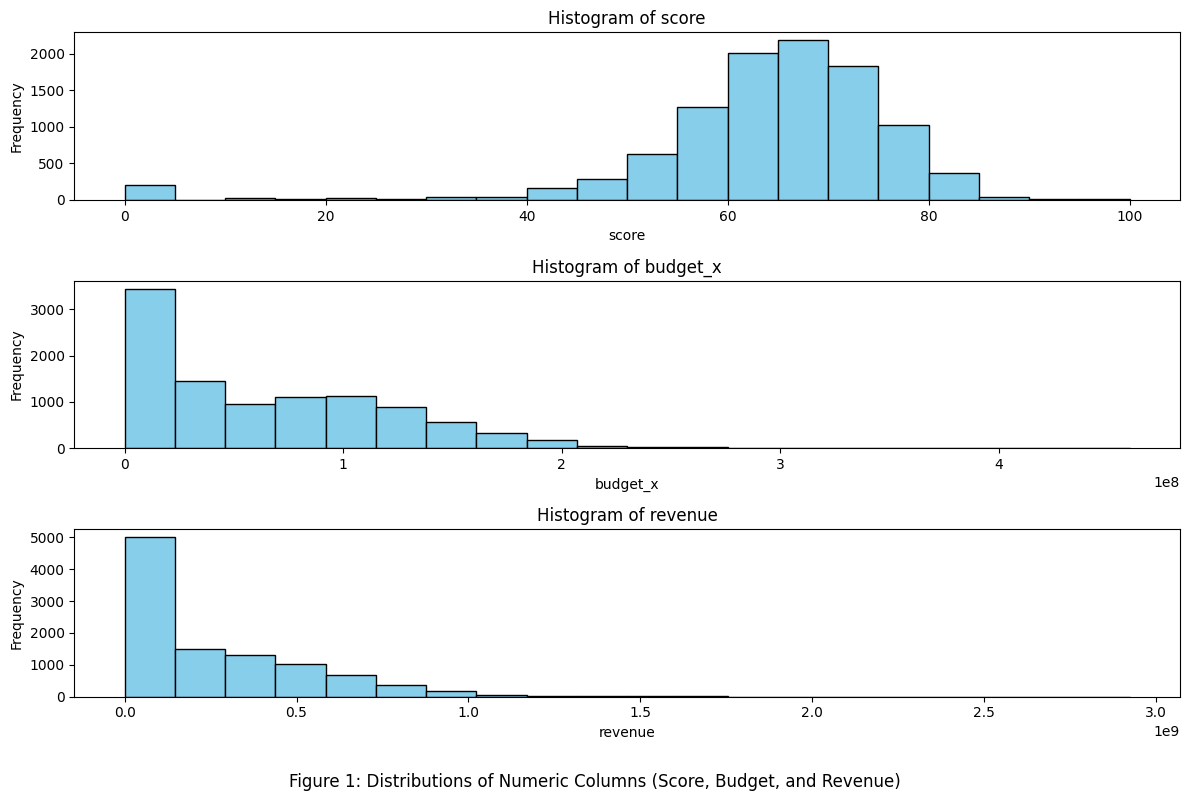

In [ ]:
# Create histograms for all numerical columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 1, i)
    plt.hist(numeric_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Add title at the bottom of the figure
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust space for the title
plt.figtext(0.5, 0.01, "Figure 1: Distributions of Numeric Columns (Score, Budget, and Revenue)",
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


In [ ]:
# Display missing values and their proportions
print("Missing Values and Proportions:\n", missing_proportion)

# Summary statistics of the dataset
summary_stats = data.describe()

# Display summary statistics
print("\nSummary Statistics:\n", summary_stats)

Missing Values and Proportions:
 names         0.000000
date_x        0.000000
score         0.000000
genre         0.835135
overview      0.000000
crew          0.550206
orig_title    0.000000
status        0.000000
orig_lang     0.000000
budget_x      0.000000
revenue       0.000000
country       0.000000
dtype: float64

Summary Statistics:
               score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min        0.000000  1.000000e+00  0.000000e+00
25%       59.000000  1.500000e+07  2.858898e+07
50%       65.000000  5.000000e+07  1.529349e+08
75%       71.000000  1.050000e+08  4.178021e+08
max      100.000000  4.600000e+08  2.923706e+09


In [ ]:
# 1. Handle columns with missing values
# Fill missing values for 'overview' and 'crew' columns
data['genre'] = data['genre'].fillna("Unaviliable")
data['crew'] = data['crew'].fillna("Unaviliable")

# 2. Remove duplicates
data = data.drop_duplicates()

In [ ]:
# 3. Organize numeric data
numeric_features = data.dtypes[data.dtypes != 'object'].index
numeric_features

Index(['score', 'budget_x', 'revenue'], dtype='object')

In [ ]:
# Standardize numeric features using z-score
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
# Re-check mean after normalization
data[numeric_features].mean()

,0
score,-1.424157e-16
budget_x,1.731328e-16
revenue,-5.584930e-18


In [ ]:
#Feature Engineering

# Create a new DataFrame for transformations
df_transformed = data.copy()
# One Hot encoding status

# Extract month, weekend, weekdays, and year from date_x
df_transformed['release_date'] = pd.to_datetime(df_transformed['date_x'], errors='coerce')
df_transformed['release_year'] = df_transformed['release_date'].dt.year
df_transformed['release_month'] = df_transformed['release_date'].dt.month
# Create a dummy column for weekends
# Weekdays (Monday=0, Sunday=6): Weekends are 5 (Saturday) and 6 (Sunday)
df_transformed['is_weekend'] = df_transformed['release_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# One-hot encode the 'status' column
status_one_hot = pd.get_dummies(df_transformed['status'], prefix='status', dtype=int)
df_transformed = pd.concat([df_transformed, status_one_hot], axis=1)

# Drop 'name' and 'orig_title', date_x, release_date, and status columns
df_transformed = df_transformed.drop(columns=['date_x', 'release_date', 'status'], errors='ignore')

df_transformed.head()


,names,score,genre,overview,crew,orig_title,orig_lang,budget_x,revenue,country,release_year,release_month,is_weekend,status_ In Production,status_ Post Production,status_ Released
0,Creed III,0.701997,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,0.177267,0.066513,AU,2023,3,0,0,0,1
1,Avatar: The Way of Water,1.071355,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,6.922701,7.428883,AU,2022,12,0,0,0,1
2,The Super Mario Bros. Movie,0.923612,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,0.615282,1.696685,AU,2023,4,0,0,0,1
3,Mummies,0.480383,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",-0.921275,-0.788155,AU,2023,1,0,0,0,1
4,Supercell,-0.184461,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,English,0.212308,0.316075,US,2023,3,0,0,0,1


In [ ]:
df_transformed['is_weekend'].value_counts()

,count
is_weekend,
0,9161
1,1017


## **Data Visulizatoin**

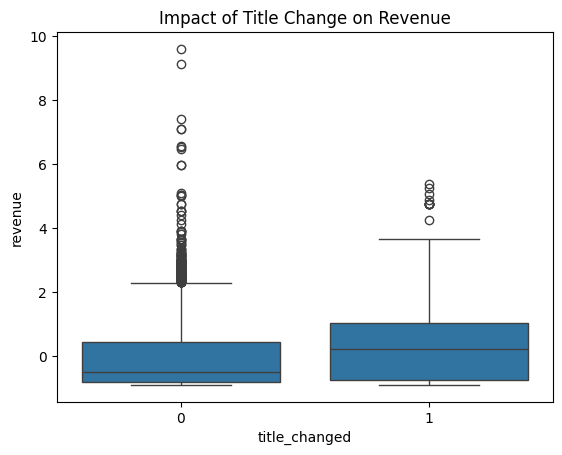

In [ ]:
#Explore wether a change in title can have an impact on revenue

#Create dummies for title change
df_transformed['title_changed'] = (df_transformed['names'] != df_transformed['orig_title']).astype(int)

# Function to calculate similarity
def calculate_similarity(a, b):
    return SequenceMatcher(None, str(a), str(b)).ratio()

# Apply similarity calculation
df_transformed['title_similarity'] = df_transformed.apply(lambda row: calculate_similarity(row['names'], row['orig_title']), axis=1)

df_transformed.groupby('title_changed')['revenue'].mean()

#Visualize the relationship
sns.boxplot(x='title_changed', y='revenue', data=df_transformed)
plt.title("Impact of Title Change on Revenue")
plt.show()


*The median revenue is slightly higher for movies with a title change (title_changed = 1) compared to those without a title change (title_changed = 0).*

*Movies with a title change may benefit from targeted marketing or localization, leading to slightly higher median revenue.
However, the narrower spread suggests that title changes might be a strategy for mid-range movies, as they don't produce as many extreme revenue outliers.*

*Title changes may indicate a deliberate marketing or cultural adaptation effort, which helps maintain consistent revenue but doesn't necessarily lead to blockbuster success.*

*High outliers in the "no title change" category might indicate that globally popular movies, which rely on brand recognition (e.g., sequels, well-known franchises), don't require title changes to succeed.*



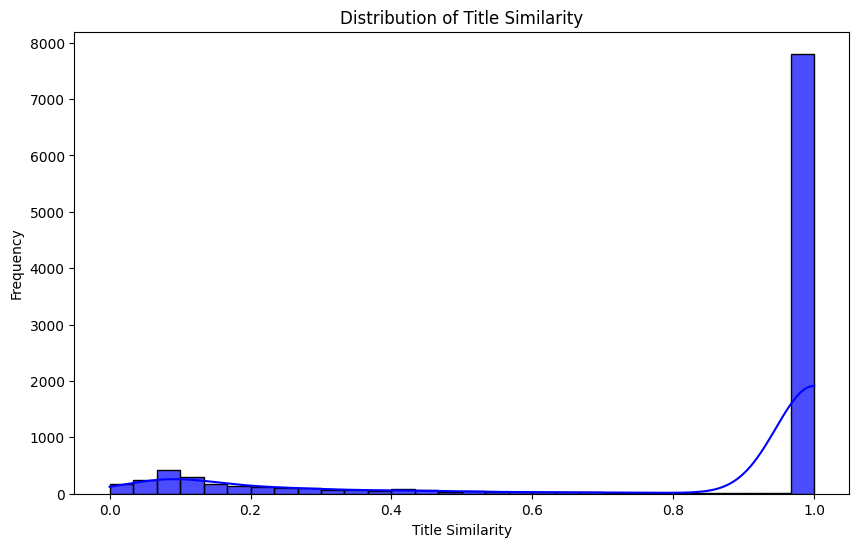

In [ ]:
# Plot the distribution of the 'title_similarity' column
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed['title_similarity'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Title Similarity')
plt.xlabel('Title Similarity')
plt.ylabel('Frequency')
plt.show()

*The range of similarity score is already between 0 and 1, no need to normalize*

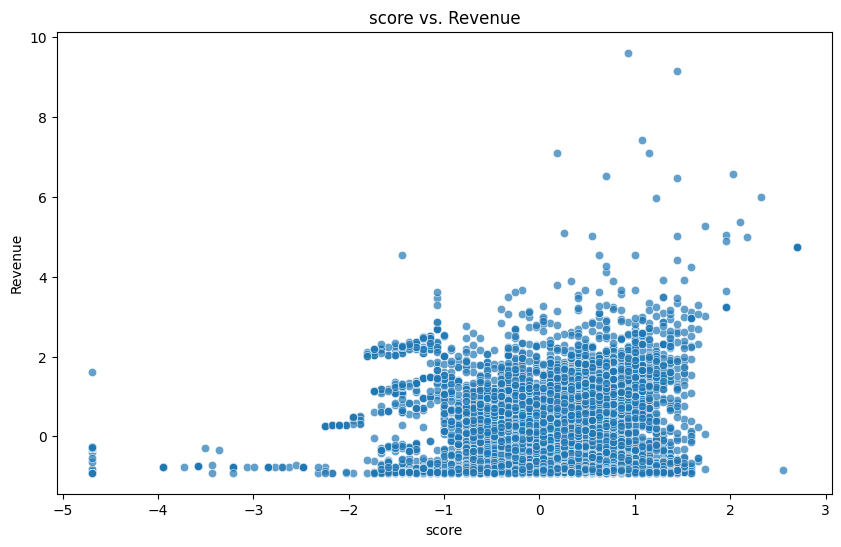

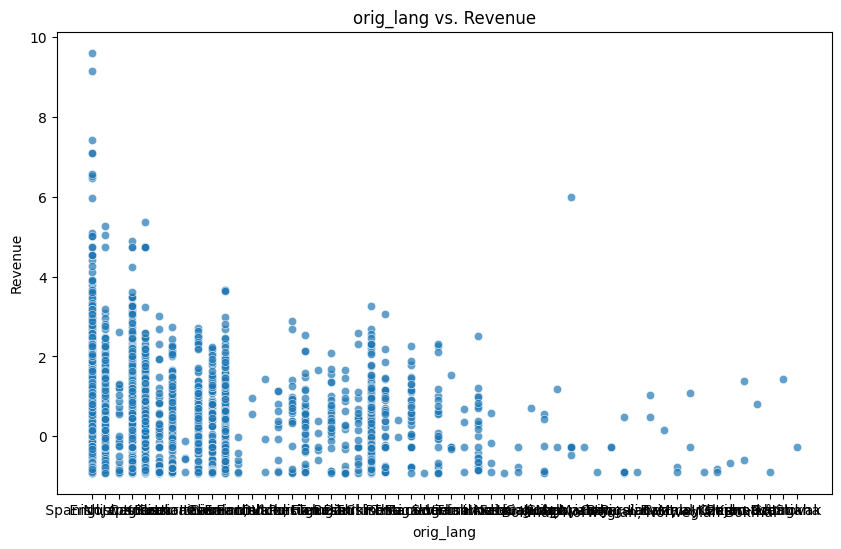

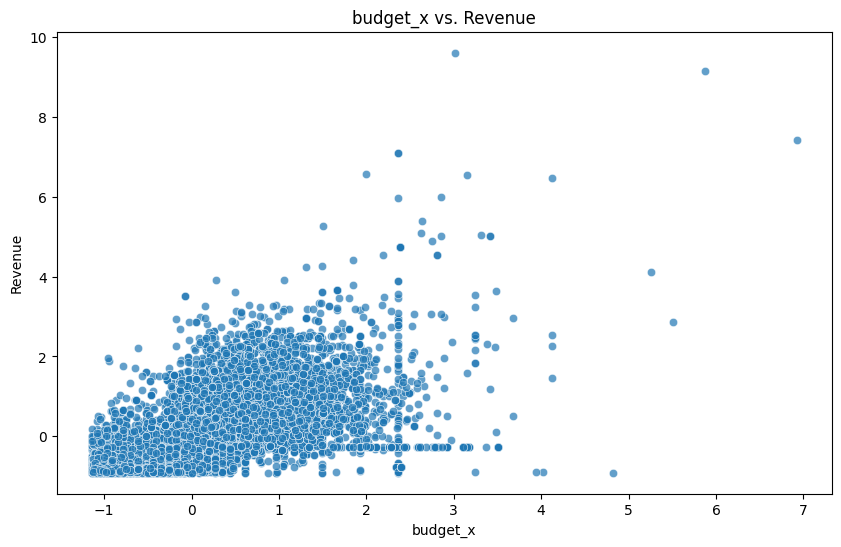

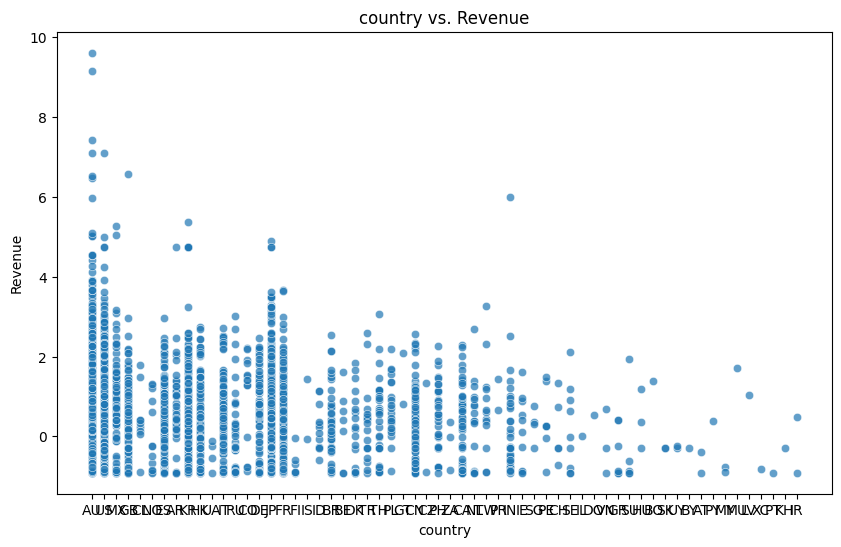

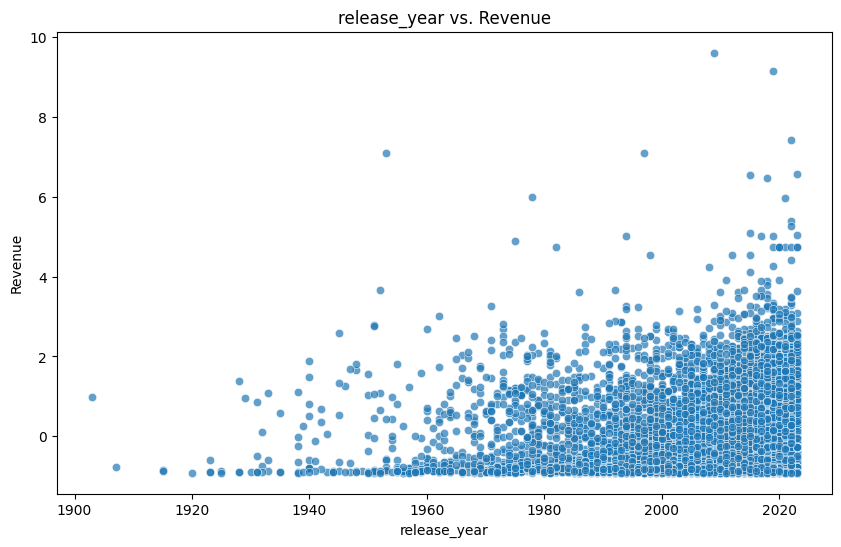

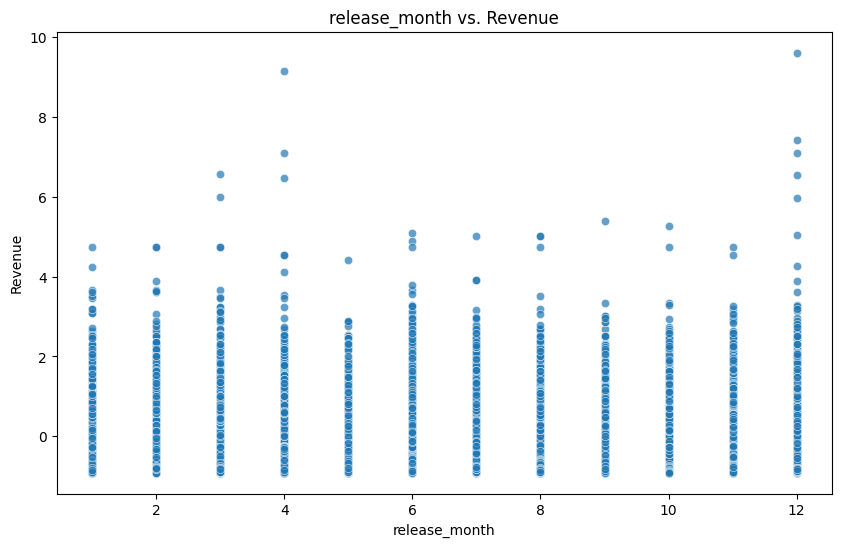

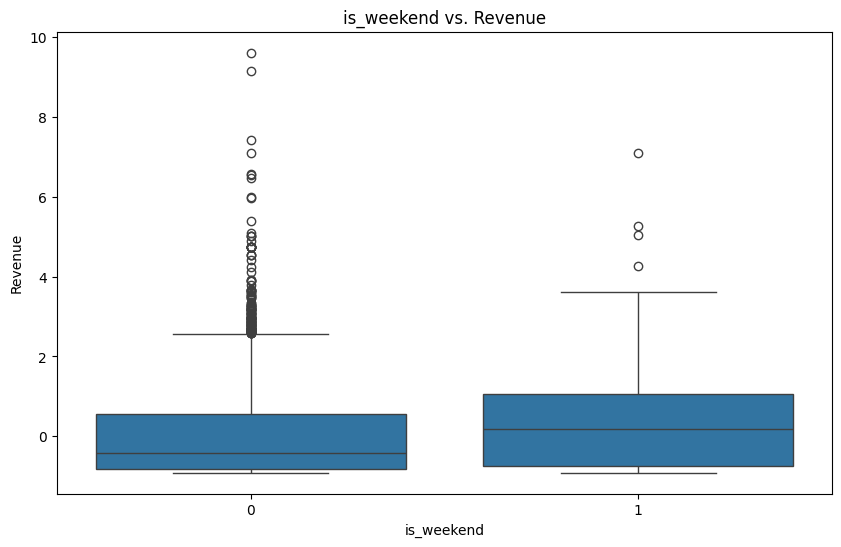

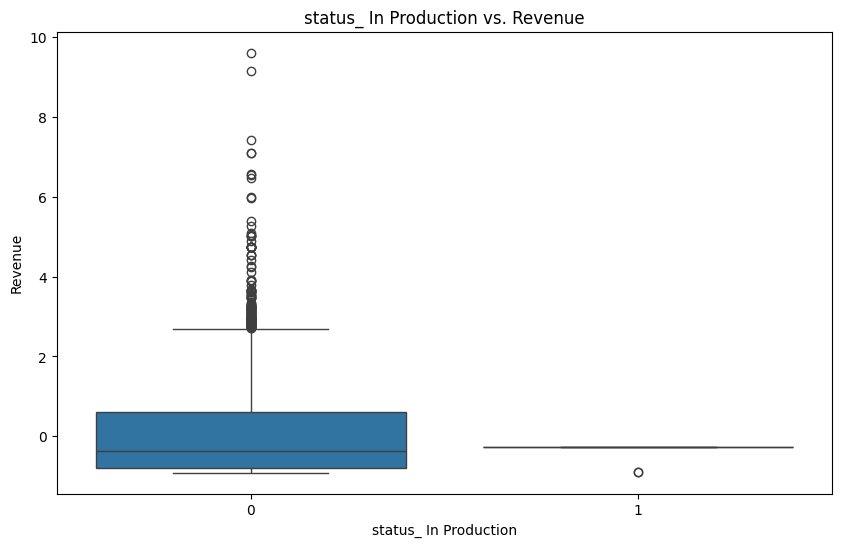

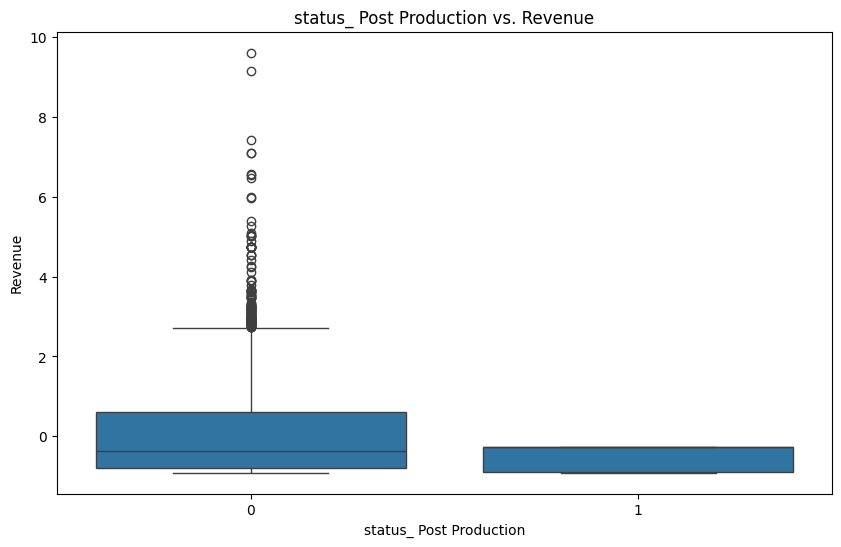

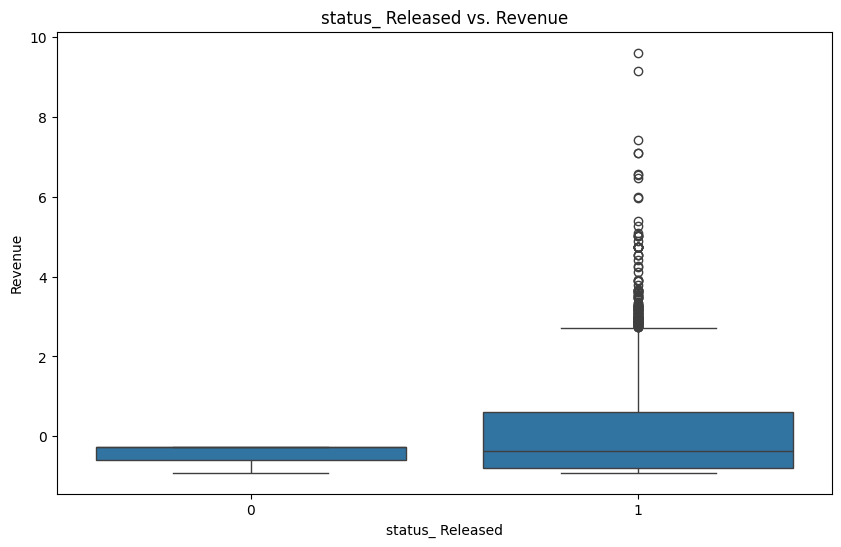

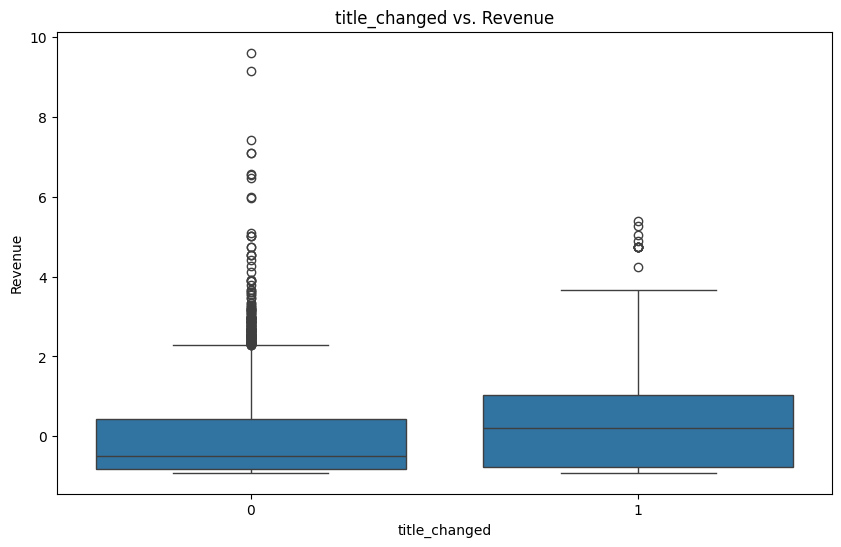

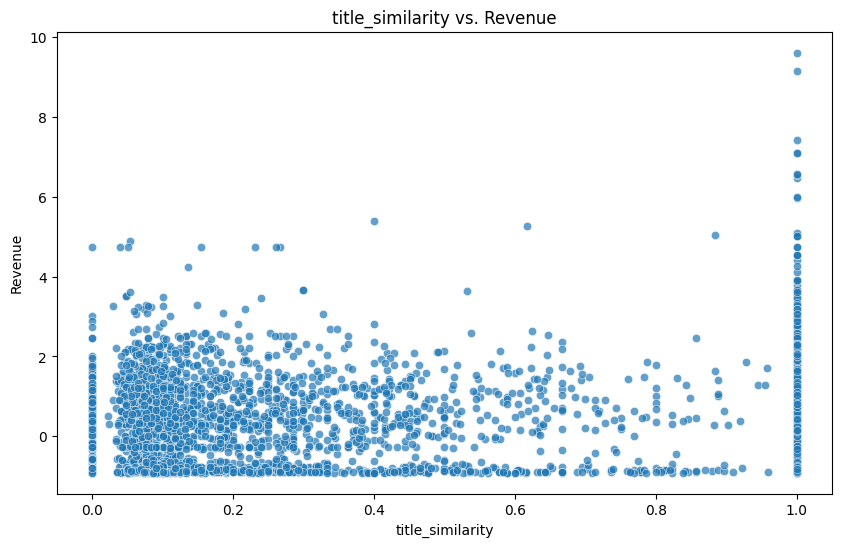

In [ ]:
# Create plots for all columns except excluded ones, showing relationships with revenue
excluded_columns = ['genre', 'overview', 'crew', 'names', 'orig_title']
columns_to_plot = [col for col in df_transformed.columns if col not in excluded_columns + ['revenue']]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))

    if df_transformed[col].nunique() > 10:  # Continuous variable
        sns.scatterplot(data=df_transformed, x=col, y='revenue', alpha=0.7)
        plt.title(f'{col} vs. Revenue')
        plt.xlabel(col)
        plt.ylabel('Revenue')
    else:  # Categorical variable
        sns.boxplot(data=df_transformed, x=col, y='revenue')
        plt.title(f'{col} vs. Revenue')
        plt.xlabel(col)
        plt.ylabel('Revenue')

    plt.show()

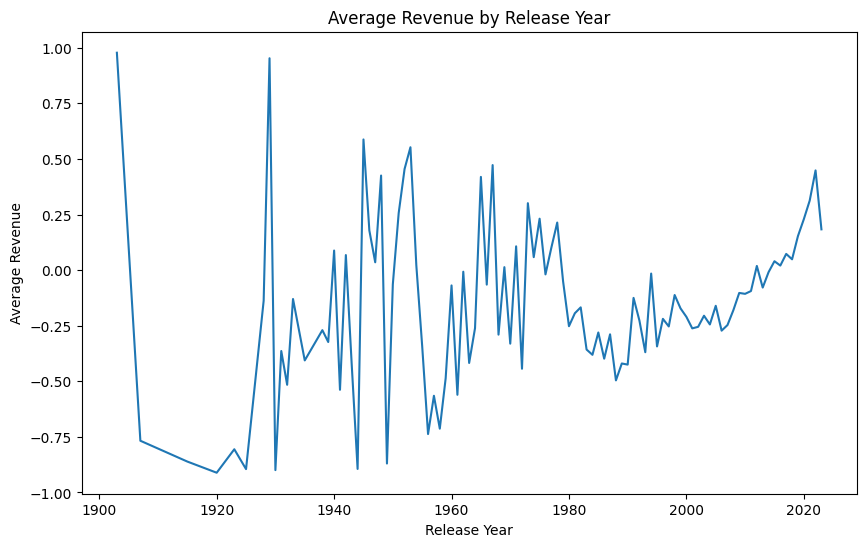

In [ ]:
revenue_by_year = df_transformed.groupby('release_year')['revenue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='release_year', y='revenue')
plt.title('Average Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()


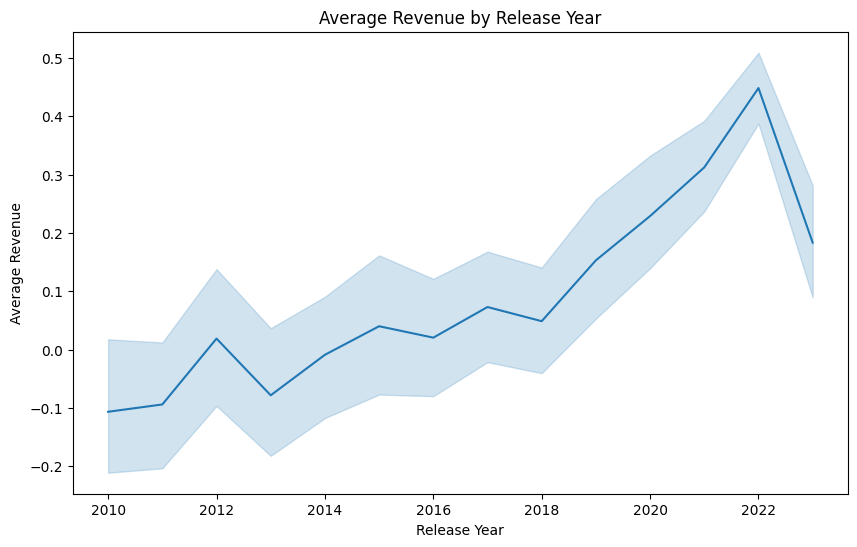

In [ ]:
recent_movies = df_transformed[df_transformed['release_year'] >= 2010]
plt.figure(figsize=(10, 6))
sns.lineplot(recent_movies, x='release_year', y='revenue')
plt.title('Average Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()


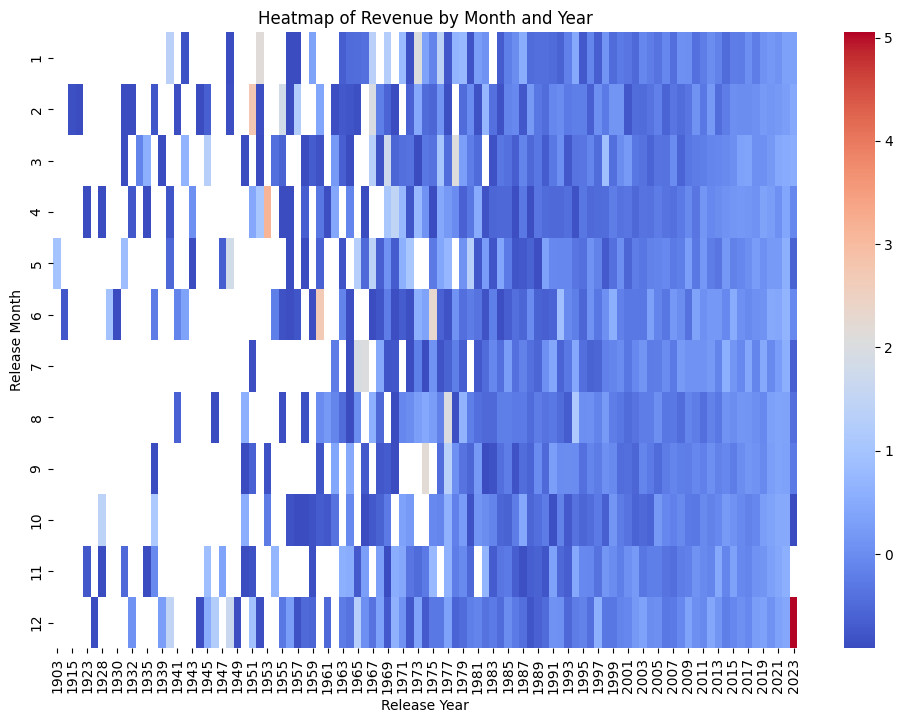

In [ ]:
pivot_table = df_transformed.pivot_table(
    values='revenue',
    index='release_month',
    columns='release_year',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Heatmap of Revenue by Month and Year')
plt.xlabel('Release Year')
plt.ylabel('Release Month')
plt.show()

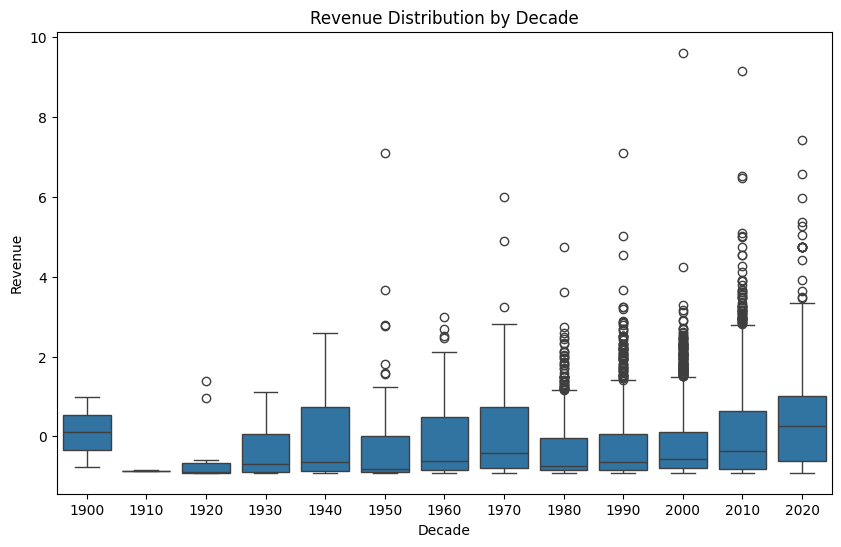

In [ ]:
df_transformed['release_decade'] = (df_transformed['release_year'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_transformed, x='release_decade', y='revenue')
plt.title('Revenue Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Revenue')
plt.show()


## **Data Preparation: Split Train, Test, and Validation**

In [ ]:
df_transformed.head()

,names,score,genre,overview,crew,orig_title,orig_lang,budget_x,revenue,country,release_year,release_month,is_weekend,status_ In Production,status_ Post Production,status_ Released,title_changed,title_similarity,release_decade
0,Creed III,0.701997,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,0.177267,0.066513,AU,2023,3,0,0,0,1,0,1.000000,2020
1,Avatar: The Way of Water,1.071355,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,6.922701,7.428883,AU,2022,12,0,0,0,1,0,1.000000,2020
2,The Super Mario Bros. Movie,0.923612,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,0.615282,1.696685,AU,2023,4,0,0,0,1,0,1.000000,2020
3,Mummies,0.480383,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",-0.921275,-0.788155,AU,2023,1,0,0,0,1,1,0.571429,2020
4,Supercell,-0.184461,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,English,0.212308,0.316075,US,2023,3,0,0,0,1,0,1.000000,2020


In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   names                    10178 non-null  object 
 1   score                    10178 non-null  float64
 2   genre                    10178 non-null  object 
 3   overview                 10178 non-null  object 
 4   crew                     10178 non-null  object 
 5   orig_title               10178 non-null  object 
 6   orig_lang                10178 non-null  object 
 7   budget_x                 10178 non-null  float64
 8   revenue                  10178 non-null  float64
 9   country                  10178 non-null  object 
 10  release_year             10178 non-null  int32  
 11  release_month            10178 non-null  int32  
 12  is_weekend               10178 non-null  int64  
 13  status_ In Production    10178 non-null  int64  
 14  status_ Post Productio

In [ ]:
# Splitting the data
# 60% Train, 20% Validation, 20% Test
train_data, test_data = train_test_split(df_transformed, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits
train_size = len(train_data)
valid_size = len(valid_data)
test_size = len(test_data)

{
    "Train Size": train_size,
    "Validation Size": valid_size,
    "Test Size": test_size
}

{'Train Size': 6106, 'Validation Size': 2036, 'Test Size': 2036}

In [ ]:
train_Name=train_data['names']
test_Name=test_data['names']

# Define the target variable
target = 'revenue'

# Separate features and target for train, validation, and test datasets
X_train = train_data.drop(columns=[target,'names','orig_title', 'overview', 'crew','release_decade', 'release_year', 'title_similarity'])
y_train = train_data[target]

X_valid = valid_data.drop(columns=[target,'names','orig_title', 'overview', 'crew','release_decade', 'release_year', 'title_similarity'])
y_valid = valid_data[target]

X_test = test_data.drop(columns=[target,'names','orig_title', 'overview', 'crew','release_decade', 'release_year', 'title_similarity'])
y_test = test_data[target]


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6106 entries, 6171 to 5287
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score                    6106 non-null   float64
 1   genre                    6106 non-null   object 
 2   orig_lang                6106 non-null   object 
 3   budget_x                 6106 non-null   float64
 4   country                  6106 non-null   object 
 5   release_month            6106 non-null   int32  
 6   is_weekend               6106 non-null   int64  
 7   status_ In Production    6106 non-null   int64  
 8   status_ Post Production  6106 non-null   int64  
 9   status_ Released         6106 non-null   int64  
 10  title_changed            6106 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 548.6+ KB


In [ ]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, 6241 to 4340
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score                    2036 non-null   float64
 1   genre                    2036 non-null   object 
 2   orig_lang                2036 non-null   object 
 3   budget_x                 2036 non-null   float64
 4   country                  2036 non-null   object 
 5   release_month            2036 non-null   int32  
 6   is_weekend               2036 non-null   int64  
 7   status_ In Production    2036 non-null   int64  
 8   status_ Post Production  2036 non-null   int64  
 9   status_ Released         2036 non-null   int64  
 10  title_changed            2036 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 182.9+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, 8505 to 7864
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score                    2036 non-null   float64
 1   genre                    2036 non-null   object 
 2   orig_lang                2036 non-null   object 
 3   budget_x                 2036 non-null   float64
 4   country                  2036 non-null   object 
 5   release_month            2036 non-null   int32  
 6   is_weekend               2036 non-null   int64  
 7   status_ In Production    2036 non-null   int64  
 8   status_ Post Production  2036 non-null   int64  
 9   status_ Released         2036 non-null   int64  
 10  title_changed            2036 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 182.9+ KB


## **Label Encoding for Categorical values and Embedding**

In [ ]:
# Object columns to encode and embed
categorical_columns = ['genre', 'orig_lang', 'country']

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()

    # Combine unique values from train, valid, and test for fitting
    combined_data = pd.concat([X_train[col], X_valid[col], X_test[col]], axis=0)
    le.fit(combined_data)

    # Transform train, valid, and test using the same encoder
    X_train[col] = le.transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])
    X_test[col] = le.transform(X_test[col])

    # Store the encoder for future use
    label_encoders[col] = le


# Prepare PyTorch tensors
categorical_train = torch.tensor(X_train[categorical_columns].values, dtype=torch.long)
categorical_valid = torch.tensor(X_valid[categorical_columns].values, dtype=torch.long)
categorical_test = torch.tensor(X_test[categorical_columns].values, dtype=torch.long)

numerical_train = torch.tensor(X_train.drop(columns=categorical_columns).values, dtype=torch.float32)
numerical_valid = torch.tensor(X_valid.drop(columns=categorical_columns).values, dtype=torch.float32)
numerical_test = torch.tensor(X_test.drop(columns=categorical_columns).values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
#DataLoaders and Batching
from torch.utils.data import TensorDataset, DataLoader

# Combine categorical and numerical features into a single dataset
train_features = TensorDataset(numerical_train, categorical_train, y_train_tensor)
valid_features = TensorDataset(numerical_valid, categorical_valid, y_valid_tensor)
test_features = TensorDataset(numerical_test, categorical_test, y_test_tensor)


# Define an appropriate batch size (commonly 32, 64, or 128 depending on the model and dataset size)
batch_size = 64  # Chosen for balancing memory efficiency and learning stability

# Create DataLoaders
train_loader = DataLoader(train_features, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_features, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_features, batch_size=batch_size, shuffle=False)

# Print DataLoader details for verification
print(f"Train Loader: {len(train_loader)} batches, Batch Size: {batch_size}")
print(f"Validation Loader: {len(valid_loader)} batches, Batch Size: {batch_size}")
print(f"Test Loader: {len(test_loader)} batches, Batch Size: {batch_size}")


Train Loader: 96 batches, Batch Size: 64
Validation Loader: 32 batches, Batch Size: 64
Test Loader: 32 batches, Batch Size: 64


In [ ]:
# Obtain one batch of training data for Sanity Check
dataiter = iter(train_loader)
numerical_features, categorical_features, labels = next(dataiter)

# Print the sizes and sample data for verification
print('Numerical Features size: ', numerical_features.size())  # Size of numerical features in the batch
print('Categorical Features size: ', categorical_features.size())  # Size of categorical features in the batch
print('Labels size: ', labels.size())  # Size of labels in the batch

# Display a sample of the data
print('\nSample Numerical Features: \n', numerical_features)
print('\nSample Categorical Features: \n', categorical_features)
print('\nSample Labels: \n', labels)

Numerical Features size:  torch.Size([64, 8])
Categorical Features size:  torch.Size([64, 3])
Labels size:  torch.Size([64, 1])

Sample Numerical Features: 
 tensor([[-3.6718e-02, -6.4620e-01,  8.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-4.0608e-01,  3.5247e-01,  6.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [ 1.0714e+00, -4.6302e-01,  1.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-1.1059e-01,  2.6837e-01,  6.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-7.0156e-01, -1.0793e+00,  6.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  1.0000e+00],
        [ 4.8038e-01, -6.1116e-01,  1.0000e+01,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-8.4931e-01,  1.0007e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e

## **Train the model**

In [ ]:
#Train on GPU if aviliable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

NameError: name 'model' is not defined

## **Baseline: Linear Model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Determine input dimension:
num_numerical_features = numerical_train.shape[1]
num_categorical_features = categorical_train.shape[1]
input_dim = num_numerical_features + num_categorical_features

class SimpleLinearModel(nn.Module):
    def __init__(self, input_dim):
        super(SimpleLinearModel, self).__init__()
        # Just one linear layer mapping all input features to a single output
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, numerical_data, categorical_data):
        # Concatenate numerical and categorical features
        x = torch.cat([numerical_data, categorical_data.float()], dim=1)
        return self.linear(x)

# Initialize model, optimizer, and loss function
model = SimpleLinearModel(input_dim=input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 200
best_val_loss = float('inf')

train_losses_all = []
val_losses_all = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for numerical_data, categorical_data, labels in train_loader:
        numerical_data = numerical_data.to(device)
        categorical_data = categorical_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        predictions = model(numerical_data, categorical_data)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Average training loss for this epoch
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_num_data, val_cat_data, val_labels in valid_loader:
            val_num_data = val_num_data.to(device)
            val_cat_data = val_cat_data.to(device)
            val_labels = val_labels.to(device)

            val_preds = model(val_num_data, val_cat_data)
            val_loss += criterion(val_preds, val_labels).item()

    val_loss /= len(valid_loader)

    train_losses_all.append(train_loss)
    val_losses_all.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping (optional)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy()

# Load best model state
model.load_state_dict(best_model_state)

# Evaluate on test set
model.eval()
test_loss = 0.0
all_preds = []
all_targets = []
with torch.no_grad():
    for test_num_data, test_cat_data, test_labels in test_loader:
        test_num_data = test_num_data.to(device)
        test_cat_data = test_cat_data.to(device)
        test_labels = test_labels.to(device)

        test_preds = model(test_num_data, test_cat_data)
        test_loss += criterion(test_preds, test_labels).item()
        all_preds.append(test_preds.cpu().numpy())
        all_targets.append(test_labels.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss (MSE): {test_loss:.4f}")

all_preds = np.concatenate(all_preds).flatten()
all_targets = np.concatenate(all_targets).flatten()

# Compute RMSE
rmse = np.sqrt(np.mean((all_preds - all_targets)**2))
print(f"Test RMSE: {rmse:.4f}")

# Compute MAE
mae = np.mean(np.abs(all_preds - all_targets))
print(f"Test MAE: {mae:.4f}")

# Plot train and validation losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_all) + 1), train_losses_all, label='Train Loss')
plt.plot(range(1, len(val_losses_all) + 1), val_losses_all, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 3)

## **Multi-layer Perception Model**

In [ ]:
# Combine all splits for consistent label encoding and embedding size calculation
embedding_sizes = {}

for col in categorical_columns:
    combined_data = pd.concat([X_train[col], X_valid[col], X_test[col]], axis=0)
    num_unique = combined_data.nunique()
    embedding_sizes[col] = (num_unique, min(50, (num_unique + 1) // 2))

print("Updated Embedding Sizes:", embedding_sizes)

# Define the updated embedding model
class UpdatedEmbeddingModel(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_features):
        super(UpdatedEmbeddingModel, self).__init__()
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim) for num_categories, embedding_dim in embedding_sizes.values()
        ])
        self.embedding_dropout = nn.Dropout(0.3)

        # Fully connected layers for numerical + embedded features
        total_emb_dim = sum(embedding_dim for _, embedding_dim in embedding_sizes.values())
        self.fc = nn.Sequential(
            nn.Linear(total_emb_dim + num_numerical_features, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)  # Regression output
        )

    def forward(self, numerical_data, categorical_data):
        # Process categorical data through embeddings
        embedded = [emb(categorical_data[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        embedded = self.embedding_dropout(embedded)

        # Concatenate embedded and numerical data
        x = torch.cat([numerical_data, embedded], dim=1)
        return self.fc(x)


# Initialize the model
num_numerical_features = numerical_train.shape[1]
model = UpdatedEmbeddingModel(embedding_sizes, num_numerical_features)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

Updated Embedding Sizes: {'genre': (2304, 50), 'orig_lang': (54, 27), 'country': (60, 30)}


In [ ]:
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Train Max: {X_train[col].max()}, Embedding Size: {embedding_sizes[col][0]}")
    print(f"Validation Max: {X_valid[col].max()}, Test Max: {X_test[col].max()}")


Column: genre
Train Max: 2303, Embedding Size: 2304
Validation Max: 2292, Test Max: 2301
Column: orig_lang
Train Max: 53, Embedding Size: 54
Validation Max: 53, Test Max: 51
Column: country
Train Max: 59, Embedding Size: 60
Validation Max: 57, Test Max: 59


Epoch 1/500.. Train Loss: 0.9584.. Validation Loss: 0.5626
Epoch 2/500.. Train Loss: 0.6587.. Validation Loss: 0.4594
Epoch 3/500.. Train Loss: 0.5699.. Validation Loss: 0.4414
Epoch 4/500.. Train Loss: 0.5297.. Validation Loss: 0.4156
Epoch 5/500.. Train Loss: 0.5001.. Validation Loss: 0.4071
Epoch 6/500.. Train Loss: 0.4904.. Validation Loss: 0.4016
Epoch 7/500.. Train Loss: 0.4851.. Validation Loss: 0.4055
Epoch 8/500.. Train Loss: 0.4692.. Validation Loss: 0.3910
Epoch 9/500.. Train Loss: 0.4605.. Validation Loss: 0.3829
Epoch 10/500.. Train Loss: 0.4491.. Validation Loss: 0.3948
Epoch 11/500.. Train Loss: 0.4466.. Validation Loss: 0.3871
Epoch 12/500.. Train Loss: 0.4395.. Validation Loss: 0.3787
Epoch 13/500.. Train Loss: 0.4343.. Validation Loss: 0.3790
Epoch 14/500.. Train Loss: 0.4368.. Validation Loss: 0.3809
Epoch 15/500.. Train Loss: 0.4195.. Validation Loss: 0.3715
Epoch 16/500.. Train Loss: 0.4343.. Validation Loss: 0.3688
Epoch 17/500.. Train Loss: 0.4179.. Validation Lo

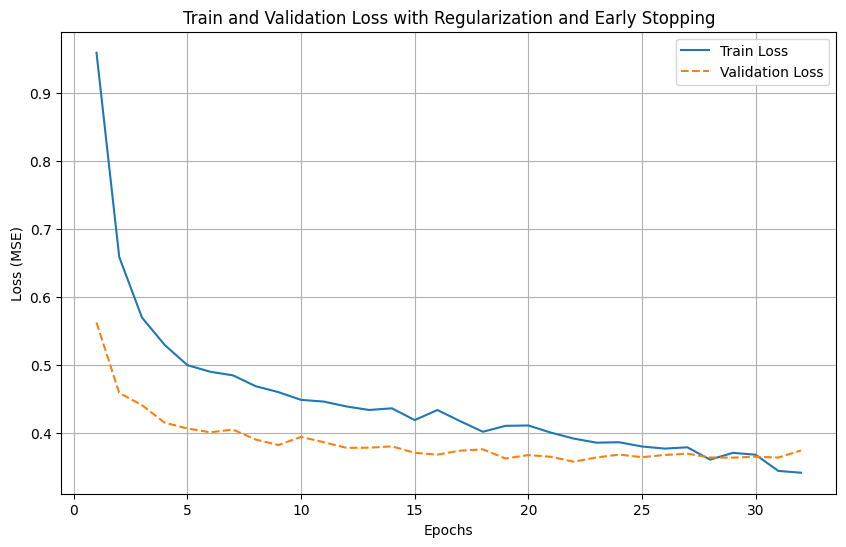

In [ ]:
import torch
import torch.nn.functional as F

def train_model_with_regularization(
    model, train_loader, val_loader, num_epochs, optimizer=None, learning_rate=0.0001,
    early_stopping_patience=10, dropout_rate=0.3, weight_decay=1e-4):

    train_losses = []  # To store training losses
    val_losses = []    # To store validation losses

    # Initialize the optimizer with weight decay (L2 regularization)
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    best_val_loss = float('inf')  # Initialize best validation loss for early stopping
    patience_counter = 0  # Counter for early stopping

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_train_loss = 0.0  # Accumulate training loss

        # Training phase
        for numerical_data, categorical_data, labels in train_loader:
            # Move data to device (e.g., GPU or CPU)
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            labels = labels.to(device)

            # Forward pass
            predictions = model(numerical_data, categorical_data)
            loss = F.mse_loss(predictions, labels)  # MSE loss

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()  # Accumulate loss for the epoch

        # Calculate average training loss
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        total_val_loss = 0.0

        with torch.no_grad():  # Disable gradient computation
            for val_numerical_data, val_categorical_data, val_labels in val_loader:
                # Move validation data to device
                val_numerical_data = val_numerical_data.to(device)
                val_categorical_data = val_categorical_data.to(device)
                val_labels = val_labels.to(device)

                # Forward pass
                val_predictions = model(val_numerical_data, val_categorical_data)
                val_loss = F.mse_loss(val_predictions, val_labels)  # MSE loss
                total_val_loss += val_loss.item()

        # Calculate average validation loss
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0  # Reset patience counter if validation loss improves
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Print progress every epoch
        print(f"Epoch {epoch + 1}/{num_epochs}.. "
              f"Train Loss: {avg_train_loss:.4f}.. "
              f"Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Example usage with your data loaders
num_epochs = 500
train_losses, val_losses = train_model_with_regularization(
    model, train_loader, valid_loader, num_epochs=num_epochs, learning_rate=0.001,
    early_stopping_patience=10, weight_decay=1e-4
)

# Plot losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss with Regularization and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for numerical_data, categorical_data, labels in data_loader:
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            labels = labels.to(device)

            predictions = model(numerical_data, categorical_data)
            all_predictions.append(predictions.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_predictions = np.concatenate(all_predictions).flatten()
    all_labels = np.concatenate(all_labels).flatten()

    mse = mean_squared_error(all_labels, all_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(all_labels, all_predictions)
    r2 = r2_score(all_labels, all_predictions)

    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R-squared: {r2:.4f}")

    return all_labels, all_predictions

# Evaluate the model
all_labels, all_predictions = evaluate_model(model, test_loader)

Test MSE: 0.3875
Test RMSE: 0.6225
Test MAE: 0.4131
Test R-squared: 0.6105


In [ ]:
# Save the model
torch.save(model.state_dict(), "updated_embedding_model.pth")

## **Model Optimization: Hyperparameter Tuning**

In [ ]:
import random
import numpy as np

# Define random search function
def random_search_train(
    train_loader, val_loader, model_class, embedding_sizes, num_numerical_features,
    num_epochs=50, n_trials=20, param_ranges=None, early_stopping_patience=10):
    """
    Random search for hyperparameter optimization.

    Args:
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        model_class: Class of the model to be optimized.
        embedding_sizes: Embedding sizes for categorical features.
        num_numerical_features: Number of numerical features.
        num_epochs: Maximum number of epochs to train.
        n_trials: Number of random hyperparameter combinations to evaluate.
        param_ranges: Dictionary defining ranges for hyperparameters.
        early_stopping_patience: Patience for early stopping.

    Returns:
        Best hyperparameters and validation loss.
    """
    if param_ranges is None:
        param_ranges = {
            'learning_rate': (1e-5, 1e-2),  # Log-uniform range for learning rate
            'dropout_rate': (0.1, 0.5),    # Dropout rate for embeddings and layers
            'weight_decay': (1e-6, 1e-3),  # L2 regularization
            'hidden_layer_size': (64, 256) # Size of hidden layers
        }

    best_params = None
    best_val_loss = float('inf')
    results = []

    for trial in range(n_trials):
        # Randomly sample hyperparameters
        learning_rate = 10 ** random.uniform(np.log10(param_ranges['learning_rate'][0]),
                                             np.log10(param_ranges['learning_rate'][1]))
        dropout_rate = random.uniform(param_ranges['dropout_rate'][0], param_ranges['dropout_rate'][1])
        weight_decay = 10 ** random.uniform(np.log10(param_ranges['weight_decay'][0]),
                                            np.log10(param_ranges['weight_decay'][1]))
        hidden_layer_size = random.randint(param_ranges['hidden_layer_size'][0], param_ranges['hidden_layer_size'][1])

        print(f"\nTrial {trial + 1}/{n_trials} with parameters:")
        print(f"Learning Rate: {learning_rate:.6f}, Dropout: {dropout_rate:.2f}, "
              f"Weight Decay: {weight_decay:.6f}, Hidden Layer Size: {hidden_layer_size}")

        # Instantiate model with current parameters
        model = model_class(embedding_sizes, num_numerical_features)
        model.to(device)

        # Train the model with current hyperparameters
        _, val_losses = train_model_with_regularization(
            model, train_loader, val_loader, num_epochs=num_epochs,
            learning_rate=learning_rate, dropout_rate=dropout_rate, weight_decay=weight_decay,
            early_stopping_patience=early_stopping_patience
        )

        # Get the final validation loss
        final_val_loss = val_losses[-1]
        print(f"Final Validation Loss: {final_val_loss:.4f}")

        # Save results
        results.append((learning_rate, dropout_rate, weight_decay, hidden_layer_size, final_val_loss))

        # Update best parameters if the current trial is better
        if final_val_loss < best_val_loss:
            best_val_loss = final_val_loss
            best_params = {
                'learning_rate': learning_rate,
                'dropout_rate': dropout_rate,
                'weight_decay': weight_decay,
                'hidden_layer_size': hidden_layer_size
            }

    print("\nBest Hyperparameters:")
    print(best_params)
    print(f"Best Validation Loss: {best_val_loss:.4f}")
    return best_params, results

# Define the ranges for hyperparameters
param_ranges = {
    'learning_rate': (1e-5, 1e-2),
    'dropout_rate': (0.1, 0.5),
    'weight_decay': (1e-6, 1e-3),
    'hidden_layer_size': (64, 256)
}


In [ ]:
# Run random search
best_params, search_results = random_search_train(
    train_loader=train_loader,
    val_loader=valid_loader,
    model_class=UpdatedEmbeddingModel,
    embedding_sizes=embedding_sizes,
    num_numerical_features=numerical_train.shape[1],
    num_epochs=50,
    n_trials=20,
    param_ranges=param_ranges
)


Trial 1/20 with parameters:
Learning Rate: 0.001727, Dropout: 0.40, Weight Decay: 0.000012, Hidden Layer Size: 93
Epoch 1/50.. Train Loss: 0.8489.. Validation Loss: 0.4797
Epoch 2/50.. Train Loss: 0.5775.. Validation Loss: 0.4436
Epoch 3/50.. Train Loss: 0.5317.. Validation Loss: 0.4297
Epoch 4/50.. Train Loss: 0.4988.. Validation Loss: 0.4170
Epoch 5/50.. Train Loss: 0.4903.. Validation Loss: 0.4026
Epoch 6/50.. Train Loss: 0.4693.. Validation Loss: 0.4218
Epoch 7/50.. Train Loss: 0.4592.. Validation Loss: 0.3919
Epoch 8/50.. Train Loss: 0.4525.. Validation Loss: 0.3940
Epoch 9/50.. Train Loss: 0.4494.. Validation Loss: 0.3873
Epoch 10/50.. Train Loss: 0.4399.. Validation Loss: 0.3824
Epoch 11/50.. Train Loss: 0.4270.. Validation Loss: 0.3848
Epoch 12/50.. Train Loss: 0.4137.. Validation Loss: 0.3872
Epoch 13/50.. Train Loss: 0.4175.. Validation Loss: 0.3795
Epoch 14/50.. Train Loss: 0.4046.. Validation Loss: 0.3857
Epoch 15/50.. Train Loss: 0.3922.. Validation Loss: 0.3803
Epoch 16/

## **Tuning not using random search**

In [ ]:
!pip install optuna
import optuna
import torch.nn as nn
import torch.nn.functional as F

# Define the embedding model class globally
class TunedEmbeddingModel(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_features, hidden_units, dropout_rate):
        super(TunedEmbeddingModel, self).__init__()
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim) for num_categories, embedding_dim in embedding_sizes.values()
        ])
        self.embedding_dropout = nn.Dropout(dropout_rate)

        # Fully connected layers for numerical + embedded features
        total_emb_dim = sum(embedding_dim for _, embedding_dim in embedding_sizes.values())
        self.fc = nn.Sequential(
            nn.Linear(total_emb_dim + num_numerical_features, hidden_units),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_units),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units, hidden_units // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_units // 2),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units // 2, 1)  # Regression output
        )

    def forward(self, numerical_data, categorical_data):
        # Process categorical data through embeddings
        embedded = [emb(categorical_data[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        embedded = self.embedding_dropout(embedded)

        # Concatenate embedded and numerical data
        x = torch.cat([numerical_data, embedded], dim=1)
        return self.fc(x)

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    hidden_units = trial.suggest_int('hidden_units', 16, 256, log=True)

    # Initialize the model with the current trial's hyperparameters
    model = TunedEmbeddingModel(
        embedding_sizes=embedding_sizes,
        num_numerical_features=num_numerical_features,
        hidden_units=hidden_units,
        dropout_rate=dropout_rate
    )
    model.to(device)

    # Define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Train the model using the train and validation loaders
    train_losses, val_losses = train_model_with_regularization(
        model,
        train_loader,
        valid_loader,
        num_epochs=50,  # Limit epochs for faster tuning
        optimizer=optimizer,
        dropout_rate=dropout_rate,
        early_stopping_patience=5,
        weight_decay=weight_decay
    )

    # Return the best validation loss for the current trial
    return min(val_losses)

# Create the Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)  # Adjust n_trials based on computational resources

# Print the best hyperparameters
best_params = study.best_trial.params
print(f"Best Parameters: {best_params}")

# Final model retraining using best parameters
best_model = TunedEmbeddingModel(
    embedding_sizes=embedding_sizes,
    num_numerical_features=num_numerical_features,
    hidden_units=best_params['hidden_units'],
    dropout_rate=best_params['dropout_rate']
)
best_model.to(device)

# Define optimizer with the best parameters
optimizer = torch.optim.Adam(
    best_model.parameters(),
    lr=best_params['learning_rate'],
    weight_decay=best_params['weight_decay']
)

# Retrain the model with the best parameters
train_losses, val_losses = train_model_with_regularization(
    best_model,
    train_loader,
    valid_loader,
    num_epochs=100,  # Increase epochs for final training
    optimizer=optimizer,
    dropout_rate=best_params['dropout_rate'],
    early_stopping_patience=10,
    weight_decay=best_params['weight_decay']
)

# Evaluate the model on the test set
all_labels, all_predictions = evaluate_model(best_model, test_loader)

[I 2024-12-05 23:59:55,312] A new study created in memory with name: no-name-b8cfac27-1c11-49f0-bba0-833c7515f660
<ipython-input-61-fd9649a52cb6>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-61-fd9649a52cb6>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
<ipython-input-61-fd9649a52cb6>:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform(

Epoch 1/50.. Train Loss: 1.4093.. Validation Loss: 0.9699
Epoch 2/50.. Train Loss: 1.1951.. Validation Loss: 0.8614
Epoch 3/50.. Train Loss: 1.1078.. Validation Loss: 0.7719
Epoch 4/50.. Train Loss: 0.9947.. Validation Loss: 0.7140
Epoch 5/50.. Train Loss: 0.9415.. Validation Loss: 0.6711
Epoch 6/50.. Train Loss: 0.8929.. Validation Loss: 0.6360
Epoch 7/50.. Train Loss: 0.8827.. Validation Loss: 0.6003
Epoch 8/50.. Train Loss: 0.8303.. Validation Loss: 0.5766
Epoch 9/50.. Train Loss: 0.8178.. Validation Loss: 0.5574
Epoch 10/50.. Train Loss: 0.8039.. Validation Loss: 0.5415
Epoch 11/50.. Train Loss: 0.7593.. Validation Loss: 0.5233
Epoch 12/50.. Train Loss: 0.7642.. Validation Loss: 0.5141
Epoch 13/50.. Train Loss: 0.7400.. Validation Loss: 0.5017
Epoch 14/50.. Train Loss: 0.7100.. Validation Loss: 0.4934
Epoch 15/50.. Train Loss: 0.7121.. Validation Loss: 0.4837
Epoch 16/50.. Train Loss: 0.6939.. Validation Loss: 0.4782
Epoch 17/50.. Train Loss: 0.6879.. Validation Loss: 0.4718
Epoch 

[I 2024-12-06 00:00:30,444] Trial 0 finished with value: 0.41439552418887615 and parameters: {'learning_rate': 5.54063343237101e-05, 'weight_decay': 2.0701519046250567e-06, 'dropout_rate': 0.34231598344052927, 'hidden_units': 242}. Best is trial 0 with value: 0.41439552418887615.


Epoch 50/50.. Train Loss: 0.5190.. Validation Loss: 0.4144
Epoch 1/50.. Train Loss: 1.5438.. Validation Loss: 1.0708
Epoch 2/50.. Train Loss: 1.4668.. Validation Loss: 1.0473
Epoch 3/50.. Train Loss: 1.4531.. Validation Loss: 1.0289
Epoch 4/50.. Train Loss: 1.3720.. Validation Loss: 1.0047
Epoch 5/50.. Train Loss: 1.3824.. Validation Loss: 0.9879
Epoch 6/50.. Train Loss: 1.3192.. Validation Loss: 0.9717
Epoch 7/50.. Train Loss: 1.3154.. Validation Loss: 0.9603
Epoch 8/50.. Train Loss: 1.2626.. Validation Loss: 0.9506
Epoch 9/50.. Train Loss: 1.2473.. Validation Loss: 0.9365
Epoch 10/50.. Train Loss: 1.2208.. Validation Loss: 0.9305
Epoch 11/50.. Train Loss: 1.2038.. Validation Loss: 0.9202
Epoch 12/50.. Train Loss: 1.2199.. Validation Loss: 0.9126
Epoch 13/50.. Train Loss: 1.1932.. Validation Loss: 0.9072
Epoch 14/50.. Train Loss: 1.1681.. Validation Loss: 0.9097
Epoch 15/50.. Train Loss: 1.1679.. Validation Loss: 0.9023
Epoch 16/50.. Train Loss: 1.1526.. Validation Loss: 0.8886
Epoch 

[I 2024-12-06 00:00:56,891] Trial 1 finished with value: 0.7096418049186468 and parameters: {'learning_rate': 3.862686057597535e-05, 'weight_decay': 2.3344783213046995e-05, 'dropout_rate': 0.32333935631769817, 'hidden_units': 16}. Best is trial 0 with value: 0.41439552418887615.


Epoch 50/50.. Train Loss: 0.8799.. Validation Loss: 0.7096
Epoch 1/50.. Train Loss: 1.0295.. Validation Loss: 0.7871
Epoch 2/50.. Train Loss: 0.7451.. Validation Loss: 0.4836
Epoch 3/50.. Train Loss: 0.6044.. Validation Loss: 0.4437
Epoch 4/50.. Train Loss: 0.5804.. Validation Loss: 0.4440
Epoch 5/50.. Train Loss: 0.5428.. Validation Loss: 0.4183
Epoch 6/50.. Train Loss: 0.5424.. Validation Loss: 0.4240
Epoch 7/50.. Train Loss: 0.5290.. Validation Loss: 0.3965
Epoch 8/50.. Train Loss: 0.5232.. Validation Loss: 0.4239
Epoch 9/50.. Train Loss: 0.5327.. Validation Loss: 0.4175
Epoch 10/50.. Train Loss: 0.5071.. Validation Loss: 0.4096
Epoch 11/50.. Train Loss: 0.4937.. Validation Loss: 0.4011


[I 2024-12-06 00:01:03,739] Trial 2 finished with value: 0.39647579519078135 and parameters: {'learning_rate': 0.0037498032340693406, 'weight_decay': 2.2116887450571583e-06, 'dropout_rate': 0.3942739658101271, 'hidden_units': 16}. Best is trial 2 with value: 0.39647579519078135.


Early stopping at epoch 12
Epoch 1/50.. Train Loss: 1.4443.. Validation Loss: 1.1377
Epoch 2/50.. Train Loss: 1.3840.. Validation Loss: 1.1160
Epoch 3/50.. Train Loss: 1.3992.. Validation Loss: 1.0963
Epoch 4/50.. Train Loss: 1.3645.. Validation Loss: 1.0719
Epoch 5/50.. Train Loss: 1.3382.. Validation Loss: 1.0532
Epoch 6/50.. Train Loss: 1.3323.. Validation Loss: 1.0431
Epoch 7/50.. Train Loss: 1.2571.. Validation Loss: 1.0301
Epoch 8/50.. Train Loss: 1.2795.. Validation Loss: 1.0102
Epoch 9/50.. Train Loss: 1.2499.. Validation Loss: 1.0027
Epoch 10/50.. Train Loss: 1.2411.. Validation Loss: 0.9880
Epoch 11/50.. Train Loss: 1.2447.. Validation Loss: 0.9776
Epoch 12/50.. Train Loss: 1.1961.. Validation Loss: 0.9696
Epoch 13/50.. Train Loss: 1.1853.. Validation Loss: 0.9577
Epoch 14/50.. Train Loss: 1.1914.. Validation Loss: 0.9502
Epoch 15/50.. Train Loss: 1.1669.. Validation Loss: 0.9422
Epoch 16/50.. Train Loss: 1.1693.. Validation Loss: 0.9426
Epoch 17/50.. Train Loss: 1.1440.. Val

[I 2024-12-06 00:01:34,884] Trial 3 finished with value: 0.8191426228731871 and parameters: {'learning_rate': 1.421501515060797e-05, 'weight_decay': 6.765558863357046e-05, 'dropout_rate': 0.33847210538810113, 'hidden_units': 30}. Best is trial 2 with value: 0.39647579519078135.


Epoch 50/50.. Train Loss: 0.9748.. Validation Loss: 0.8202
Epoch 1/50.. Train Loss: 1.4987.. Validation Loss: 1.1458
Epoch 2/50.. Train Loss: 1.4035.. Validation Loss: 1.0801
Epoch 3/50.. Train Loss: 1.3257.. Validation Loss: 1.0612
Epoch 4/50.. Train Loss: 1.2876.. Validation Loss: 0.9978
Epoch 5/50.. Train Loss: 1.2266.. Validation Loss: 0.9758
Epoch 6/50.. Train Loss: 1.1762.. Validation Loss: 0.9576
Epoch 7/50.. Train Loss: 1.1424.. Validation Loss: 0.9356
Epoch 8/50.. Train Loss: 1.1501.. Validation Loss: 0.9109
Epoch 9/50.. Train Loss: 1.1107.. Validation Loss: 0.9038
Epoch 10/50.. Train Loss: 1.0709.. Validation Loss: 0.8818
Epoch 11/50.. Train Loss: 1.0643.. Validation Loss: 0.8622
Epoch 12/50.. Train Loss: 1.0263.. Validation Loss: 0.8598
Epoch 13/50.. Train Loss: 1.0183.. Validation Loss: 0.8420
Epoch 14/50.. Train Loss: 1.0139.. Validation Loss: 0.8309
Epoch 15/50.. Train Loss: 0.9755.. Validation Loss: 0.8246
Epoch 16/50.. Train Loss: 0.9662.. Validation Loss: 0.8046
Epoch 

[I 2024-12-06 00:02:04,100] Trial 4 finished with value: 0.4431831445544958 and parameters: {'learning_rate': 7.362960614601345e-05, 'weight_decay': 7.609594192414027e-05, 'dropout_rate': 0.4158810612318955, 'hidden_units': 42}. Best is trial 2 with value: 0.39647579519078135.


Epoch 50/50.. Train Loss: 0.6303.. Validation Loss: 0.4465
Epoch 1/50.. Train Loss: 1.4377.. Validation Loss: 0.9082
Epoch 2/50.. Train Loss: 1.3198.. Validation Loss: 0.8591
Epoch 3/50.. Train Loss: 1.2230.. Validation Loss: 0.8297
Epoch 4/50.. Train Loss: 1.1709.. Validation Loss: 0.8061
Epoch 5/50.. Train Loss: 1.1019.. Validation Loss: 0.7822
Epoch 6/50.. Train Loss: 1.0898.. Validation Loss: 0.7616
Epoch 7/50.. Train Loss: 1.0343.. Validation Loss: 0.7436
Epoch 8/50.. Train Loss: 1.0047.. Validation Loss: 0.7198
Epoch 9/50.. Train Loss: 0.9682.. Validation Loss: 0.7041
Epoch 10/50.. Train Loss: 0.9476.. Validation Loss: 0.6812
Epoch 11/50.. Train Loss: 0.9405.. Validation Loss: 0.6744
Epoch 12/50.. Train Loss: 0.8961.. Validation Loss: 0.6502
Epoch 13/50.. Train Loss: 0.8776.. Validation Loss: 0.6340
Epoch 14/50.. Train Loss: 0.8665.. Validation Loss: 0.6179
Epoch 15/50.. Train Loss: 0.8347.. Validation Loss: 0.5989
Epoch 16/50.. Train Loss: 0.8317.. Validation Loss: 0.5897
Epoch 

[I 2024-12-06 00:02:34,599] Trial 5 finished with value: 0.41771140275523067 and parameters: {'learning_rate': 7.302743543032693e-05, 'weight_decay': 0.006399909500517466, 'dropout_rate': 0.4318664273827728, 'hidden_units': 105}. Best is trial 2 with value: 0.39647579519078135.


Epoch 50/50.. Train Loss: 0.5310.. Validation Loss: 0.4184
Epoch 1/50.. Train Loss: 0.7074.. Validation Loss: 0.4707
Epoch 2/50.. Train Loss: 0.4917.. Validation Loss: 0.4679
Epoch 3/50.. Train Loss: 0.4595.. Validation Loss: 0.4020
Epoch 4/50.. Train Loss: 0.4420.. Validation Loss: 0.3738
Epoch 5/50.. Train Loss: 0.4243.. Validation Loss: 0.3899
Epoch 6/50.. Train Loss: 0.4286.. Validation Loss: 0.4231
Epoch 7/50.. Train Loss: 0.4352.. Validation Loss: 0.3786
Epoch 8/50.. Train Loss: 0.4287.. Validation Loss: 0.4209


[I 2024-12-06 00:02:40,223] Trial 6 finished with value: 0.3737912946380675 and parameters: {'learning_rate': 0.008428082678194782, 'weight_decay': 0.0023253567426523435, 'dropout_rate': 0.1904498934954654, 'hidden_units': 256}. Best is trial 6 with value: 0.3737912946380675.


Early stopping at epoch 9
Epoch 1/50.. Train Loss: 1.2134.. Validation Loss: 1.0190
Epoch 2/50.. Train Loss: 1.1357.. Validation Loss: 0.9810
Epoch 3/50.. Train Loss: 1.0962.. Validation Loss: 0.9361
Epoch 4/50.. Train Loss: 1.0509.. Validation Loss: 0.9128
Epoch 5/50.. Train Loss: 1.0320.. Validation Loss: 0.8903
Epoch 6/50.. Train Loss: 0.9737.. Validation Loss: 0.8685
Epoch 7/50.. Train Loss: 0.9782.. Validation Loss: 0.8455
Epoch 8/50.. Train Loss: 0.9509.. Validation Loss: 0.8303
Epoch 9/50.. Train Loss: 0.9445.. Validation Loss: 0.8143
Epoch 10/50.. Train Loss: 0.9108.. Validation Loss: 0.8046
Epoch 11/50.. Train Loss: 0.8851.. Validation Loss: 0.7863
Epoch 12/50.. Train Loss: 0.8651.. Validation Loss: 0.7705
Epoch 13/50.. Train Loss: 0.8489.. Validation Loss: 0.7571
Epoch 14/50.. Train Loss: 0.8363.. Validation Loss: 0.7427
Epoch 15/50.. Train Loss: 0.8224.. Validation Loss: 0.7279
Epoch 16/50.. Train Loss: 0.8048.. Validation Loss: 0.7156
Epoch 17/50.. Train Loss: 0.7958.. Vali

[I 2024-12-06 00:03:08,919] Trial 7 finished with value: 0.4631463601253927 and parameters: {'learning_rate': 3.397064078691755e-05, 'weight_decay': 3.456164884774973e-05, 'dropout_rate': 0.14057031336727263, 'hidden_units': 39}. Best is trial 6 with value: 0.3737912946380675.


Epoch 50/50.. Train Loss: 0.5505.. Validation Loss: 0.4657
Epoch 1/50.. Train Loss: 1.6057.. Validation Loss: 1.1158
Epoch 2/50.. Train Loss: 1.4688.. Validation Loss: 1.0549
Epoch 3/50.. Train Loss: 1.3735.. Validation Loss: 0.9935
Epoch 4/50.. Train Loss: 1.2897.. Validation Loss: 0.9527
Epoch 5/50.. Train Loss: 1.2406.. Validation Loss: 0.9300
Epoch 6/50.. Train Loss: 1.1741.. Validation Loss: 0.9013
Epoch 7/50.. Train Loss: 1.1439.. Validation Loss: 0.8802
Epoch 8/50.. Train Loss: 1.1259.. Validation Loss: 0.8588
Epoch 9/50.. Train Loss: 1.0788.. Validation Loss: 0.8380
Epoch 10/50.. Train Loss: 1.0564.. Validation Loss: 0.8182
Epoch 11/50.. Train Loss: 1.0463.. Validation Loss: 0.8017
Epoch 12/50.. Train Loss: 1.0024.. Validation Loss: 0.7810
Epoch 13/50.. Train Loss: 0.9681.. Validation Loss: 0.7675
Epoch 14/50.. Train Loss: 0.9844.. Validation Loss: 0.7514
Epoch 15/50.. Train Loss: 0.9676.. Validation Loss: 0.7371
Epoch 16/50.. Train Loss: 0.9424.. Validation Loss: 0.7180
Epoch 

[I 2024-12-06 00:03:37,464] Trial 8 finished with value: 0.4418539581820369 and parameters: {'learning_rate': 6.274480091154411e-05, 'weight_decay': 1.6693378628269102e-05, 'dropout_rate': 0.2780083254289526, 'hidden_units': 33}. Best is trial 6 with value: 0.3737912946380675.


Epoch 50/50.. Train Loss: 0.5893.. Validation Loss: 0.4439
Epoch 1/50.. Train Loss: 0.9967.. Validation Loss: 0.7671
Epoch 2/50.. Train Loss: 0.8539.. Validation Loss: 0.6596
Epoch 3/50.. Train Loss: 0.7700.. Validation Loss: 0.5868
Epoch 4/50.. Train Loss: 0.7002.. Validation Loss: 0.5277
Epoch 5/50.. Train Loss: 0.6740.. Validation Loss: 0.5017
Epoch 6/50.. Train Loss: 0.6343.. Validation Loss: 0.4811
Epoch 7/50.. Train Loss: 0.5914.. Validation Loss: 0.4638
Epoch 8/50.. Train Loss: 0.5971.. Validation Loss: 0.4578
Epoch 9/50.. Train Loss: 0.5649.. Validation Loss: 0.4483
Epoch 10/50.. Train Loss: 0.5539.. Validation Loss: 0.4481
Epoch 11/50.. Train Loss: 0.5470.. Validation Loss: 0.4401
Epoch 12/50.. Train Loss: 0.5391.. Validation Loss: 0.4353
Epoch 13/50.. Train Loss: 0.5254.. Validation Loss: 0.4358
Epoch 14/50.. Train Loss: 0.5200.. Validation Loss: 0.4328
Epoch 15/50.. Train Loss: 0.5069.. Validation Loss: 0.4280
Epoch 16/50.. Train Loss: 0.5165.. Validation Loss: 0.4271
Epoch 

[I 2024-12-06 00:04:09,582] Trial 9 finished with value: 0.39095454663038254 and parameters: {'learning_rate': 0.00013236922274953525, 'weight_decay': 1.7419557927600015e-05, 'dropout_rate': 0.2289599480519916, 'hidden_units': 147}. Best is trial 6 with value: 0.3737912946380675.


Early stopping at epoch 49
Epoch 1/50.. Train Loss: 0.6538.. Validation Loss: 0.5150
Epoch 2/50.. Train Loss: 0.4637.. Validation Loss: 0.3970
Epoch 3/50.. Train Loss: 0.4421.. Validation Loss: 0.4035
Epoch 4/50.. Train Loss: 0.4263.. Validation Loss: 0.3927
Epoch 5/50.. Train Loss: 0.4403.. Validation Loss: 0.4045
Epoch 6/50.. Train Loss: 0.4341.. Validation Loss: 0.3799
Epoch 7/50.. Train Loss: 0.4367.. Validation Loss: 0.4133
Epoch 8/50.. Train Loss: 0.4163.. Validation Loss: 0.3768
Epoch 9/50.. Train Loss: 0.4203.. Validation Loss: 0.3740
Epoch 10/50.. Train Loss: 0.4221.. Validation Loss: 0.4179
Epoch 11/50.. Train Loss: 0.4168.. Validation Loss: 0.3852
Epoch 12/50.. Train Loss: 0.4224.. Validation Loss: 0.3855
Epoch 13/50.. Train Loss: 0.4225.. Validation Loss: 0.3563
Epoch 14/50.. Train Loss: 0.4197.. Validation Loss: 0.3963
Epoch 15/50.. Train Loss: 0.4110.. Validation Loss: 0.3741
Epoch 16/50.. Train Loss: 0.4017.. Validation Loss: 0.3545
Epoch 17/50.. Train Loss: 0.4081.. Val

[I 2024-12-06 00:04:28,154] Trial 10 finished with value: 0.3545374423265457 and parameters: {'learning_rate': 0.008520602734538368, 'weight_decay': 0.004025983409758334, 'dropout_rate': 0.10488640470481365, 'hidden_units': 252}. Best is trial 10 with value: 0.3545374423265457.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 0.6672.. Validation Loss: 0.4576
Epoch 2/50.. Train Loss: 0.4728.. Validation Loss: 0.3952
Epoch 3/50.. Train Loss: 0.4369.. Validation Loss: 0.3701
Epoch 4/50.. Train Loss: 0.4289.. Validation Loss: 0.4243
Epoch 5/50.. Train Loss: 0.4254.. Validation Loss: 0.3577
Epoch 6/50.. Train Loss: 0.4466.. Validation Loss: 0.3684
Epoch 7/50.. Train Loss: 0.4361.. Validation Loss: 0.4038
Epoch 8/50.. Train Loss: 0.4303.. Validation Loss: 0.3785
Epoch 9/50.. Train Loss: 0.4378.. Validation Loss: 0.8537


[I 2024-12-06 00:04:34,371] Trial 11 finished with value: 0.357733900193125 and parameters: {'learning_rate': 0.008283527505665815, 'weight_decay': 0.004507430750685675, 'dropout_rate': 0.12424486791773781, 'hidden_units': 251}. Best is trial 10 with value: 0.3545374423265457.


Early stopping at epoch 10
Epoch 1/50.. Train Loss: 0.7276.. Validation Loss: 0.4751
Epoch 2/50.. Train Loss: 0.5185.. Validation Loss: 0.4384
Epoch 3/50.. Train Loss: 0.4680.. Validation Loss: 0.4208
Epoch 4/50.. Train Loss: 0.4478.. Validation Loss: 0.4140
Epoch 5/50.. Train Loss: 0.4381.. Validation Loss: 0.4031
Epoch 6/50.. Train Loss: 0.4249.. Validation Loss: 0.3928
Epoch 7/50.. Train Loss: 0.4109.. Validation Loss: 0.3881
Epoch 8/50.. Train Loss: 0.4088.. Validation Loss: 0.3829
Epoch 9/50.. Train Loss: 0.3952.. Validation Loss: 0.3964
Epoch 10/50.. Train Loss: 0.3940.. Validation Loss: 0.3863
Epoch 11/50.. Train Loss: 0.3798.. Validation Loss: 0.3860
Epoch 12/50.. Train Loss: 0.3876.. Validation Loss: 0.3888


[I 2024-12-06 00:04:42,842] Trial 12 finished with value: 0.3828698992729187 and parameters: {'learning_rate': 0.001194654614961919, 'weight_decay': 0.0006532566500925953, 'dropout_rate': 0.11502341972711509, 'hidden_units': 133}. Best is trial 10 with value: 0.3545374423265457.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.8584.. Validation Loss: 0.5109
Epoch 2/50.. Train Loss: 0.5784.. Validation Loss: 0.4636
Epoch 3/50.. Train Loss: 0.5285.. Validation Loss: 0.4291
Epoch 4/50.. Train Loss: 0.4977.. Validation Loss: 0.4345
Epoch 5/50.. Train Loss: 0.4744.. Validation Loss: 0.4149
Epoch 6/50.. Train Loss: 0.4514.. Validation Loss: 0.4072
Epoch 7/50.. Train Loss: 0.4410.. Validation Loss: 0.4008
Epoch 8/50.. Train Loss: 0.4417.. Validation Loss: 0.3940
Epoch 9/50.. Train Loss: 0.4316.. Validation Loss: 0.3890
Epoch 10/50.. Train Loss: 0.4287.. Validation Loss: 0.3808
Epoch 11/50.. Train Loss: 0.4189.. Validation Loss: 0.3823
Epoch 12/50.. Train Loss: 0.4156.. Validation Loss: 0.3774
Epoch 13/50.. Train Loss: 0.4047.. Validation Loss: 0.3763
Epoch 14/50.. Train Loss: 0.4123.. Validation Loss: 0.3689
Epoch 15/50.. Train Loss: 0.4095.. Validation Loss: 0.3650
Epoch 16/50.. Train Loss: 0.3936.. Validation Loss: 0.3629
Epoch 17/50.. Train Loss: 0.3863.. Val

[I 2024-12-06 00:04:59,632] Trial 13 finished with value: 0.3628979502245784 and parameters: {'learning_rate': 0.0011898657369181199, 'weight_decay': 0.000570377879311482, 'dropout_rate': 0.17645174033341615, 'hidden_units': 82}. Best is trial 10 with value: 0.3545374423265457.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 0.6264.. Validation Loss: 0.4306
Epoch 2/50.. Train Loss: 0.4682.. Validation Loss: 0.3863
Epoch 3/50.. Train Loss: 0.4445.. Validation Loss: 0.4337
Epoch 4/50.. Train Loss: 0.4381.. Validation Loss: 0.3710
Epoch 5/50.. Train Loss: 0.4366.. Validation Loss: 0.3985
Epoch 6/50.. Train Loss: 0.4241.. Validation Loss: 0.3756
Epoch 7/50.. Train Loss: 0.4325.. Validation Loss: 0.3874
Epoch 8/50.. Train Loss: 0.4381.. Validation Loss: 0.3832


[I 2024-12-06 00:05:08,756] Trial 14 finished with value: 0.37101870495826006 and parameters: {'learning_rate': 0.006878076190754747, 'weight_decay': 0.008496533392486093, 'dropout_rate': 0.11559829770050518, 'hidden_units': 176}. Best is trial 10 with value: 0.3545374423265457.


Early stopping at epoch 9
Epoch 1/50.. Train Loss: 0.7633.. Validation Loss: 0.4694
Epoch 2/50.. Train Loss: 0.5198.. Validation Loss: 0.4303
Epoch 3/50.. Train Loss: 0.4863.. Validation Loss: 0.4090
Epoch 4/50.. Train Loss: 0.4649.. Validation Loss: 0.4044
Epoch 5/50.. Train Loss: 0.4539.. Validation Loss: 0.3932
Epoch 6/50.. Train Loss: 0.4388.. Validation Loss: 0.3809
Epoch 7/50.. Train Loss: 0.4396.. Validation Loss: 0.3754
Epoch 8/50.. Train Loss: 0.4275.. Validation Loss: 0.3831
Epoch 9/50.. Train Loss: 0.4119.. Validation Loss: 0.3741
Epoch 10/50.. Train Loss: 0.4109.. Validation Loss: 0.3756
Epoch 11/50.. Train Loss: 0.4026.. Validation Loss: 0.3666
Epoch 12/50.. Train Loss: 0.3963.. Validation Loss: 0.3600
Epoch 13/50.. Train Loss: 0.4054.. Validation Loss: 0.3486
Epoch 14/50.. Train Loss: 0.3728.. Validation Loss: 0.3470
Epoch 15/50.. Train Loss: 0.3540.. Validation Loss: 0.3889
Epoch 16/50.. Train Loss: 0.3449.. Validation Loss: 0.4426
Epoch 17/50.. Train Loss: 0.3397.. Vali

[I 2024-12-06 00:05:21,979] Trial 15 finished with value: 0.34703861409798265 and parameters: {'learning_rate': 0.002172506796500496, 'weight_decay': 0.0007505557076763904, 'dropout_rate': 0.24291959215652376, 'hidden_units': 194}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 19
Epoch 1/50.. Train Loss: 1.1809.. Validation Loss: 0.8217
Epoch 2/50.. Train Loss: 0.9107.. Validation Loss: 0.6694
Epoch 3/50.. Train Loss: 0.7490.. Validation Loss: 0.5119
Epoch 4/50.. Train Loss: 0.6422.. Validation Loss: 0.4555
Epoch 5/50.. Train Loss: 0.5818.. Validation Loss: 0.4347
Epoch 6/50.. Train Loss: 0.5825.. Validation Loss: 0.4354
Epoch 7/50.. Train Loss: 0.5424.. Validation Loss: 0.4197
Epoch 8/50.. Train Loss: 0.5286.. Validation Loss: 0.4155
Epoch 9/50.. Train Loss: 0.5012.. Validation Loss: 0.4017
Epoch 10/50.. Train Loss: 0.4904.. Validation Loss: 0.4075
Epoch 11/50.. Train Loss: 0.5126.. Validation Loss: 0.4027
Epoch 12/50.. Train Loss: 0.4988.. Validation Loss: 0.3941
Epoch 13/50.. Train Loss: 0.4828.. Validation Loss: 0.3913
Epoch 14/50.. Train Loss: 0.4865.. Validation Loss: 0.3847
Epoch 15/50.. Train Loss: 0.4876.. Validation Loss: 0.3908
Epoch 16/50.. Train Loss: 0.4801.. Validation Loss: 0.3927
Epoch 17/50.. Train Loss: 0.4657.. Val

[I 2024-12-06 00:05:44,425] Trial 16 finished with value: 0.35191823774948716 and parameters: {'learning_rate': 0.0012238924713855882, 'weight_decay': 0.000563274483961796, 'dropout_rate': 0.48507535257074474, 'hidden_units': 68}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 34
Epoch 1/50.. Train Loss: 1.0412.. Validation Loss: 0.7325
Epoch 2/50.. Train Loss: 0.7651.. Validation Loss: 0.5417
Epoch 3/50.. Train Loss: 0.6553.. Validation Loss: 0.4587
Epoch 4/50.. Train Loss: 0.5793.. Validation Loss: 0.4468
Epoch 5/50.. Train Loss: 0.5452.. Validation Loss: 0.4330
Epoch 6/50.. Train Loss: 0.5208.. Validation Loss: 0.4285
Epoch 7/50.. Train Loss: 0.5170.. Validation Loss: 0.4112
Epoch 8/50.. Train Loss: 0.4955.. Validation Loss: 0.4080
Epoch 9/50.. Train Loss: 0.4795.. Validation Loss: 0.4049
Epoch 10/50.. Train Loss: 0.4684.. Validation Loss: 0.3950
Epoch 11/50.. Train Loss: 0.4707.. Validation Loss: 0.3955
Epoch 12/50.. Train Loss: 0.4733.. Validation Loss: 0.3928
Epoch 13/50.. Train Loss: 0.4611.. Validation Loss: 0.3932
Epoch 14/50.. Train Loss: 0.4547.. Validation Loss: 0.3881
Epoch 15/50.. Train Loss: 0.4432.. Validation Loss: 0.3956
Epoch 16/50.. Train Loss: 0.4436.. Validation Loss: 0.3823
Epoch 17/50.. Train Loss: 0.4380.. Val

[I 2024-12-06 00:06:01,471] Trial 17 finished with value: 0.3704728768207133 and parameters: {'learning_rate': 0.0006343026714771656, 'weight_decay': 0.00042510505087783824, 'dropout_rate': 0.2640880072317606, 'hidden_units': 57}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 28
Epoch 1/50.. Train Loss: 1.0250.. Validation Loss: 0.6737
Epoch 2/50.. Train Loss: 0.7152.. Validation Loss: 0.4843
Epoch 3/50.. Train Loss: 0.6044.. Validation Loss: 0.4335
Epoch 4/50.. Train Loss: 0.5807.. Validation Loss: 0.4239
Epoch 5/50.. Train Loss: 0.5321.. Validation Loss: 0.4080
Epoch 6/50.. Train Loss: 0.5141.. Validation Loss: 0.3991
Epoch 7/50.. Train Loss: 0.5028.. Validation Loss: 0.3972
Epoch 8/50.. Train Loss: 0.5036.. Validation Loss: 0.3946
Epoch 9/50.. Train Loss: 0.5067.. Validation Loss: 0.3865
Epoch 10/50.. Train Loss: 0.4775.. Validation Loss: 0.3821
Epoch 11/50.. Train Loss: 0.4864.. Validation Loss: 0.3738
Epoch 12/50.. Train Loss: 0.4679.. Validation Loss: 0.3692
Epoch 13/50.. Train Loss: 0.4629.. Validation Loss: 0.3736
Epoch 14/50.. Train Loss: 0.4597.. Validation Loss: 0.3704
Epoch 15/50.. Train Loss: 0.4580.. Validation Loss: 0.3674
Epoch 16/50.. Train Loss: 0.4538.. Validation Loss: 0.3522
Epoch 17/50.. Train Loss: 0.4479.. Val

[I 2024-12-06 00:06:14,641] Trial 18 finished with value: 0.3522029663436115 and parameters: {'learning_rate': 0.0023166724187018376, 'weight_decay': 0.0002580139057257983, 'dropout_rate': 0.49928738555782115, 'hidden_units': 68}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 1.3673.. Validation Loss: 0.8692
Epoch 2/50.. Train Loss: 1.1119.. Validation Loss: 0.8110
Epoch 3/50.. Train Loss: 1.0182.. Validation Loss: 0.7553
Epoch 4/50.. Train Loss: 0.9447.. Validation Loss: 0.7039
Epoch 5/50.. Train Loss: 0.8620.. Validation Loss: 0.6420
Epoch 6/50.. Train Loss: 0.7970.. Validation Loss: 0.5708
Epoch 7/50.. Train Loss: 0.7136.. Validation Loss: 0.5064
Epoch 8/50.. Train Loss: 0.6646.. Validation Loss: 0.4750
Epoch 9/50.. Train Loss: 0.6314.. Validation Loss: 0.4525
Epoch 10/50.. Train Loss: 0.5987.. Validation Loss: 0.4531
Epoch 11/50.. Train Loss: 0.5866.. Validation Loss: 0.4439
Epoch 12/50.. Train Loss: 0.5766.. Validation Loss: 0.4432
Epoch 13/50.. Train Loss: 0.5617.. Validation Loss: 0.4294
Epoch 14/50.. Train Loss: 0.5651.. Validation Loss: 0.4286
Epoch 15/50.. Train Loss: 0.5390.. Validation Loss: 0.4190
Epoch 16/50.. Train Loss: 0.5414.. Validation Loss: 0.4192
Epoch 17/50.. Train Loss: 0.5256.. Val

[I 2024-12-06 00:06:47,777] Trial 19 finished with value: 0.36200408497825265 and parameters: {'learning_rate': 0.0003532462390966022, 'weight_decay': 0.0011058133475152405, 'dropout_rate': 0.4810762464266546, 'hidden_units': 98}. Best is trial 15 with value: 0.34703861409798265.


Epoch 50/50.. Train Loss: 0.4430.. Validation Loss: 0.3637
Epoch 1/50.. Train Loss: 1.4196.. Validation Loss: 1.0069
Epoch 2/50.. Train Loss: 1.2502.. Validation Loss: 0.9425
Epoch 3/50.. Train Loss: 1.1389.. Validation Loss: 0.9025
Epoch 4/50.. Train Loss: 1.0793.. Validation Loss: 0.8734
Epoch 5/50.. Train Loss: 1.0201.. Validation Loss: 0.8430
Epoch 6/50.. Train Loss: 0.9809.. Validation Loss: 0.8132
Epoch 7/50.. Train Loss: 0.9398.. Validation Loss: 0.7864
Epoch 8/50.. Train Loss: 0.9105.. Validation Loss: 0.7569
Epoch 9/50.. Train Loss: 0.8868.. Validation Loss: 0.7212
Epoch 10/50.. Train Loss: 0.8440.. Validation Loss: 0.6866
Epoch 11/50.. Train Loss: 0.8275.. Validation Loss: 0.6567
Epoch 12/50.. Train Loss: 0.7726.. Validation Loss: 0.6091
Epoch 13/50.. Train Loss: 0.7524.. Validation Loss: 0.5775
Epoch 14/50.. Train Loss: 0.7242.. Validation Loss: 0.5476
Epoch 15/50.. Train Loss: 0.6951.. Validation Loss: 0.5111
Epoch 16/50.. Train Loss: 0.6660.. Validation Loss: 0.5028
Epoch 

[I 2024-12-06 00:07:13,787] Trial 20 finished with value: 0.39409109530970454 and parameters: {'learning_rate': 0.00021777541809692418, 'weight_decay': 0.00017002541734357325, 'dropout_rate': 0.37560499394861036, 'hidden_units': 25}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 44
Epoch 1/50.. Train Loss: 0.9987.. Validation Loss: 0.6484
Epoch 2/50.. Train Loss: 0.6829.. Validation Loss: 0.4639
Epoch 3/50.. Train Loss: 0.5814.. Validation Loss: 0.4421
Epoch 4/50.. Train Loss: 0.5372.. Validation Loss: 0.4143
Epoch 5/50.. Train Loss: 0.5210.. Validation Loss: 0.4099
Epoch 6/50.. Train Loss: 0.5081.. Validation Loss: 0.3992
Epoch 7/50.. Train Loss: 0.4966.. Validation Loss: 0.3954
Epoch 8/50.. Train Loss: 0.4948.. Validation Loss: 0.3747
Epoch 9/50.. Train Loss: 0.4750.. Validation Loss: 0.3807
Epoch 10/50.. Train Loss: 0.4751.. Validation Loss: 0.3684
Epoch 11/50.. Train Loss: 0.4766.. Validation Loss: 0.3745
Epoch 12/50.. Train Loss: 0.4589.. Validation Loss: 0.3771
Epoch 13/50.. Train Loss: 0.4673.. Validation Loss: 0.3783
Epoch 14/50.. Train Loss: 0.4584.. Validation Loss: 0.3677
Epoch 15/50.. Train Loss: 0.4357.. Validation Loss: 0.3579
Epoch 16/50.. Train Loss: 0.4329.. Validation Loss: 0.3830
Epoch 17/50.. Train Loss: 0.4166.. Val

[I 2024-12-06 00:07:29,459] Trial 21 finished with value: 0.3555242442525923 and parameters: {'learning_rate': 0.0026661641889602593, 'weight_decay': 0.0002388318991571812, 'dropout_rate': 0.48131015156523654, 'hidden_units': 63}. Best is trial 15 with value: 0.34703861409798265.


Early stopping at epoch 25
Epoch 1/50.. Train Loss: 1.0915.. Validation Loss: 0.7728
Epoch 2/50.. Train Loss: 0.7611.. Validation Loss: 0.4676
Epoch 3/50.. Train Loss: 0.6066.. Validation Loss: 0.4403
Epoch 4/50.. Train Loss: 0.5632.. Validation Loss: 0.4194
Epoch 5/50.. Train Loss: 0.5238.. Validation Loss: 0.4044
Epoch 6/50.. Train Loss: 0.5209.. Validation Loss: 0.3882
Epoch 7/50.. Train Loss: 0.5163.. Validation Loss: 0.3852
Epoch 8/50.. Train Loss: 0.5038.. Validation Loss: 0.3881
Epoch 9/50.. Train Loss: 0.4913.. Validation Loss: 0.3792
Epoch 10/50.. Train Loss: 0.4771.. Validation Loss: 0.3720
Epoch 11/50.. Train Loss: 0.4728.. Validation Loss: 0.3679
Epoch 12/50.. Train Loss: 0.4732.. Validation Loss: 0.3714
Epoch 13/50.. Train Loss: 0.4611.. Validation Loss: 0.3632
Epoch 14/50.. Train Loss: 0.4738.. Validation Loss: 0.3590
Epoch 15/50.. Train Loss: 0.4635.. Validation Loss: 0.3603
Epoch 16/50.. Train Loss: 0.4588.. Validation Loss: 0.3632
Epoch 17/50.. Train Loss: 0.4494.. Val

[I 2024-12-06 00:07:45,956] Trial 22 finished with value: 0.3436705875210464 and parameters: {'learning_rate': 0.0021369960327676444, 'weight_decay': 0.0012966506988431555, 'dropout_rate': 0.49638407765640463, 'hidden_units': 52}. Best is trial 22 with value: 0.3436705875210464.


Early stopping at epoch 26
Epoch 1/50.. Train Loss: 1.1173.. Validation Loss: 0.7574
Epoch 2/50.. Train Loss: 0.8529.. Validation Loss: 0.5814
Epoch 3/50.. Train Loss: 0.7095.. Validation Loss: 0.4565
Epoch 4/50.. Train Loss: 0.6230.. Validation Loss: 0.4407
Epoch 5/50.. Train Loss: 0.5763.. Validation Loss: 0.4214
Epoch 6/50.. Train Loss: 0.5476.. Validation Loss: 0.4097
Epoch 7/50.. Train Loss: 0.5339.. Validation Loss: 0.4116
Epoch 8/50.. Train Loss: 0.5179.. Validation Loss: 0.3948
Epoch 9/50.. Train Loss: 0.5194.. Validation Loss: 0.3934
Epoch 10/50.. Train Loss: 0.5010.. Validation Loss: 0.3940
Epoch 11/50.. Train Loss: 0.4966.. Validation Loss: 0.3885
Epoch 12/50.. Train Loss: 0.4888.. Validation Loss: 0.3854
Epoch 13/50.. Train Loss: 0.4895.. Validation Loss: 0.3801
Epoch 14/50.. Train Loss: 0.4738.. Validation Loss: 0.3786
Epoch 15/50.. Train Loss: 0.4754.. Validation Loss: 0.3764
Epoch 16/50.. Train Loss: 0.4714.. Validation Loss: 0.3678
Epoch 17/50.. Train Loss: 0.4662.. Val

[I 2024-12-06 00:08:11,485] Trial 23 finished with value: 0.3412489709444344 and parameters: {'learning_rate': 0.0011351011240779067, 'weight_decay': 0.0016408605026682222, 'dropout_rate': 0.4619612025228364, 'hidden_units': 55}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 39
Epoch 1/50.. Train Loss: 1.2363.. Validation Loss: 0.8415
Epoch 2/50.. Train Loss: 0.9895.. Validation Loss: 0.7477
Epoch 3/50.. Train Loss: 0.8696.. Validation Loss: 0.6421
Epoch 4/50.. Train Loss: 0.7693.. Validation Loss: 0.5413
Epoch 5/50.. Train Loss: 0.6893.. Validation Loss: 0.4969
Epoch 6/50.. Train Loss: 0.6344.. Validation Loss: 0.4633
Epoch 7/50.. Train Loss: 0.5938.. Validation Loss: 0.4464
Epoch 8/50.. Train Loss: 0.5644.. Validation Loss: 0.4461
Epoch 9/50.. Train Loss: 0.5576.. Validation Loss: 0.4403
Epoch 10/50.. Train Loss: 0.5456.. Validation Loss: 0.4204
Epoch 11/50.. Train Loss: 0.5377.. Validation Loss: 0.4178
Epoch 12/50.. Train Loss: 0.5346.. Validation Loss: 0.4124
Epoch 13/50.. Train Loss: 0.5182.. Validation Loss: 0.4044
Epoch 14/50.. Train Loss: 0.5066.. Validation Loss: 0.4051
Epoch 15/50.. Train Loss: 0.4928.. Validation Loss: 0.3943
Epoch 16/50.. Train Loss: 0.5047.. Validation Loss: 0.3988
Epoch 17/50.. Train Loss: 0.4952.. Val

[I 2024-12-06 00:08:43,899] Trial 24 finished with value: 0.34940071310848 and parameters: {'learning_rate': 0.0006035283299312788, 'weight_decay': 0.001866302655059484, 'dropout_rate': 0.4323214635803235, 'hidden_units': 49}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 49
Epoch 1/50.. Train Loss: 0.8661.. Validation Loss: 0.4804
Epoch 2/50.. Train Loss: 0.5651.. Validation Loss: 0.4213
Epoch 3/50.. Train Loss: 0.5191.. Validation Loss: 0.4059
Epoch 4/50.. Train Loss: 0.4854.. Validation Loss: 0.3971
Epoch 5/50.. Train Loss: 0.4750.. Validation Loss: 0.3885
Epoch 6/50.. Train Loss: 0.4656.. Validation Loss: 0.3760
Epoch 7/50.. Train Loss: 0.4544.. Validation Loss: 0.3873
Epoch 8/50.. Train Loss: 0.4515.. Validation Loss: 0.3633
Epoch 9/50.. Train Loss: 0.4445.. Validation Loss: 0.3519
Epoch 10/50.. Train Loss: 0.4467.. Validation Loss: 0.3533
Epoch 11/50.. Train Loss: 0.4261.. Validation Loss: 0.3743
Epoch 12/50.. Train Loss: 0.4265.. Validation Loss: 0.3689
Epoch 13/50.. Train Loss: 0.4355.. Validation Loss: 0.3463
Epoch 14/50.. Train Loss: 0.4245.. Validation Loss: 0.3807
Epoch 15/50.. Train Loss: 0.4156.. Validation Loss: 0.3983
Epoch 16/50.. Train Loss: 0.4304.. Validation Loss: 0.3726
Epoch 17/50.. Train Loss: 0.4148.. Val

[I 2024-12-06 00:08:55,287] Trial 25 finished with value: 0.3462513363920152 and parameters: {'learning_rate': 0.003937699565275127, 'weight_decay': 0.0015487769645073889, 'dropout_rate': 0.45280728078750904, 'hidden_units': 86}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 18
Epoch 1/50.. Train Loss: 0.8080.. Validation Loss: 0.4911
Epoch 2/50.. Train Loss: 0.5634.. Validation Loss: 0.4209
Epoch 3/50.. Train Loss: 0.5020.. Validation Loss: 0.4110
Epoch 4/50.. Train Loss: 0.4942.. Validation Loss: 0.3964
Epoch 5/50.. Train Loss: 0.4712.. Validation Loss: 0.4078
Epoch 6/50.. Train Loss: 0.4574.. Validation Loss: 0.3749
Epoch 7/50.. Train Loss: 0.4569.. Validation Loss: 0.3697
Epoch 8/50.. Train Loss: 0.4614.. Validation Loss: 0.3592
Epoch 9/50.. Train Loss: 0.4540.. Validation Loss: 0.3773
Epoch 10/50.. Train Loss: 0.4303.. Validation Loss: 0.3991
Epoch 11/50.. Train Loss: 0.4432.. Validation Loss: 0.3864
Epoch 12/50.. Train Loss: 0.4413.. Validation Loss: 0.3592
Epoch 13/50.. Train Loss: 0.4374.. Validation Loss: 0.4176
Epoch 14/50.. Train Loss: 0.4449.. Validation Loss: 0.3989
Epoch 15/50.. Train Loss: 0.4261.. Validation Loss: 0.3670
Epoch 16/50.. Train Loss: 0.4375.. Validation Loss: 0.3717


[I 2024-12-06 00:09:05,025] Trial 26 finished with value: 0.3591546225361526 and parameters: {'learning_rate': 0.004309968027265277, 'weight_decay': 0.0025018056377768333, 'dropout_rate': 0.4527870743694006, 'hidden_units': 94}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 17
Epoch 1/50.. Train Loss: 1.2718.. Validation Loss: 0.8900
Epoch 2/50.. Train Loss: 1.0489.. Validation Loss: 0.8280
Epoch 3/50.. Train Loss: 0.9326.. Validation Loss: 0.7452
Epoch 4/50.. Train Loss: 0.8350.. Validation Loss: 0.6294
Epoch 5/50.. Train Loss: 0.7262.. Validation Loss: 0.5305
Epoch 6/50.. Train Loss: 0.6598.. Validation Loss: 0.4699
Epoch 7/50.. Train Loss: 0.6122.. Validation Loss: 0.4609
Epoch 8/50.. Train Loss: 0.5954.. Validation Loss: 0.4339
Epoch 9/50.. Train Loss: 0.5645.. Validation Loss: 0.4322
Epoch 10/50.. Train Loss: 0.5613.. Validation Loss: 0.4138
Epoch 11/50.. Train Loss: 0.5318.. Validation Loss: 0.4123
Epoch 12/50.. Train Loss: 0.5270.. Validation Loss: 0.4043
Epoch 13/50.. Train Loss: 0.5200.. Validation Loss: 0.4078
Epoch 14/50.. Train Loss: 0.5144.. Validation Loss: 0.3979
Epoch 15/50.. Train Loss: 0.5201.. Validation Loss: 0.3988
Epoch 16/50.. Train Loss: 0.5162.. Validation Loss: 0.3967
Epoch 17/50.. Train Loss: 0.5052.. Val

[I 2024-12-06 00:09:32,998] Trial 27 finished with value: 0.35138292144984007 and parameters: {'learning_rate': 0.0006261613066666709, 'weight_decay': 0.0013558852479591149, 'dropout_rate': 0.4537297800738436, 'hidden_units': 50}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 45
Epoch 1/50.. Train Loss: 0.8140.. Validation Loss: 0.4622
Epoch 2/50.. Train Loss: 0.5286.. Validation Loss: 0.4140
Epoch 3/50.. Train Loss: 0.4881.. Validation Loss: 0.4011
Epoch 4/50.. Train Loss: 0.4815.. Validation Loss: 0.3833
Epoch 5/50.. Train Loss: 0.4585.. Validation Loss: 0.3681
Epoch 6/50.. Train Loss: 0.4535.. Validation Loss: 0.3644
Epoch 7/50.. Train Loss: 0.4416.. Validation Loss: 0.3934
Epoch 8/50.. Train Loss: 0.4423.. Validation Loss: 0.3619
Epoch 9/50.. Train Loss: 0.4324.. Validation Loss: 0.4213
Epoch 10/50.. Train Loss: 0.4380.. Validation Loss: 0.3811
Epoch 11/50.. Train Loss: 0.4370.. Validation Loss: 0.3924
Epoch 12/50.. Train Loss: 0.4430.. Validation Loss: 0.3715


[I 2024-12-06 00:09:41,103] Trial 28 finished with value: 0.36186037585139275 and parameters: {'learning_rate': 0.0048983648835242075, 'weight_decay': 0.00250556779080621, 'dropout_rate': 0.38330077280317376, 'hidden_units': 81}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 1.0048.. Validation Loss: 0.5626
Epoch 2/50.. Train Loss: 0.6542.. Validation Loss: 0.4506
Epoch 3/50.. Train Loss: 0.5597.. Validation Loss: 0.4310
Epoch 4/50.. Train Loss: 0.5373.. Validation Loss: 0.4085
Epoch 5/50.. Train Loss: 0.5145.. Validation Loss: 0.4028
Epoch 6/50.. Train Loss: 0.4944.. Validation Loss: 0.3964
Epoch 7/50.. Train Loss: 0.4830.. Validation Loss: 0.3966
Epoch 8/50.. Train Loss: 0.4792.. Validation Loss: 0.3843
Epoch 9/50.. Train Loss: 0.4752.. Validation Loss: 0.3775
Epoch 10/50.. Train Loss: 0.4770.. Validation Loss: 0.3724
Epoch 11/50.. Train Loss: 0.4570.. Validation Loss: 0.3754
Epoch 12/50.. Train Loss: 0.4623.. Validation Loss: 0.3907
Epoch 13/50.. Train Loss: 0.4426.. Validation Loss: 0.3657
Epoch 14/50.. Train Loss: 0.4352.. Validation Loss: 0.3588
Epoch 15/50.. Train Loss: 0.4443.. Validation Loss: 0.3680
Epoch 16/50.. Train Loss: 0.4274.. Validation Loss: 0.3541
Epoch 17/50.. Train Loss: 0.4505.. Val

[I 2024-12-06 00:09:57,599] Trial 29 finished with value: 0.3446019124239683 and parameters: {'learning_rate': 0.0017685686401558403, 'weight_decay': 0.0011736268549771439, 'dropout_rate': 0.45763115097394597, 'hidden_units': 123}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 26
Epoch 1/50.. Train Loss: 1.2042.. Validation Loss: 0.7674
Epoch 2/50.. Train Loss: 0.9487.. Validation Loss: 0.6456
Epoch 3/50.. Train Loss: 0.8041.. Validation Loss: 0.5419
Epoch 4/50.. Train Loss: 0.7123.. Validation Loss: 0.4887
Epoch 5/50.. Train Loss: 0.6617.. Validation Loss: 0.4591
Epoch 6/50.. Train Loss: 0.6291.. Validation Loss: 0.4485
Epoch 7/50.. Train Loss: 0.5767.. Validation Loss: 0.4396
Epoch 8/50.. Train Loss: 0.5699.. Validation Loss: 0.4339
Epoch 9/50.. Train Loss: 0.5435.. Validation Loss: 0.4304
Epoch 10/50.. Train Loss: 0.5423.. Validation Loss: 0.4242
Epoch 11/50.. Train Loss: 0.5299.. Validation Loss: 0.4211
Epoch 12/50.. Train Loss: 0.5110.. Validation Loss: 0.4143
Epoch 13/50.. Train Loss: 0.5102.. Validation Loss: 0.4128
Epoch 14/50.. Train Loss: 0.5037.. Validation Loss: 0.4096
Epoch 15/50.. Train Loss: 0.4989.. Validation Loss: 0.4056
Epoch 16/50.. Train Loss: 0.4877.. Validation Loss: 0.4047
Epoch 17/50.. Train Loss: 0.4871.. Val

[I 2024-12-06 00:10:29,277] Trial 30 finished with value: 0.3661816609092057 and parameters: {'learning_rate': 0.0003838656935813833, 'weight_decay': 1.2584123188712874e-06, 'dropout_rate': 0.37069540391793326, 'hidden_units': 132}. Best is trial 23 with value: 0.3412489709444344.


Epoch 50/50.. Train Loss: 0.4135.. Validation Loss: 0.3705
Epoch 1/50.. Train Loss: 0.9638.. Validation Loss: 0.5536
Epoch 2/50.. Train Loss: 0.6326.. Validation Loss: 0.4354
Epoch 3/50.. Train Loss: 0.5694.. Validation Loss: 0.4259
Epoch 4/50.. Train Loss: 0.5129.. Validation Loss: 0.4052
Epoch 5/50.. Train Loss: 0.4933.. Validation Loss: 0.3976
Epoch 6/50.. Train Loss: 0.4801.. Validation Loss: 0.3930
Epoch 7/50.. Train Loss: 0.4685.. Validation Loss: 0.3944
Epoch 8/50.. Train Loss: 0.4623.. Validation Loss: 0.3754
Epoch 9/50.. Train Loss: 0.4575.. Validation Loss: 0.3779
Epoch 10/50.. Train Loss: 0.4524.. Validation Loss: 0.3662
Epoch 11/50.. Train Loss: 0.4470.. Validation Loss: 0.3685
Epoch 12/50.. Train Loss: 0.4415.. Validation Loss: 0.3744
Epoch 13/50.. Train Loss: 0.4506.. Validation Loss: 0.3628
Epoch 14/50.. Train Loss: 0.4311.. Validation Loss: 0.3557
Epoch 15/50.. Train Loss: 0.4410.. Validation Loss: 0.3662
Epoch 16/50.. Train Loss: 0.4320.. Validation Loss: 0.3722
Epoch 

[I 2024-12-06 00:10:41,404] Trial 31 finished with value: 0.35573467798531055 and parameters: {'learning_rate': 0.0017153477665083458, 'weight_decay': 0.009819473166877151, 'dropout_rate': 0.4606476425790058, 'hidden_units': 115}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 19
Epoch 1/50.. Train Loss: 1.1340.. Validation Loss: 0.7500
Epoch 2/50.. Train Loss: 0.8523.. Validation Loss: 0.5617
Epoch 3/50.. Train Loss: 0.6878.. Validation Loss: 0.4657
Epoch 4/50.. Train Loss: 0.6136.. Validation Loss: 0.4455
Epoch 5/50.. Train Loss: 0.5681.. Validation Loss: 0.4269
Epoch 6/50.. Train Loss: 0.5367.. Validation Loss: 0.4197
Epoch 7/50.. Train Loss: 0.5147.. Validation Loss: 0.4091
Epoch 8/50.. Train Loss: 0.5100.. Validation Loss: 0.4017
Epoch 9/50.. Train Loss: 0.4927.. Validation Loss: 0.4010
Epoch 10/50.. Train Loss: 0.4794.. Validation Loss: 0.3926
Epoch 11/50.. Train Loss: 0.4844.. Validation Loss: 0.3925
Epoch 12/50.. Train Loss: 0.4700.. Validation Loss: 0.3848
Epoch 13/50.. Train Loss: 0.4670.. Validation Loss: 0.3913
Epoch 14/50.. Train Loss: 0.4629.. Validation Loss: 0.3825
Epoch 15/50.. Train Loss: 0.4520.. Validation Loss: 0.3790
Epoch 16/50.. Train Loss: 0.4547.. Validation Loss: 0.3770
Epoch 17/50.. Train Loss: 0.4549.. Val

[I 2024-12-06 00:11:04,232] Trial 32 finished with value: 0.3429093169979751 and parameters: {'learning_rate': 0.0009060203268166282, 'weight_decay': 0.0010750459878964254, 'dropout_rate': 0.41199598003991195, 'hidden_units': 80}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 37
Epoch 1/50.. Train Loss: 1.1521.. Validation Loss: 0.7861
Epoch 2/50.. Train Loss: 0.8998.. Validation Loss: 0.6344
Epoch 3/50.. Train Loss: 0.7405.. Validation Loss: 0.5015
Epoch 4/50.. Train Loss: 0.6414.. Validation Loss: 0.4746
Epoch 5/50.. Train Loss: 0.5990.. Validation Loss: 0.4357
Epoch 6/50.. Train Loss: 0.5439.. Validation Loss: 0.4282
Epoch 7/50.. Train Loss: 0.5289.. Validation Loss: 0.4185
Epoch 8/50.. Train Loss: 0.5253.. Validation Loss: 0.4058
Epoch 9/50.. Train Loss: 0.5168.. Validation Loss: 0.4029
Epoch 10/50.. Train Loss: 0.4993.. Validation Loss: 0.3992
Epoch 11/50.. Train Loss: 0.4860.. Validation Loss: 0.3956
Epoch 12/50.. Train Loss: 0.4831.. Validation Loss: 0.3919
Epoch 13/50.. Train Loss: 0.4751.. Validation Loss: 0.3809
Epoch 14/50.. Train Loss: 0.4741.. Validation Loss: 0.3882
Epoch 15/50.. Train Loss: 0.4756.. Validation Loss: 0.3773
Epoch 16/50.. Train Loss: 0.4693.. Validation Loss: 0.3748
Epoch 17/50.. Train Loss: 0.4644.. Val

[I 2024-12-06 00:11:27,949] Trial 33 finished with value: 0.34171163383871317 and parameters: {'learning_rate': 0.0007913097548549762, 'weight_decay': 0.0009855614094871465, 'dropout_rate': 0.4036476434304913, 'hidden_units': 72}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 38
Epoch 1/50.. Train Loss: 1.1404.. Validation Loss: 0.7465
Epoch 2/50.. Train Loss: 0.8558.. Validation Loss: 0.5899
Epoch 3/50.. Train Loss: 0.7162.. Validation Loss: 0.4953
Epoch 4/50.. Train Loss: 0.6343.. Validation Loss: 0.4736
Epoch 5/50.. Train Loss: 0.5918.. Validation Loss: 0.4351
Epoch 6/50.. Train Loss: 0.5680.. Validation Loss: 0.4346
Epoch 7/50.. Train Loss: 0.5483.. Validation Loss: 0.4269
Epoch 8/50.. Train Loss: 0.5444.. Validation Loss: 0.4221
Epoch 9/50.. Train Loss: 0.5175.. Validation Loss: 0.4157
Epoch 10/50.. Train Loss: 0.5243.. Validation Loss: 0.4080
Epoch 11/50.. Train Loss: 0.5216.. Validation Loss: 0.4115
Epoch 12/50.. Train Loss: 0.5147.. Validation Loss: 0.4044
Epoch 13/50.. Train Loss: 0.5023.. Validation Loss: 0.4019
Epoch 14/50.. Train Loss: 0.4966.. Validation Loss: 0.4046
Epoch 15/50.. Train Loss: 0.4953.. Validation Loss: 0.3985
Epoch 16/50.. Train Loss: 0.4893.. Validation Loss: 0.4016
Epoch 17/50.. Train Loss: 0.4852.. Val

[I 2024-12-06 00:11:55,011] Trial 34 finished with value: 0.365294617600739 and parameters: {'learning_rate': 0.0008736727407355837, 'weight_decay': 5.333118993764547e-06, 'dropout_rate': 0.4082602228788007, 'hidden_units': 53}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 41
Epoch 1/50.. Train Loss: 1.3344.. Validation Loss: 0.9627
Epoch 2/50.. Train Loss: 1.1885.. Validation Loss: 0.9024
Epoch 3/50.. Train Loss: 1.0772.. Validation Loss: 0.8708
Epoch 4/50.. Train Loss: 1.0236.. Validation Loss: 0.8439
Epoch 5/50.. Train Loss: 0.9689.. Validation Loss: 0.8207
Epoch 6/50.. Train Loss: 0.9645.. Validation Loss: 0.8032
Epoch 7/50.. Train Loss: 0.9207.. Validation Loss: 0.7753
Epoch 8/50.. Train Loss: 0.9144.. Validation Loss: 0.7464
Epoch 9/50.. Train Loss: 0.8754.. Validation Loss: 0.7217
Epoch 10/50.. Train Loss: 0.8417.. Validation Loss: 0.6886
Epoch 11/50.. Train Loss: 0.7918.. Validation Loss: 0.6452
Epoch 12/50.. Train Loss: 0.7582.. Validation Loss: 0.6008
Epoch 13/50.. Train Loss: 0.7357.. Validation Loss: 0.5737
Epoch 14/50.. Train Loss: 0.7087.. Validation Loss: 0.5474
Epoch 15/50.. Train Loss: 0.6721.. Validation Loss: 0.5152
Epoch 16/50.. Train Loss: 0.6590.. Validation Loss: 0.5116
Epoch 17/50.. Train Loss: 0.6381.. Val

[I 2024-12-06 00:12:24,334] Trial 35 finished with value: 0.395545921754092 and parameters: {'learning_rate': 0.00021582391112716143, 'weight_decay': 0.00013904129603884078, 'dropout_rate': 0.3643433151961767, 'hidden_units': 24}. Best is trial 23 with value: 0.3412489709444344.


Epoch 50/50.. Train Loss: 0.4989.. Validation Loss: 0.3955
Epoch 1/50.. Train Loss: 1.1615.. Validation Loss: 0.7890
Epoch 2/50.. Train Loss: 0.8746.. Validation Loss: 0.5985
Epoch 3/50.. Train Loss: 0.7013.. Validation Loss: 0.4666
Epoch 4/50.. Train Loss: 0.6021.. Validation Loss: 0.4328
Epoch 5/50.. Train Loss: 0.5618.. Validation Loss: 0.4205
Epoch 6/50.. Train Loss: 0.5309.. Validation Loss: 0.4117
Epoch 7/50.. Train Loss: 0.5096.. Validation Loss: 0.4105
Epoch 8/50.. Train Loss: 0.4980.. Validation Loss: 0.3972
Epoch 9/50.. Train Loss: 0.4829.. Validation Loss: 0.3974
Epoch 10/50.. Train Loss: 0.4724.. Validation Loss: 0.3873
Epoch 11/50.. Train Loss: 0.4755.. Validation Loss: 0.3829
Epoch 12/50.. Train Loss: 0.4612.. Validation Loss: 0.3812
Epoch 13/50.. Train Loss: 0.4661.. Validation Loss: 0.3836
Epoch 14/50.. Train Loss: 0.4585.. Validation Loss: 0.3779
Epoch 15/50.. Train Loss: 0.4531.. Validation Loss: 0.3784
Epoch 16/50.. Train Loss: 0.4420.. Validation Loss: 0.3661
Epoch 

[I 2024-12-06 00:12:40,962] Trial 36 finished with value: 0.3464685804210603 and parameters: {'learning_rate': 0.0008566429542066014, 'weight_decay': 0.004697866697611955, 'dropout_rate': 0.3193593872639807, 'hidden_units': 44}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 29
Epoch 1/50.. Train Loss: 1.2901.. Validation Loss: 0.9082
Epoch 2/50.. Train Loss: 1.0520.. Validation Loss: 0.8470
Epoch 3/50.. Train Loss: 0.9685.. Validation Loss: 0.7945
Epoch 4/50.. Train Loss: 0.8985.. Validation Loss: 0.7229
Epoch 5/50.. Train Loss: 0.8165.. Validation Loss: 0.6345
Epoch 6/50.. Train Loss: 0.7188.. Validation Loss: 0.5372
Epoch 7/50.. Train Loss: 0.6761.. Validation Loss: 0.4988
Epoch 8/50.. Train Loss: 0.6508.. Validation Loss: 0.4675
Epoch 9/50.. Train Loss: 0.6097.. Validation Loss: 0.4475
Epoch 10/50.. Train Loss: 0.6070.. Validation Loss: 0.4365
Epoch 11/50.. Train Loss: 0.5600.. Validation Loss: 0.4267
Epoch 12/50.. Train Loss: 0.5509.. Validation Loss: 0.4183
Epoch 13/50.. Train Loss: 0.5608.. Validation Loss: 0.4163
Epoch 14/50.. Train Loss: 0.5489.. Validation Loss: 0.4106
Epoch 15/50.. Train Loss: 0.5196.. Validation Loss: 0.4038
Epoch 16/50.. Train Loss: 0.5244.. Validation Loss: 0.4011
Epoch 17/50.. Train Loss: 0.5249.. Val

[I 2024-12-06 00:13:11,633] Trial 37 finished with value: 0.3664851803332567 and parameters: {'learning_rate': 0.0004979261627937423, 'weight_decay': 0.00034090497542377924, 'dropout_rate': 0.4186605706285223, 'hidden_units': 36}. Best is trial 23 with value: 0.3412489709444344.


Epoch 50/50.. Train Loss: 0.4513.. Validation Loss: 0.3702
Epoch 1/50.. Train Loss: 0.8714.. Validation Loss: 0.4929
Epoch 2/50.. Train Loss: 0.5620.. Validation Loss: 0.4203
Epoch 3/50.. Train Loss: 0.5238.. Validation Loss: 0.4067
Epoch 4/50.. Train Loss: 0.4814.. Validation Loss: 0.4037
Epoch 5/50.. Train Loss: 0.4704.. Validation Loss: 0.3823
Epoch 6/50.. Train Loss: 0.4707.. Validation Loss: 0.3806
Epoch 7/50.. Train Loss: 0.4578.. Validation Loss: 0.3737
Epoch 8/50.. Train Loss: 0.4513.. Validation Loss: 0.3725
Epoch 9/50.. Train Loss: 0.4446.. Validation Loss: 0.3611
Epoch 10/50.. Train Loss: 0.4473.. Validation Loss: 0.3519
Epoch 11/50.. Train Loss: 0.4428.. Validation Loss: 0.3475
Epoch 12/50.. Train Loss: 0.4178.. Validation Loss: 0.3820
Epoch 13/50.. Train Loss: 0.4207.. Validation Loss: 0.3447
Epoch 14/50.. Train Loss: 0.4040.. Validation Loss: 0.3504
Epoch 15/50.. Train Loss: 0.3979.. Validation Loss: 0.3594
Epoch 16/50.. Train Loss: 0.3892.. Validation Loss: 0.3567
Epoch 

[I 2024-12-06 00:13:22,786] Trial 38 finished with value: 0.3447083719074726 and parameters: {'learning_rate': 0.00280636511331693, 'weight_decay': 0.0008395827118409775, 'dropout_rate': 0.3482513345986441, 'hidden_units': 73}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 18
Epoch 1/50.. Train Loss: 1.4580.. Validation Loss: 0.8934
Epoch 2/50.. Train Loss: 1.2115.. Validation Loss: 0.8319
Epoch 3/50.. Train Loss: 1.0753.. Validation Loss: 0.7916
Epoch 4/50.. Train Loss: 1.0189.. Validation Loss: 0.7535
Epoch 5/50.. Train Loss: 0.9957.. Validation Loss: 0.7135
Epoch 6/50.. Train Loss: 0.9174.. Validation Loss: 0.6767
Epoch 7/50.. Train Loss: 0.8701.. Validation Loss: 0.6341
Epoch 8/50.. Train Loss: 0.8121.. Validation Loss: 0.5906
Epoch 9/50.. Train Loss: 0.7758.. Validation Loss: 0.5614
Epoch 10/50.. Train Loss: 0.7303.. Validation Loss: 0.5342
Epoch 11/50.. Train Loss: 0.7010.. Validation Loss: 0.4995
Epoch 12/50.. Train Loss: 0.6838.. Validation Loss: 0.4893
Epoch 13/50.. Train Loss: 0.6518.. Validation Loss: 0.4752
Epoch 14/50.. Train Loss: 0.6324.. Validation Loss: 0.4685
Epoch 15/50.. Train Loss: 0.6235.. Validation Loss: 0.4532
Epoch 16/50.. Train Loss: 0.6074.. Validation Loss: 0.4505
Epoch 17/50.. Train Loss: 0.5929.. Val

[I 2024-12-06 00:13:52,823] Trial 39 finished with value: 0.38619246426969767 and parameters: {'learning_rate': 0.00021159914094784452, 'weight_decay': 0.002672063463835563, 'dropout_rate': 0.43137709361407517, 'hidden_units': 60}. Best is trial 23 with value: 0.3412489709444344.


Epoch 50/50.. Train Loss: 0.4740.. Validation Loss: 0.3892
Epoch 1/50.. Train Loss: 1.2591.. Validation Loss: 0.9262
Epoch 2/50.. Train Loss: 1.0282.. Validation Loss: 0.8586
Epoch 3/50.. Train Loss: 0.9415.. Validation Loss: 0.7766
Epoch 4/50.. Train Loss: 0.8315.. Validation Loss: 0.6111
Epoch 5/50.. Train Loss: 0.7231.. Validation Loss: 0.5253
Epoch 6/50.. Train Loss: 0.6343.. Validation Loss: 0.4615
Epoch 7/50.. Train Loss: 0.6200.. Validation Loss: 0.4615
Epoch 8/50.. Train Loss: 0.5776.. Validation Loss: 0.4466
Epoch 9/50.. Train Loss: 0.5640.. Validation Loss: 0.4358
Epoch 10/50.. Train Loss: 0.5551.. Validation Loss: 0.4302
Epoch 11/50.. Train Loss: 0.5548.. Validation Loss: 0.4276
Epoch 12/50.. Train Loss: 0.5328.. Validation Loss: 0.4211
Epoch 13/50.. Train Loss: 0.5242.. Validation Loss: 0.4241
Epoch 14/50.. Train Loss: 0.5282.. Validation Loss: 0.4095
Epoch 15/50.. Train Loss: 0.5180.. Validation Loss: 0.4033
Epoch 16/50.. Train Loss: 0.5138.. Validation Loss: 0.4026
Epoch 

[I 2024-12-06 00:14:23,433] Trial 40 finished with value: 0.36490340856835246 and parameters: {'learning_rate': 0.0008510369282598668, 'weight_decay': 6.078985402167124e-05, 'dropout_rate': 0.40056757434003837, 'hidden_units': 30}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 49
Epoch 1/50.. Train Loss: 1.0529.. Validation Loss: 0.5967
Epoch 2/50.. Train Loss: 0.7044.. Validation Loss: 0.4598
Epoch 3/50.. Train Loss: 0.5820.. Validation Loss: 0.4447
Epoch 4/50.. Train Loss: 0.5369.. Validation Loss: 0.4159
Epoch 5/50.. Train Loss: 0.5236.. Validation Loss: 0.4038
Epoch 6/50.. Train Loss: 0.4928.. Validation Loss: 0.4013
Epoch 7/50.. Train Loss: 0.4797.. Validation Loss: 0.3923
Epoch 8/50.. Train Loss: 0.4859.. Validation Loss: 0.3923
Epoch 9/50.. Train Loss: 0.4783.. Validation Loss: 0.3731
Epoch 10/50.. Train Loss: 0.4636.. Validation Loss: 0.3892
Epoch 11/50.. Train Loss: 0.4686.. Validation Loss: 0.4025
Epoch 12/50.. Train Loss: 0.4577.. Validation Loss: 0.3796
Epoch 13/50.. Train Loss: 0.4530.. Validation Loss: 0.3609
Epoch 14/50.. Train Loss: 0.4515.. Validation Loss: 0.3539
Epoch 15/50.. Train Loss: 0.4447.. Validation Loss: 0.3616
Epoch 16/50.. Train Loss: 0.4457.. Validation Loss: 0.3572
Epoch 17/50.. Train Loss: 0.4336.. Val

[I 2024-12-06 00:14:39,449] Trial 41 finished with value: 0.3430575947277248 and parameters: {'learning_rate': 0.00167620537512252, 'weight_decay': 0.0010596772470430618, 'dropout_rate': 0.46405915939839515, 'hidden_units': 115}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 25
Epoch 1/50.. Train Loss: 1.0883.. Validation Loss: 0.6896
Epoch 2/50.. Train Loss: 0.7544.. Validation Loss: 0.4875
Epoch 3/50.. Train Loss: 0.6038.. Validation Loss: 0.4408
Epoch 4/50.. Train Loss: 0.5749.. Validation Loss: 0.4287
Epoch 5/50.. Train Loss: 0.5337.. Validation Loss: 0.4116
Epoch 6/50.. Train Loss: 0.5142.. Validation Loss: 0.4024
Epoch 7/50.. Train Loss: 0.5042.. Validation Loss: 0.3989
Epoch 8/50.. Train Loss: 0.4886.. Validation Loss: 0.3864
Epoch 9/50.. Train Loss: 0.4880.. Validation Loss: 0.3960
Epoch 10/50.. Train Loss: 0.4753.. Validation Loss: 0.3932
Epoch 11/50.. Train Loss: 0.4754.. Validation Loss: 0.3857
Epoch 12/50.. Train Loss: 0.4570.. Validation Loss: 0.3702
Epoch 13/50.. Train Loss: 0.4677.. Validation Loss: 0.3753
Epoch 14/50.. Train Loss: 0.4661.. Validation Loss: 0.3708
Epoch 15/50.. Train Loss: 0.4523.. Validation Loss: 0.3692
Epoch 16/50.. Train Loss: 0.4624.. Validation Loss: 0.3633
Epoch 17/50.. Train Loss: 0.4449.. Val

[I 2024-12-06 00:14:55,190] Trial 42 finished with value: 0.3480597725138068 and parameters: {'learning_rate': 0.0014975530883186573, 'weight_decay': 0.0010237034023344907, 'dropout_rate': 0.4946552820244684, 'hidden_units': 107}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 24
Epoch 1/50.. Train Loss: 1.6272.. Validation Loss: 1.0327
Epoch 2/50.. Train Loss: 1.5430.. Validation Loss: 1.0096
Epoch 3/50.. Train Loss: 1.5338.. Validation Loss: 1.0058
Epoch 4/50.. Train Loss: 1.5169.. Validation Loss: 1.0046
Epoch 5/50.. Train Loss: 1.5045.. Validation Loss: 0.9934
Epoch 6/50.. Train Loss: 1.4775.. Validation Loss: 0.9914
Epoch 7/50.. Train Loss: 1.4583.. Validation Loss: 0.9840
Epoch 8/50.. Train Loss: 1.4755.. Validation Loss: 0.9744
Epoch 9/50.. Train Loss: 1.4327.. Validation Loss: 0.9658
Epoch 10/50.. Train Loss: 1.4388.. Validation Loss: 0.9594
Epoch 11/50.. Train Loss: 1.4316.. Validation Loss: 0.9581
Epoch 12/50.. Train Loss: 1.3454.. Validation Loss: 0.9500
Epoch 13/50.. Train Loss: 1.3772.. Validation Loss: 0.9436
Epoch 14/50.. Train Loss: 1.3719.. Validation Loss: 0.9380
Epoch 15/50.. Train Loss: 1.3736.. Validation Loss: 0.9416
Epoch 16/50.. Train Loss: 1.3511.. Validation Loss: 0.9347
Epoch 17/50.. Train Loss: 1.3339.. Val

[I 2024-12-06 00:15:24,671] Trial 43 finished with value: 0.8486076090484858 and parameters: {'learning_rate': 1.0384468479977097e-05, 'weight_decay': 0.003888202134261829, 'dropout_rate': 0.43431432910061585, 'hidden_units': 42}. Best is trial 23 with value: 0.3412489709444344.


Epoch 50/50.. Train Loss: 1.1347.. Validation Loss: 0.8502
Epoch 1/50.. Train Loss: 1.1526.. Validation Loss: 0.7055
Epoch 2/50.. Train Loss: 0.8319.. Validation Loss: 0.5439
Epoch 3/50.. Train Loss: 0.6639.. Validation Loss: 0.4568
Epoch 4/50.. Train Loss: 0.6047.. Validation Loss: 0.4536
Epoch 5/50.. Train Loss: 0.5485.. Validation Loss: 0.4241
Epoch 6/50.. Train Loss: 0.5315.. Validation Loss: 0.4326
Epoch 7/50.. Train Loss: 0.5214.. Validation Loss: 0.4120
Epoch 8/50.. Train Loss: 0.5221.. Validation Loss: 0.4108
Epoch 9/50.. Train Loss: 0.4995.. Validation Loss: 0.4056
Epoch 10/50.. Train Loss: 0.4898.. Validation Loss: 0.3966
Epoch 11/50.. Train Loss: 0.4833.. Validation Loss: 0.3895
Epoch 12/50.. Train Loss: 0.4813.. Validation Loss: 0.3876
Epoch 13/50.. Train Loss: 0.4768.. Validation Loss: 0.3882
Epoch 14/50.. Train Loss: 0.4690.. Validation Loss: 0.3864
Epoch 15/50.. Train Loss: 0.4708.. Validation Loss: 0.3825
Epoch 16/50.. Train Loss: 0.4599.. Validation Loss: 0.3768
Epoch 

[I 2024-12-06 00:15:54,228] Trial 44 finished with value: 0.3448250312358141 and parameters: {'learning_rate': 0.0009330889164830349, 'weight_decay': 0.0003521340911973939, 'dropout_rate': 0.47356536379851627, 'hidden_units': 156}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 42
Epoch 1/50.. Train Loss: 0.9372.. Validation Loss: 0.5271
Epoch 2/50.. Train Loss: 0.6024.. Validation Loss: 0.4586
Epoch 3/50.. Train Loss: 0.5259.. Validation Loss: 0.4119
Epoch 4/50.. Train Loss: 0.5129.. Validation Loss: 0.4008
Epoch 5/50.. Train Loss: 0.4860.. Validation Loss: 0.3895
Epoch 6/50.. Train Loss: 0.4736.. Validation Loss: 0.3766
Epoch 7/50.. Train Loss: 0.4658.. Validation Loss: 0.3742
Epoch 8/50.. Train Loss: 0.4665.. Validation Loss: 0.3653
Epoch 9/50.. Train Loss: 0.4541.. Validation Loss: 0.3635
Epoch 10/50.. Train Loss: 0.4498.. Validation Loss: 0.3637
Epoch 11/50.. Train Loss: 0.4302.. Validation Loss: 0.3609
Epoch 12/50.. Train Loss: 0.4303.. Validation Loss: 0.3594
Epoch 13/50.. Train Loss: 0.4398.. Validation Loss: 0.3661
Epoch 14/50.. Train Loss: 0.4307.. Validation Loss: 0.4173
Epoch 15/50.. Train Loss: 0.4293.. Validation Loss: 0.4597
Epoch 16/50.. Train Loss: 0.4269.. Validation Loss: 0.3531
Epoch 17/50.. Train Loss: 0.4326.. Val

[I 2024-12-06 00:16:07,538] Trial 45 finished with value: 0.35313413478434086 and parameters: {'learning_rate': 0.0030710120144472643, 'weight_decay': 0.0018169645287537664, 'dropout_rate': 0.4197779635573299, 'hidden_units': 76}. Best is trial 23 with value: 0.3412489709444344.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 1.2147.. Validation Loss: 0.7902
Epoch 2/50.. Train Loss: 0.9419.. Validation Loss: 0.6573
Epoch 3/50.. Train Loss: 0.8133.. Validation Loss: 0.5527
Epoch 4/50.. Train Loss: 0.6914.. Validation Loss: 0.4831
Epoch 5/50.. Train Loss: 0.6178.. Validation Loss: 0.4524
Epoch 6/50.. Train Loss: 0.5880.. Validation Loss: 0.4437
Epoch 7/50.. Train Loss: 0.5630.. Validation Loss: 0.4320
Epoch 8/50.. Train Loss: 0.5524.. Validation Loss: 0.4297
Epoch 9/50.. Train Loss: 0.5309.. Validation Loss: 0.4281
Epoch 10/50.. Train Loss: 0.5123.. Validation Loss: 0.4126
Epoch 11/50.. Train Loss: 0.5123.. Validation Loss: 0.4152
Epoch 12/50.. Train Loss: 0.5057.. Validation Loss: 0.4029
Epoch 13/50.. Train Loss: 0.4833.. Validation Loss: 0.4002
Epoch 14/50.. Train Loss: 0.4755.. Validation Loss: 0.3968
Epoch 15/50.. Train Loss: 0.4952.. Validation Loss: 0.3963
Epoch 16/50.. Train Loss: 0.4740.. Validation Loss: 0.3937
Epoch 17/50.. Train Loss: 0.4745.. Val

[I 2024-12-06 00:16:39,595] Trial 46 finished with value: 0.3402922903187573 and parameters: {'learning_rate': 0.0004744959029036833, 'weight_decay': 0.006312960584291206, 'dropout_rate': 0.3973031967206321, 'hidden_units': 92}. Best is trial 46 with value: 0.3402922903187573.


Epoch 50/50.. Train Loss: 0.3888.. Validation Loss: 0.3905
Epoch 1/50.. Train Loss: 1.3124.. Validation Loss: 0.9403
Epoch 2/50.. Train Loss: 1.1574.. Validation Loss: 0.8610
Epoch 3/50.. Train Loss: 1.0905.. Validation Loss: 0.8085
Epoch 4/50.. Train Loss: 0.9920.. Validation Loss: 0.7647
Epoch 5/50.. Train Loss: 0.9452.. Validation Loss: 0.7177
Epoch 6/50.. Train Loss: 0.9058.. Validation Loss: 0.6750
Epoch 7/50.. Train Loss: 0.8627.. Validation Loss: 0.6372
Epoch 8/50.. Train Loss: 0.8131.. Validation Loss: 0.5978
Epoch 9/50.. Train Loss: 0.7682.. Validation Loss: 0.5631
Epoch 10/50.. Train Loss: 0.7434.. Validation Loss: 0.5321
Epoch 11/50.. Train Loss: 0.7171.. Validation Loss: 0.5080
Epoch 12/50.. Train Loss: 0.6916.. Validation Loss: 0.4886
Epoch 13/50.. Train Loss: 0.6682.. Validation Loss: 0.4770
Epoch 14/50.. Train Loss: 0.6427.. Validation Loss: 0.4607
Epoch 15/50.. Train Loss: 0.6391.. Validation Loss: 0.4521
Epoch 16/50.. Train Loss: 0.6191.. Validation Loss: 0.4488
Epoch 

[I 2024-12-06 00:17:09,209] Trial 47 finished with value: 0.38701389031484723 and parameters: {'learning_rate': 0.00011254683283021216, 'weight_decay': 0.006850004744082699, 'dropout_rate': 0.3199590213156335, 'hidden_units': 97}. Best is trial 46 with value: 0.3402922903187573.


Epoch 50/50.. Train Loss: 0.4631.. Validation Loss: 0.3870
Epoch 1/50.. Train Loss: 1.2069.. Validation Loss: 0.8138
Epoch 2/50.. Train Loss: 0.9601.. Validation Loss: 0.7044
Epoch 3/50.. Train Loss: 0.8240.. Validation Loss: 0.6008
Epoch 4/50.. Train Loss: 0.7262.. Validation Loss: 0.5212
Epoch 5/50.. Train Loss: 0.6680.. Validation Loss: 0.4819
Epoch 6/50.. Train Loss: 0.6010.. Validation Loss: 0.4542
Epoch 7/50.. Train Loss: 0.5700.. Validation Loss: 0.4426
Epoch 8/50.. Train Loss: 0.5695.. Validation Loss: 0.4436
Epoch 9/50.. Train Loss: 0.5556.. Validation Loss: 0.4255
Epoch 10/50.. Train Loss: 0.5406.. Validation Loss: 0.4208
Epoch 11/50.. Train Loss: 0.5289.. Validation Loss: 0.4215
Epoch 12/50.. Train Loss: 0.5216.. Validation Loss: 0.4143
Epoch 13/50.. Train Loss: 0.5055.. Validation Loss: 0.4104
Epoch 14/50.. Train Loss: 0.4984.. Validation Loss: 0.4044
Epoch 15/50.. Train Loss: 0.5029.. Validation Loss: 0.3994
Epoch 16/50.. Train Loss: 0.4802.. Validation Loss: 0.4010
Epoch 

[I 2024-12-06 00:17:40,335] Trial 48 finished with value: 0.3403993807733059 and parameters: {'learning_rate': 0.0004395878009716667, 'weight_decay': 0.003178292266602076, 'dropout_rate': 0.3960314433018104, 'hidden_units': 87}. Best is trial 46 with value: 0.3402922903187573.


Epoch 50/50.. Train Loss: 0.4075.. Validation Loss: 0.3404
Epoch 1/50.. Train Loss: 1.2343.. Validation Loss: 0.8079
Epoch 2/50.. Train Loss: 0.9634.. Validation Loss: 0.6964
Epoch 3/50.. Train Loss: 0.8264.. Validation Loss: 0.5850
Epoch 4/50.. Train Loss: 0.7326.. Validation Loss: 0.5073
Epoch 5/50.. Train Loss: 0.6579.. Validation Loss: 0.4686
Epoch 6/50.. Train Loss: 0.5885.. Validation Loss: 0.4463
Epoch 7/50.. Train Loss: 0.5764.. Validation Loss: 0.4347
Epoch 8/50.. Train Loss: 0.5550.. Validation Loss: 0.4262
Epoch 9/50.. Train Loss: 0.5385.. Validation Loss: 0.4220
Epoch 10/50.. Train Loss: 0.5178.. Validation Loss: 0.4188
Epoch 11/50.. Train Loss: 0.5260.. Validation Loss: 0.4111
Epoch 12/50.. Train Loss: 0.5057.. Validation Loss: 0.4049
Epoch 13/50.. Train Loss: 0.4936.. Validation Loss: 0.4011
Epoch 14/50.. Train Loss: 0.4947.. Validation Loss: 0.3991
Epoch 15/50.. Train Loss: 0.4817.. Validation Loss: 0.3959
Epoch 16/50.. Train Loss: 0.4702.. Validation Loss: 0.3953
Epoch 

[I 2024-12-06 00:18:12,249] Trial 49 finished with value: 0.3412073156796396 and parameters: {'learning_rate': 0.00043803259996752947, 'weight_decay': 0.003459358096701468, 'dropout_rate': 0.34548914473500647, 'hidden_units': 84}. Best is trial 46 with value: 0.3402922903187573.


Epoch 50/50.. Train Loss: 0.3952.. Validation Loss: 0.3412
Best Parameters: {'learning_rate': 0.0004744959029036833, 'weight_decay': 0.006312960584291206, 'dropout_rate': 0.3973031967206321, 'hidden_units': 92}
Epoch 1/100.. Train Loss: 1.1763.. Validation Loss: 0.7586
Epoch 2/100.. Train Loss: 0.9355.. Validation Loss: 0.6368
Epoch 3/100.. Train Loss: 0.7983.. Validation Loss: 0.5450
Epoch 4/100.. Train Loss: 0.7028.. Validation Loss: 0.4851
Epoch 5/100.. Train Loss: 0.6218.. Validation Loss: 0.4541
Epoch 6/100.. Train Loss: 0.5927.. Validation Loss: 0.4415
Epoch 7/100.. Train Loss: 0.5599.. Validation Loss: 0.4306
Epoch 8/100.. Train Loss: 0.5449.. Validation Loss: 0.4234
Epoch 9/100.. Train Loss: 0.5321.. Validation Loss: 0.4208
Epoch 10/100.. Train Loss: 0.5367.. Validation Loss: 0.4144
Epoch 11/100.. Train Loss: 0.5179.. Validation Loss: 0.4088
Epoch 12/100.. Train Loss: 0.4959.. Validation Loss: 0.4037
Epoch 13/100.. Train Loss: 0.4894.. Validation Loss: 0.3968
Epoch 14/100.. Tra

In [ ]:
from sklearn.metrics import mean_squared_error
import torch.nn as nn

# Instantiate the model with the best parameters
class UpdatedEmbeddingModel(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_features, hidden_layer_size, dropout_rate):
        super(UpdatedEmbeddingModel, self).__init__()
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim) for num_categories, embedding_dim in embedding_sizes.values()
        ])
        self.embedding_dropout = nn.Dropout(dropout_rate)

        # Fully connected layers for numerical + embedded features
        total_emb_dim = sum(embedding_dim for _, embedding_dim in embedding_sizes.values())
        self.fc = nn.Sequential(
            nn.Linear(total_emb_dim + num_numerical_features, hidden_layer_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_layer_size),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_layer_size, hidden_layer_size // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_layer_size // 2),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_layer_size // 2, 1)  # Regression output
        )

    def forward(self, numerical_data, categorical_data):
        # Process categorical data through embeddings
        embedded = [emb(categorical_data[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        embedded = self.embedding_dropout(embedded)

        # Concatenate embedded and numerical data
        x = torch.cat([numerical_data, embedded], dim=1)
        return self.fc(x)

# Extract best parameters from tuning
best_hidden_units = best_params['hidden_layer_size']
best_dropout_rate = best_params['dropout_rate']
best_learning_rate = best_params['learning_rate']
best_weight_decay = best_params['weight_decay']

# Initialize the updated model with the best parameters
model = UpdatedEmbeddingModel(
    embedding_sizes=embedding_sizes,
    num_numerical_features=numerical_train.shape[1],
    hidden_layer_size=best_hidden_units,
    dropout_rate=best_dropout_rate
)
model.to(device)

# Define optimizer
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=best_learning_rate,
    weight_decay=best_weight_decay
)

# Retrain the model
train_losses, val_losses = train_model_with_regularization(
    model,
    train_loader,
    valid_loader,
    num_epochs=100,  # You can adjust the number of epochs
    optimizer=optimizer,
    dropout_rate=best_dropout_rate,
    early_stopping_patience=10,
    weight_decay=best_weight_decay
)

# Evaluate the model
all_labels, all_predictions = evaluate_model(model, test_loader)

Epoch 1/100.. Train Loss: 1.1695.. Validation Loss: 0.7266
Epoch 2/100.. Train Loss: 0.8930.. Validation Loss: 0.6002
Epoch 3/100.. Train Loss: 0.7787.. Validation Loss: 0.5242
Epoch 4/100.. Train Loss: 0.6954.. Validation Loss: 0.4816
Epoch 5/100.. Train Loss: 0.6333.. Validation Loss: 0.4695
Epoch 6/100.. Train Loss: 0.5956.. Validation Loss: 0.4538
Epoch 7/100.. Train Loss: 0.5682.. Validation Loss: 0.4433
Epoch 8/100.. Train Loss: 0.5539.. Validation Loss: 0.4366
Epoch 9/100.. Train Loss: 0.5424.. Validation Loss: 0.4350
Epoch 10/100.. Train Loss: 0.5295.. Validation Loss: 0.4326
Epoch 11/100.. Train Loss: 0.5228.. Validation Loss: 0.4310
Epoch 12/100.. Train Loss: 0.5169.. Validation Loss: 0.4215
Epoch 13/100.. Train Loss: 0.5026.. Validation Loss: 0.4201
Epoch 14/100.. Train Loss: 0.4968.. Validation Loss: 0.4154
Epoch 15/100.. Train Loss: 0.4904.. Validation Loss: 0.4138
Epoch 16/100.. Train Loss: 0.4828.. Validation Loss: 0.4072
Epoch 17/100.. Train Loss: 0.4777.. Validation Lo

In [ ]:
# Evaluate the model
all_labels, all_predictions = evaluate_model(model, test_loader)

Test MSE: 0.3741
Test RMSE: 0.6116
Test MAE: 0.4136
Test R-squared: 0.6240


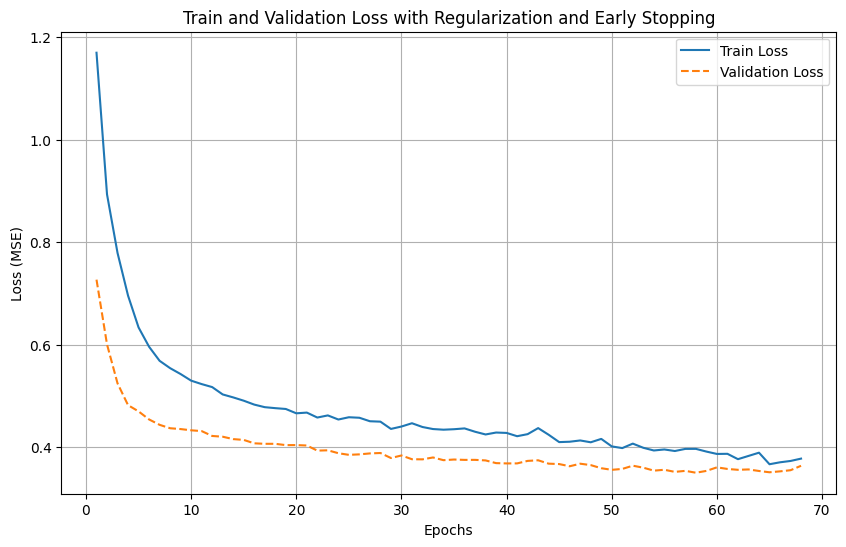

In [ ]:
# Plot losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss with Regularization and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## **Multi-Input Model**

In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize the model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
st_model = SentenceTransformer(model_name, device=device)

# Compute embeddings for training data
crew_train_embeddings = st_model.encode(train_data['crew'].tolist(), convert_to_tensor=True)
overview_train_embeddings = st_model.encode(train_data['overview'].tolist(), convert_to_tensor=True)

# Compute embeddings for validation data
crew_valid_embeddings = st_model.encode(valid_data['crew'].tolist(), convert_to_tensor=True)
overview_valid_embeddings = st_model.encode(valid_data['overview'].tolist(), convert_to_tensor=True)

# Compute embeddings for test data
crew_test_embeddings = st_model.encode(test_data['crew'].tolist(), convert_to_tensor=True)
overview_test_embeddings = st_model.encode(test_data['overview'].tolist(), convert_to_tensor=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch.nn as nn

class MultiInputModel(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_features, text_input_dim, hidden_layer_size, dropout_rate, n_layers):
        super(MultiInputModel, self).__init__()

        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim)
            for num_categories, embedding_dim in embedding_sizes.values()
        ])
        self.embedding_dropout = nn.Dropout(dropout_rate)

        # Text embeddings processing
        self.text_fc = nn.Sequential(
            nn.Linear(text_input_dim, hidden_layer_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_layer_size),
            nn.Dropout(dropout_rate)
        )

        # Calculate total input dimension
        total_emb_dim = sum(embedding_dim for _, embedding_dim in embedding_sizes.values())
        total_input_dim = num_numerical_features + total_emb_dim + hidden_layer_size

        # Fully connected layers
        layers = []
        input_dim = total_input_dim
        for _ in range(n_layers):
            layers.append(nn.Linear(input_dim, hidden_layer_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            input_dim = hidden_layer_size

        # Output layer
        layers.append(nn.Linear(hidden_layer_size, 1))

        self.fc = nn.Sequential(*layers)

    def forward(self, numerical_data, categorical_data, crew_embedding, overview_embedding):
        # Process categorical data through embeddings
        embedded = [emb(categorical_data[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        embedded = self.embedding_dropout(embedded)

        # Process text embeddings
        text_data = torch.cat([crew_embedding, overview_embedding], dim=1)
        text_features = self.text_fc(text_data)

        # Concatenate all features
        x = torch.cat([numerical_data, embedded, text_features], dim=1)
        return self.fc(x)

In [ ]:
def train_model_with_regularization(
    model, train_loader, val_loader, num_epochs, optimizer=None, learning_rate=0.0001,
    early_stopping_patience=10, dropout_rate=0.3, weight_decay=1e-4):

    train_losses = []  # To store training losses
    val_losses = []    # To store validation losses

    # Initialize the optimizer with weight decay (L2 regularization)
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    best_val_loss = float('inf')  # Initialize best validation loss for early stopping
    patience_counter = 0  # Counter for early stopping

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_train_loss = 0.0  # Accumulate training loss

        # Training phase
        for numerical_data, categorical_data, crew_data, overview_data, labels in train_loader:
            # Move data to device (e.g., GPU or CPU)
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            crew_data = crew_data.to(device)
            overview_data = overview_data.to(device)
            labels = labels.to(device)

            # Forward pass
            predictions = model(numerical_data, categorical_data, crew_data, overview_data)
            loss = F.mse_loss(predictions, labels)  # MSE loss

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()  # Accumulate loss for the epoch

        # Calculate average training loss
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        total_val_loss = 0.0

        with torch.no_grad():  # Disable gradient computation
            for numerical_data, categorical_data, crew_data, overview_data, labels in val_loader:
                # Move validation data to device
                numerical_data = numerical_data.to(device)
                categorical_data = categorical_data.to(device)
                crew_data = crew_data.to(device)
                overview_data = overview_data.to(device)
                labels = labels.to(device)

                # Forward pass
                predictions = model(numerical_data, categorical_data, crew_data, overview_data)
                loss = F.mse_loss(predictions, labels)  # MSE loss
                total_val_loss += loss.item()

        # Calculate average validation loss
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0  # Reset patience counter if validation loss improves
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Print progress every epoch
        print(f"Epoch {epoch + 1}/{num_epochs}.. "
              f"Train Loss: {avg_train_loss:.4f}.. "
              f"Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [ ]:
# Update embedding sizes based on label encoders
embedding_sizes = {}
for col in categorical_columns:
    le = label_encoders[col]
    num_categories = len(le.classes_)
    embedding_dim = min(50, (num_categories + 1) // 2)
    embedding_sizes[col] = (num_categories, embedding_dim)

    # Print the embedding size for the current column
    print(f"Column '{col}': num_categories = {num_categories}, embedding_dim = {embedding_dim}")

# Prepare PyTorch tensors
categorical_train = torch.tensor(X_train[categorical_columns].values, dtype=torch.long)
categorical_valid = torch.tensor(X_valid[categorical_columns].values, dtype=torch.long)
categorical_test = torch.tensor(X_test[categorical_columns].values, dtype=torch.long)

# Prepare numerical data tensors
numerical_columns = X_train.columns.drop(categorical_columns)
numerical_train = torch.tensor(X_train[numerical_columns].values, dtype=torch.float32)
numerical_valid = torch.tensor(X_valid[numerical_columns].values, dtype=torch.float32)
numerical_test = torch.tensor(X_test[numerical_columns].values, dtype=torch.float32)

# Prepare label tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

from sentence_transformers import SentenceTransformer

# Initialize the model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
st_model = SentenceTransformer(model_name, device=device)


# Create TensorDatasets
train_features = TensorDataset(
    numerical_train,
    categorical_train,
    crew_train_embeddings,
    overview_train_embeddings,
    y_train_tensor
)
valid_features = TensorDataset(
    numerical_valid,
    categorical_valid,
    crew_valid_embeddings,
    overview_valid_embeddings,
    y_valid_tensor
)
test_features = TensorDataset(
    numerical_test,
    categorical_test,
    crew_test_embeddings,
    overview_test_embeddings,
    y_test_tensor
)

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_features, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_features, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_features, batch_size=batch_size, shuffle=False)

# Calculate input dimensions
text_input_dim = crew_train_embeddings.shape[1] + overview_train_embeddings.shape[1]
num_numerical_features = numerical_train.shape[1]
hidden_layer_size = 128  # You can adjust this value
dropout_rate = 0.3  # You can adjust this value
n_layers = 3


# Initialize the model
model = MultiInputModel(
    embedding_sizes=embedding_sizes,
    num_numerical_features=num_numerical_features,
    text_input_dim=text_input_dim,
    hidden_layer_size=hidden_layer_size,
    dropout_rate=dropout_rate,
    n_layers = n_layers
)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Train the model
train_losses, val_losses = train_model_with_regularization(
    model, train_loader, valid_loader, num_epochs=100, optimizer=optimizer,
    dropout_rate=0.5, weight_decay=1e-4
)

Column 'genre': num_categories = 2304, embedding_dim = 50
Column 'orig_lang': num_categories = 54, embedding_dim = 27
Column 'country': num_categories = 60, embedding_dim = 30
Epoch 1/100.. Train Loss: 0.8580.. Validation Loss: 0.5814
Epoch 2/100.. Train Loss: 0.5906.. Validation Loss: 0.4829
Epoch 3/100.. Train Loss: 0.4950.. Validation Loss: 0.4396
Epoch 4/100.. Train Loss: 0.4245.. Validation Loss: 0.4032
Epoch 5/100.. Train Loss: 0.4027.. Validation Loss: 0.4265
Epoch 6/100.. Train Loss: 0.3714.. Validation Loss: 0.4045
Epoch 7/100.. Train Loss: 0.3426.. Validation Loss: 0.3998
Epoch 8/100.. Train Loss: 0.3159.. Validation Loss: 0.4030
Epoch 9/100.. Train Loss: 0.2972.. Validation Loss: 0.4198
Epoch 10/100.. Train Loss: 0.2806.. Validation Loss: 0.3733
Epoch 11/100.. Train Loss: 0.2694.. Validation Loss: 0.3894
Epoch 12/100.. Train Loss: 0.2509.. Validation Loss: 0.3891
Epoch 13/100.. Train Loss: 0.2416.. Validation Loss: 0.3844
Epoch 14/100.. Train Loss: 0.2428.. Validation Loss: 

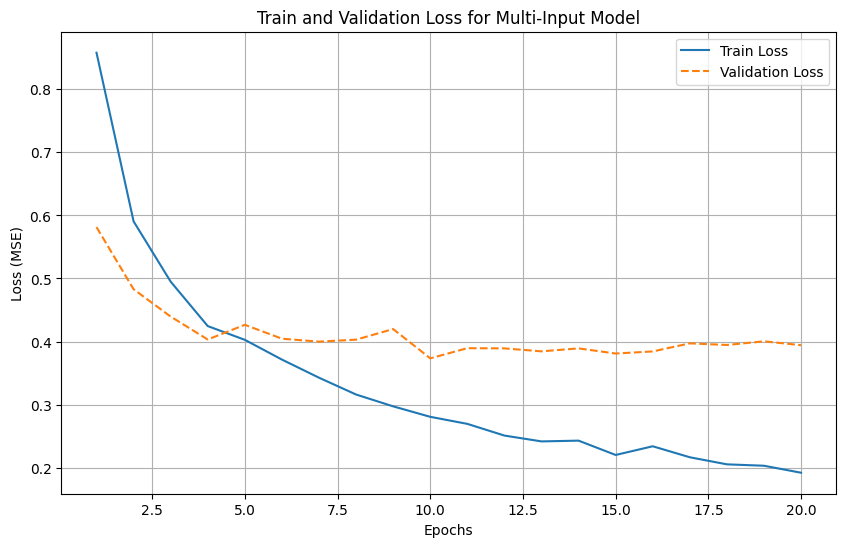

In [ ]:
# Plot losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss for Multi-Input Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for numerical_data, categorical_data, crew_data, overview_data, labels in data_loader:
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            crew_data = crew_data.to(device)
            overview_data = overview_data.to(device)
            labels = labels.to(device)

            predictions = model(numerical_data, categorical_data, crew_data, overview_data)
            all_predictions.append(predictions.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_predictions = np.concatenate(all_predictions).flatten()
    all_labels = np.concatenate(all_labels).flatten()

    mse = mean_squared_error(all_labels, all_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(all_labels, all_predictions)
    r2 = r2_score(all_labels, all_predictions)

    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R-squared: {r2:.4f}")

    return all_labels, all_predictions

# Evaluate the model
all_labels, all_predictions = evaluate_model(model, test_loader)

Test MSE: 0.4470
Test RMSE: 0.6686
Test MAE: 0.4322
Test R-squared: 0.5507


In [ ]:
# Simplify the model architecture
class SimplifiedMultiInputModel(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_features, text_input_dim, dropout_rate):
        super(SimplifiedMultiInputModel, self).__init__()

        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim)
            for num_categories, embedding_dim in embedding_sizes.values()
        ])
        self.embedding_dropout = nn.Dropout(dropout_rate)

        # Optionally skip further processing of text embeddings
        # total_input_dim without text_fc
        total_emb_dim = sum(embedding_dim for _, embedding_dim in embedding_sizes.values())
        total_input_dim = num_numerical_features + total_emb_dim + text_input_dim

        # Simplify the fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(total_input_dim, 32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 1)
        )

    def forward(self, numerical_data, categorical_data, crew_embedding, overview_embedding):
        # Process categorical data through embeddings
        embedded = [emb(categorical_data[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        embedded = self.embedding_dropout(embedded)

        # Concatenate text embeddings directly
        text_data = torch.cat([crew_embedding, overview_embedding], dim=1)

        # Concatenate all features
        x = torch.cat([numerical_data, embedded, text_data], dim=1)
        return self.fc(x)

In [ ]:
def train_model_with_regularization(
    model, train_loader, val_loader, num_epochs, optimizer=None, learning_rate=0.0001,
    early_stopping_patience=10, dropout_rate=0.3, weight_decay=1e-4):

    train_losses = []  # To store training losses
    val_losses = []    # To store validation losses

    # Initialize the optimizer with weight decay (L2 regularization)
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    best_val_loss = float('inf')  # Initialize best validation loss for early stopping
    patience_counter = 0  # Counter for early stopping

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_train_loss = 0.0  # Accumulate training loss

        # Training phase
        for numerical_data, categorical_data, crew_data, overview_data, labels in train_loader:
            # Move data to device (e.g., GPU or CPU)
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            crew_data = crew_data.to(device)
            overview_data = overview_data.to(device)
            labels = labels.to(device)

            # Forward pass
            predictions = model(numerical_data, categorical_data, crew_data, overview_data)
            loss = F.mse_loss(predictions, labels)  # MSE loss

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()  # Accumulate loss for the epoch

        # Calculate average training loss
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        total_val_loss = 0.0

        with torch.no_grad():  # Disable gradient computation
            for numerical_data, categorical_data, crew_data, overview_data, labels in val_loader:
                # Move validation data to device
                numerical_data = numerical_data.to(device)
                categorical_data = categorical_data.to(device)
                crew_data = crew_data.to(device)
                overview_data = overview_data.to(device)
                labels = labels.to(device)

                # Forward pass
                predictions = model(numerical_data, categorical_data, crew_data, overview_data)
                loss = F.mse_loss(predictions, labels)  # MSE loss
                total_val_loss += loss.item()

        # Calculate average validation loss
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0  # Reset patience counter if validation loss improves
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Print progress every epoch
        print(f"Epoch {epoch + 1}/{num_epochs}.. "
              f"Train Loss: {avg_train_loss:.4f}.. "
              f"Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [ ]:
# Update embedding sizes based on label encoders
embedding_sizes = {}
for col in categorical_columns:
    le = label_encoders[col]
    num_categories = len(le.classes_)
    embedding_dim = min(50, (num_categories + 1) // 2)
    embedding_sizes[col] = (num_categories, embedding_dim)

    # Print the embedding size for the current column
    print(f"Column '{col}': num_categories = {num_categories}, embedding_dim = {embedding_dim}")

# Prepare PyTorch tensors
categorical_train = torch.tensor(X_train[categorical_columns].values, dtype=torch.long)
categorical_valid = torch.tensor(X_valid[categorical_columns].values, dtype=torch.long)
categorical_test = torch.tensor(X_test[categorical_columns].values, dtype=torch.long)

# Prepare numerical data tensors
numerical_columns = X_train.columns.drop(categorical_columns)
numerical_train = torch.tensor(X_train[numerical_columns].values, dtype=torch.float32)
numerical_valid = torch.tensor(X_valid[numerical_columns].values, dtype=torch.float32)
numerical_test = torch.tensor(X_test[numerical_columns].values, dtype=torch.float32)

# Prepare label tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

from sentence_transformers import SentenceTransformer

# Initialize the model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
st_model = SentenceTransformer(model_name, device=device)


# Create TensorDatasets
train_features = TensorDataset(
    numerical_train,
    categorical_train,
    crew_train_embeddings,
    overview_train_embeddings,
    y_train_tensor
)
valid_features = TensorDataset(
    numerical_valid,
    categorical_valid,
    crew_valid_embeddings,
    overview_valid_embeddings,
    y_valid_tensor
)
test_features = TensorDataset(
    numerical_test,
    categorical_test,
    crew_test_embeddings,
    overview_test_embeddings,
    y_test_tensor
)

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_features, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_features, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_features, batch_size=batch_size, shuffle=False)

# Calculate input dimensions
text_input_dim = crew_train_embeddings.shape[1] + overview_train_embeddings.shape[1]
num_numerical_features = numerical_train.shape[1]

# Initialize the model
model = SimplifiedMultiInputModel(
    embedding_sizes=embedding_sizes,
    num_numerical_features=num_numerical_features,
    text_input_dim=text_input_dim,
    dropout_rate=0.3
)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Train the model
train_losses, val_losses = train_model_with_regularization(
    model, train_loader, valid_loader, num_epochs=100, optimizer=optimizer,
    dropout_rate=0.3, weight_decay=1e-4
)

# Evaluate the model
all_labels, all_predictions = evaluate_model(model, test_loader)

Column 'genre': num_categories = 2304, embedding_dim = 50
Column 'orig_lang': num_categories = 54, embedding_dim = 27
Column 'country': num_categories = 60, embedding_dim = 30
Epoch 1/100.. Train Loss: 0.8331.. Validation Loss: 0.6173
Epoch 2/100.. Train Loss: 0.5879.. Validation Loss: 0.4524
Epoch 3/100.. Train Loss: 0.4794.. Validation Loss: 0.4213
Epoch 4/100.. Train Loss: 0.4491.. Validation Loss: 0.4221
Epoch 5/100.. Train Loss: 0.4354.. Validation Loss: 0.3863
Epoch 6/100.. Train Loss: 0.4187.. Validation Loss: 0.3865
Epoch 7/100.. Train Loss: 0.4088.. Validation Loss: 0.3734
Epoch 8/100.. Train Loss: 0.3954.. Validation Loss: 0.3788
Epoch 9/100.. Train Loss: 0.3831.. Validation Loss: 0.3712
Epoch 10/100.. Train Loss: 0.3737.. Validation Loss: 0.3776
Epoch 11/100.. Train Loss: 0.3719.. Validation Loss: 0.3708
Epoch 12/100.. Train Loss: 0.3741.. Validation Loss: 0.3767
Epoch 13/100.. Train Loss: 0.3533.. Validation Loss: 0.3667
Epoch 14/100.. Train Loss: 0.3495.. Validation Loss: 

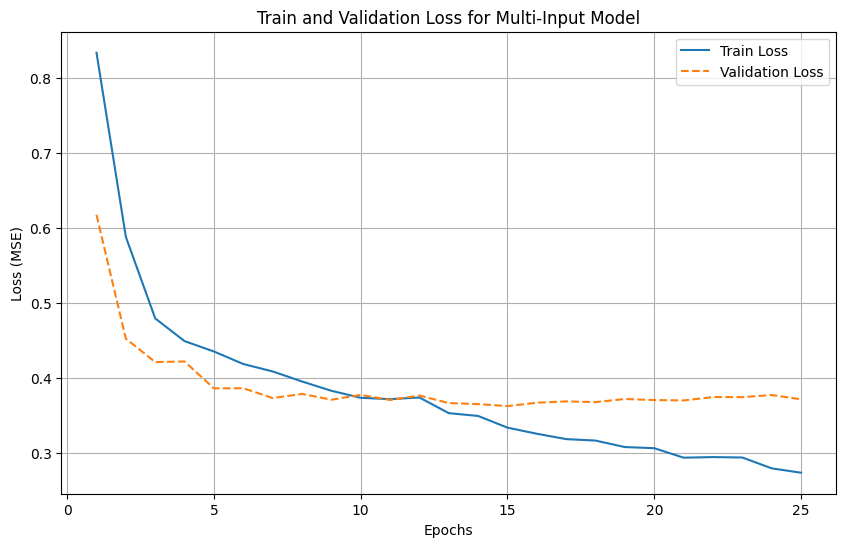

In [ ]:
# Plot losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss for Multi-Input Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## **HyperParam Tuning**

In [ ]:
!pip install optuna
import optuna
import torch.nn.functional as F

def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    hidden_units = trial.suggest_int('hidden_units', 16, 256, log=True)
    n_layers = trial.suggest_int('n_layers', 1, 3)

    # Build model with suggested hyperparameters
    model = MultiInputModel(
        embedding_sizes=embedding_sizes,
        num_numerical_features=num_numerical_features,
        text_input_dim=text_input_dim,
        hidden_layer_size = hidden_units,
        dropout_rate=dropout_rate,
        n_layers = n_layers
    )
    model.to(device)

    # Define optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Train the model
    train_losses, val_losses = train_model_with_regularization(
        model, train_loader, valid_loader, num_epochs=50, optimizer=optimizer,
        dropout_rate=dropout_rate, weight_decay=weight_decay, early_stopping_patience=5
    )

    # Return the best validation loss
    return min(val_losses)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
def train_model_with_regularization(
    model, train_loader, val_loader, num_epochs, optimizer, dropout_rate, weight_decay,
    early_stopping_patience=5):

    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for numerical_data, categorical_data, crew_data, overview_data, labels in train_loader:
            numerical_data = numerical_data.to(device)
            categorical_data = categorical_data.to(device)
            crew_data = crew_data.to(device)
            overview_data = overview_data.to(device)
            labels = labels.to(device)

            # Forward pass
            predictions = model(numerical_data, categorical_data, crew_data, overview_data)
            loss = F.mse_loss(predictions, labels)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0

        with torch.no_grad():
            for numerical_data, categorical_data, crew_data, overview_data, labels in val_loader:
                numerical_data = numerical_data.to(device)
                categorical_data = categorical_data.to(device)
                crew_data = crew_data.to(device)
                overview_data = overview_data.to(device)
                labels = labels.to(device)

                predictions = model(numerical_data, categorical_data, crew_data, overview_data)
                loss = F.mse_loss(predictions, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Print progress
        print(f"Epoch {epoch + 1}/{num_epochs}.. "
              f"Train Loss: {avg_train_loss:.4f}.. "
              f"Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [ ]:
# Create the Optuna study
study = optuna.create_study(direction='minimize')

# Start the optimization
study.optimize(objective, n_trials=50)  # You can adjust n_trials based on your computational resources


[I 2024-12-06 16:51:55,547] A new study created in memory with name: no-name-7a0239ec-4f59-4564-82ea-fac0db9e3e6b
<ipython-input-45-04d75b152f9a>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-45-04d75b152f9a>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
<ipython-input-45-04d75b152f9a>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dr

Epoch 1/50.. Train Loss: 1.0901.. Validation Loss: 0.9840
Epoch 2/50.. Train Loss: 1.0240.. Validation Loss: 0.9421
Epoch 3/50.. Train Loss: 0.9896.. Validation Loss: 0.9168
Epoch 4/50.. Train Loss: 0.9731.. Validation Loss: 0.8980
Epoch 5/50.. Train Loss: 0.9542.. Validation Loss: 0.8830
Epoch 6/50.. Train Loss: 0.9320.. Validation Loss: 0.8695
Epoch 7/50.. Train Loss: 0.9009.. Validation Loss: 0.8584
Epoch 8/50.. Train Loss: 0.8948.. Validation Loss: 0.8481
Epoch 9/50.. Train Loss: 0.8815.. Validation Loss: 0.8395
Epoch 10/50.. Train Loss: 0.8651.. Validation Loss: 0.8302
Epoch 11/50.. Train Loss: 0.8540.. Validation Loss: 0.8232
Epoch 12/50.. Train Loss: 0.8388.. Validation Loss: 0.8144
Epoch 13/50.. Train Loss: 0.8358.. Validation Loss: 0.8074
Epoch 14/50.. Train Loss: 0.8101.. Validation Loss: 0.8012
Epoch 15/50.. Train Loss: 0.8132.. Validation Loss: 0.7932
Epoch 16/50.. Train Loss: 0.7941.. Validation Loss: 0.7866
Epoch 17/50.. Train Loss: 0.7916.. Validation Loss: 0.7809
Epoch 

[I 2024-12-06 16:53:20,917] Trial 0 finished with value: 0.6326458528637886 and parameters: {'learning_rate': 1.051840853284795e-05, 'weight_decay': 0.009685825014391398, 'dropout_rate': 0.2842162920914859, 'hidden_units': 251, 'n_layers': 1}. Best is trial 0 with value: 0.6326458528637886.


Epoch 50/50.. Train Loss: 0.4886.. Validation Loss: 0.6326
Epoch 1/50.. Train Loss: 0.9917.. Validation Loss: 0.8856
Epoch 2/50.. Train Loss: 0.8969.. Validation Loss: 0.8189
Epoch 3/50.. Train Loss: 0.8379.. Validation Loss: 0.7698
Epoch 4/50.. Train Loss: 0.7836.. Validation Loss: 0.7285
Epoch 5/50.. Train Loss: 0.7220.. Validation Loss: 0.6794
Epoch 6/50.. Train Loss: 0.6520.. Validation Loss: 0.6396
Epoch 7/50.. Train Loss: 0.6016.. Validation Loss: 0.6017
Epoch 8/50.. Train Loss: 0.5480.. Validation Loss: 0.5736
Epoch 9/50.. Train Loss: 0.5064.. Validation Loss: 0.5477
Epoch 10/50.. Train Loss: 0.4527.. Validation Loss: 0.5389
Epoch 11/50.. Train Loss: 0.4242.. Validation Loss: 0.5201
Epoch 12/50.. Train Loss: 0.4020.. Validation Loss: 0.5248
Epoch 13/50.. Train Loss: 0.3838.. Validation Loss: 0.5209
Epoch 14/50.. Train Loss: 0.3441.. Validation Loss: 0.5265
Epoch 15/50.. Train Loss: 0.3339.. Validation Loss: 0.5238
Epoch 16/50.. Train Loss: 0.3230.. Validation Loss: 0.5176
Epoch 

[I 2024-12-06 16:53:45,495] Trial 1 finished with value: 0.5085845519788563 and parameters: {'learning_rate': 0.00011271340767464043, 'weight_decay': 1.911249796984919e-05, 'dropout_rate': 0.3124935629131803, 'hidden_units': 120, 'n_layers': 2}. Best is trial 1 with value: 0.5085845519788563.


Early stopping at epoch 26
Epoch 1/50.. Train Loss: 0.9986.. Validation Loss: 0.9599
Epoch 2/50.. Train Loss: 0.9687.. Validation Loss: 0.9154
Epoch 3/50.. Train Loss: 0.9141.. Validation Loss: 0.8530
Epoch 4/50.. Train Loss: 0.8562.. Validation Loss: 0.7938
Epoch 5/50.. Train Loss: 0.7970.. Validation Loss: 0.7356
Epoch 6/50.. Train Loss: 0.7174.. Validation Loss: 0.6819
Epoch 7/50.. Train Loss: 0.6614.. Validation Loss: 0.6519
Epoch 8/50.. Train Loss: 0.5916.. Validation Loss: 0.6101
Epoch 9/50.. Train Loss: 0.5578.. Validation Loss: 0.5838
Epoch 10/50.. Train Loss: 0.5053.. Validation Loss: 0.5617
Epoch 11/50.. Train Loss: 0.4603.. Validation Loss: 0.5489
Epoch 12/50.. Train Loss: 0.4460.. Validation Loss: 0.5409
Epoch 13/50.. Train Loss: 0.4048.. Validation Loss: 0.5390
Epoch 14/50.. Train Loss: 0.3980.. Validation Loss: 0.5225
Epoch 15/50.. Train Loss: 0.3730.. Validation Loss: 0.5254
Epoch 16/50.. Train Loss: 0.3441.. Validation Loss: 0.5270
Epoch 17/50.. Train Loss: 0.3547.. Val

[I 2024-12-06 16:54:00,829] Trial 2 finished with value: 0.5225119525566697 and parameters: {'learning_rate': 8.99427079619418e-05, 'weight_decay': 6.888030815370883e-06, 'dropout_rate': 0.14539379232232164, 'hidden_units': 40, 'n_layers': 3}. Best is trial 1 with value: 0.5085845519788563.


Early stopping at epoch 19
Epoch 1/50.. Train Loss: 0.9382.. Validation Loss: 0.7674
Epoch 2/50.. Train Loss: 0.7298.. Validation Loss: 0.4785
Epoch 3/50.. Train Loss: 0.5699.. Validation Loss: 0.4590
Epoch 4/50.. Train Loss: 0.5139.. Validation Loss: 0.4174
Epoch 5/50.. Train Loss: 0.4896.. Validation Loss: 0.4024
Epoch 6/50.. Train Loss: 0.4593.. Validation Loss: 0.3883
Epoch 7/50.. Train Loss: 0.4230.. Validation Loss: 0.3958
Epoch 8/50.. Train Loss: 0.4208.. Validation Loss: 0.3678
Epoch 9/50.. Train Loss: 0.3958.. Validation Loss: 0.3722
Epoch 10/50.. Train Loss: 0.3846.. Validation Loss: 0.3685
Epoch 11/50.. Train Loss: 0.3837.. Validation Loss: 0.3648
Epoch 12/50.. Train Loss: 0.3657.. Validation Loss: 0.3615
Epoch 13/50.. Train Loss: 0.3623.. Validation Loss: 0.3623
Epoch 14/50.. Train Loss: 0.3513.. Validation Loss: 0.3698
Epoch 15/50.. Train Loss: 0.3444.. Validation Loss: 0.3695
Epoch 16/50.. Train Loss: 0.3258.. Validation Loss: 0.3603
Epoch 17/50.. Train Loss: 0.3160.. Val

[I 2024-12-06 16:54:19,714] Trial 3 finished with value: 0.3548733009956777 and parameters: {'learning_rate': 0.0011886458954228688, 'weight_decay': 7.959746290276281e-05, 'dropout_rate': 0.29291641651192624, 'hidden_units': 28, 'n_layers': 3}. Best is trial 3 with value: 0.3548733009956777.


Early stopping at epoch 22
Epoch 1/50.. Train Loss: 1.0268.. Validation Loss: 0.8568
Epoch 2/50.. Train Loss: 0.8893.. Validation Loss: 0.7891
Epoch 3/50.. Train Loss: 0.8113.. Validation Loss: 0.7196
Epoch 4/50.. Train Loss: 0.7573.. Validation Loss: 0.6563
Epoch 5/50.. Train Loss: 0.6945.. Validation Loss: 0.5930
Epoch 6/50.. Train Loss: 0.6336.. Validation Loss: 0.5470
Epoch 7/50.. Train Loss: 0.5818.. Validation Loss: 0.5090
Epoch 8/50.. Train Loss: 0.5433.. Validation Loss: 0.4835
Epoch 9/50.. Train Loss: 0.5174.. Validation Loss: 0.4649
Epoch 10/50.. Train Loss: 0.4915.. Validation Loss: 0.4568
Epoch 11/50.. Train Loss: 0.4645.. Validation Loss: 0.4509
Epoch 12/50.. Train Loss: 0.4487.. Validation Loss: 0.4459
Epoch 13/50.. Train Loss: 0.4209.. Validation Loss: 0.4384
Epoch 14/50.. Train Loss: 0.4196.. Validation Loss: 0.4393
Epoch 15/50.. Train Loss: 0.3953.. Validation Loss: 0.4363
Epoch 16/50.. Train Loss: 0.3948.. Validation Loss: 0.4390
Epoch 17/50.. Train Loss: 0.3894.. Val

[I 2024-12-06 16:54:38,628] Trial 4 finished with value: 0.41721593867987394 and parameters: {'learning_rate': 0.0003247210378917787, 'weight_decay': 1.553312473770691e-06, 'dropout_rate': 0.40129536062947857, 'hidden_units': 36, 'n_layers': 1}. Best is trial 3 with value: 0.3548733009956777.


Early stopping at epoch 27
Epoch 1/50.. Train Loss: 0.9250.. Validation Loss: 0.7630
Epoch 2/50.. Train Loss: 0.7667.. Validation Loss: 0.6849
Epoch 3/50.. Train Loss: 0.6715.. Validation Loss: 0.6073
Epoch 4/50.. Train Loss: 0.5820.. Validation Loss: 0.5556
Epoch 5/50.. Train Loss: 0.5244.. Validation Loss: 0.5217
Epoch 6/50.. Train Loss: 0.4522.. Validation Loss: 0.5028
Epoch 7/50.. Train Loss: 0.4125.. Validation Loss: 0.4857
Epoch 8/50.. Train Loss: 0.3800.. Validation Loss: 0.4799
Epoch 9/50.. Train Loss: 0.3431.. Validation Loss: 0.4760
Epoch 10/50.. Train Loss: 0.3243.. Validation Loss: 0.4781
Epoch 11/50.. Train Loss: 0.2913.. Validation Loss: 0.4892
Epoch 12/50.. Train Loss: 0.2675.. Validation Loss: 0.4941
Epoch 13/50.. Train Loss: 0.2522.. Validation Loss: 0.4974


[I 2024-12-06 16:54:52,866] Trial 5 finished with value: 0.47595193749293685 and parameters: {'learning_rate': 0.00021825578373698882, 'weight_decay': 0.00026573816236923986, 'dropout_rate': 0.31746355439222196, 'hidden_units': 140, 'n_layers': 1}. Best is trial 3 with value: 0.3548733009956777.


Early stopping at epoch 14
Epoch 1/50.. Train Loss: 0.9685.. Validation Loss: 0.8543
Epoch 2/50.. Train Loss: 0.8780.. Validation Loss: 0.7453
Epoch 3/50.. Train Loss: 0.7832.. Validation Loss: 0.6155
Epoch 4/50.. Train Loss: 0.6638.. Validation Loss: 0.5044
Epoch 5/50.. Train Loss: 0.5972.. Validation Loss: 0.4674
Epoch 6/50.. Train Loss: 0.5399.. Validation Loss: 0.4432
Epoch 7/50.. Train Loss: 0.5233.. Validation Loss: 0.4191
Epoch 8/50.. Train Loss: 0.5155.. Validation Loss: 0.4415
Epoch 9/50.. Train Loss: 0.4848.. Validation Loss: 0.4103
Epoch 10/50.. Train Loss: 0.4890.. Validation Loss: 0.4144
Epoch 11/50.. Train Loss: 0.4671.. Validation Loss: 0.4126
Epoch 12/50.. Train Loss: 0.4506.. Validation Loss: 0.4075
Epoch 13/50.. Train Loss: 0.4367.. Validation Loss: 0.4032
Epoch 14/50.. Train Loss: 0.4389.. Validation Loss: 0.3955
Epoch 15/50.. Train Loss: 0.4392.. Validation Loss: 0.3921
Epoch 16/50.. Train Loss: 0.4270.. Validation Loss: 0.3807
Epoch 17/50.. Train Loss: 0.4232.. Val

[I 2024-12-06 16:55:09,183] Trial 6 finished with value: 0.3807221590541303 and parameters: {'learning_rate': 0.0009551326248124231, 'weight_decay': 2.2086997025527102e-05, 'dropout_rate': 0.3532388101762567, 'hidden_units': 22, 'n_layers': 3}. Best is trial 3 with value: 0.3548733009956777.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 1.0544.. Validation Loss: 0.9832
Epoch 2/50.. Train Loss: 0.9982.. Validation Loss: 0.9480
Epoch 3/50.. Train Loss: 0.9664.. Validation Loss: 0.9220
Epoch 4/50.. Train Loss: 0.9386.. Validation Loss: 0.9041
Epoch 5/50.. Train Loss: 0.9174.. Validation Loss: 0.8873
Epoch 6/50.. Train Loss: 0.8959.. Validation Loss: 0.8740
Epoch 7/50.. Train Loss: 0.8744.. Validation Loss: 0.8614
Epoch 8/50.. Train Loss: 0.8557.. Validation Loss: 0.8501
Epoch 9/50.. Train Loss: 0.8454.. Validation Loss: 0.8394
Epoch 10/50.. Train Loss: 0.8311.. Validation Loss: 0.8301
Epoch 11/50.. Train Loss: 0.8101.. Validation Loss: 0.8201
Epoch 12/50.. Train Loss: 0.8079.. Validation Loss: 0.8114
Epoch 13/50.. Train Loss: 0.7854.. Validation Loss: 0.8030
Epoch 14/50.. Train Loss: 0.7699.. Validation Loss: 0.7960
Epoch 15/50.. Train Loss: 0.7587.. Validation Loss: 0.7891
Epoch 16/50.. Train Loss: 0.7400.. Validation Loss: 0.7813
Epoch 17/50.. Train Loss: 0.7299.. Val

[I 2024-12-06 16:55:50,698] Trial 7 finished with value: 0.6282056830823421 and parameters: {'learning_rate': 1.8354846005221743e-05, 'weight_decay': 0.0015322349467730622, 'dropout_rate': 0.12725621103863902, 'hidden_units': 87, 'n_layers': 1}. Best is trial 3 with value: 0.3548733009956777.


Epoch 50/50.. Train Loss: 0.3630.. Validation Loss: 0.6282
Epoch 1/50.. Train Loss: 1.0507.. Validation Loss: 0.9819
Epoch 2/50.. Train Loss: 1.0284.. Validation Loss: 0.9658
Epoch 3/50.. Train Loss: 0.9946.. Validation Loss: 0.9501
Epoch 4/50.. Train Loss: 0.9968.. Validation Loss: 0.9367
Epoch 5/50.. Train Loss: 0.9757.. Validation Loss: 0.9222
Epoch 6/50.. Train Loss: 0.9718.. Validation Loss: 0.9071
Epoch 7/50.. Train Loss: 0.9409.. Validation Loss: 0.8887
Epoch 8/50.. Train Loss: 0.9382.. Validation Loss: 0.8732
Epoch 9/50.. Train Loss: 0.9243.. Validation Loss: 0.8567
Epoch 10/50.. Train Loss: 0.8994.. Validation Loss: 0.8394
Epoch 11/50.. Train Loss: 0.8818.. Validation Loss: 0.8206
Epoch 12/50.. Train Loss: 0.8759.. Validation Loss: 0.8059
Epoch 13/50.. Train Loss: 0.8633.. Validation Loss: 0.7932
Epoch 14/50.. Train Loss: 0.8477.. Validation Loss: 0.7768
Epoch 15/50.. Train Loss: 0.8459.. Validation Loss: 0.7649
Epoch 16/50.. Train Loss: 0.8139.. Validation Loss: 0.7522
Epoch 

[I 2024-12-06 16:56:29,501] Trial 8 finished with value: 0.5160305462777615 and parameters: {'learning_rate': 4.9159173743506115e-05, 'weight_decay': 1.9243516691270768e-05, 'dropout_rate': 0.359127334758498, 'hidden_units': 37, 'n_layers': 2}. Best is trial 3 with value: 0.3548733009956777.


Epoch 50/50.. Train Loss: 0.4943.. Validation Loss: 0.5160
Epoch 1/50.. Train Loss: 0.9210.. Validation Loss: 0.6809
Epoch 2/50.. Train Loss: 0.6545.. Validation Loss: 0.4678
Epoch 3/50.. Train Loss: 0.5313.. Validation Loss: 0.3873
Epoch 4/50.. Train Loss: 0.4786.. Validation Loss: 0.3876
Epoch 5/50.. Train Loss: 0.4453.. Validation Loss: 0.3876
Epoch 6/50.. Train Loss: 0.4358.. Validation Loss: 0.3882
Epoch 7/50.. Train Loss: 0.4119.. Validation Loss: 0.3737
Epoch 8/50.. Train Loss: 0.4084.. Validation Loss: 0.3570
Epoch 9/50.. Train Loss: 0.3849.. Validation Loss: 0.3563
Epoch 10/50.. Train Loss: 0.3782.. Validation Loss: 0.3510
Epoch 11/50.. Train Loss: 0.3723.. Validation Loss: 0.3606
Epoch 12/50.. Train Loss: 0.3733.. Validation Loss: 0.3608
Epoch 13/50.. Train Loss: 0.3570.. Validation Loss: 0.3480
Epoch 14/50.. Train Loss: 0.3517.. Validation Loss: 0.3584
Epoch 15/50.. Train Loss: 0.3417.. Validation Loss: 0.3594
Epoch 16/50.. Train Loss: 0.3567.. Validation Loss: 0.3606
Epoch 

[I 2024-12-06 16:56:43,814] Trial 9 finished with value: 0.3479842364322394 and parameters: {'learning_rate': 0.0015943330005372695, 'weight_decay': 0.0008281470491805495, 'dropout_rate': 0.3040372656876672, 'hidden_units': 24, 'n_layers': 3}. Best is trial 9 with value: 0.3479842364322394.


Early stopping at epoch 18
Epoch 1/50.. Train Loss: 0.9473.. Validation Loss: 0.7006
Epoch 2/50.. Train Loss: 0.7318.. Validation Loss: 0.4770
Epoch 3/50.. Train Loss: 0.6421.. Validation Loss: 0.4432
Epoch 4/50.. Train Loss: 0.5979.. Validation Loss: 0.4771
Epoch 5/50.. Train Loss: 0.5952.. Validation Loss: 0.4475
Epoch 6/50.. Train Loss: 0.5858.. Validation Loss: 0.4581
Epoch 7/50.. Train Loss: 0.5750.. Validation Loss: 0.4244
Epoch 8/50.. Train Loss: 0.5738.. Validation Loss: 0.4090
Epoch 9/50.. Train Loss: 0.5633.. Validation Loss: 0.4219
Epoch 10/50.. Train Loss: 0.5637.. Validation Loss: 0.4249
Epoch 11/50.. Train Loss: 0.5728.. Validation Loss: 0.4200
Epoch 12/50.. Train Loss: 0.5791.. Validation Loss: 0.5067


[I 2024-12-06 16:56:52,607] Trial 10 finished with value: 0.40901205595582724 and parameters: {'learning_rate': 0.009639525100240293, 'weight_decay': 0.0006204109993614719, 'dropout_rate': 0.49741771736106855, 'hidden_units': 16, 'n_layers': 3}. Best is trial 9 with value: 0.3479842364322394.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.8737.. Validation Loss: 0.5707
Epoch 2/50.. Train Loss: 0.5968.. Validation Loss: 0.4495
Epoch 3/50.. Train Loss: 0.4935.. Validation Loss: 0.4019
Epoch 4/50.. Train Loss: 0.4620.. Validation Loss: 0.3809
Epoch 5/50.. Train Loss: 0.4159.. Validation Loss: 0.3807
Epoch 6/50.. Train Loss: 0.4058.. Validation Loss: 0.3708
Epoch 7/50.. Train Loss: 0.3844.. Validation Loss: 0.3492
Epoch 8/50.. Train Loss: 0.3581.. Validation Loss: 0.3540
Epoch 9/50.. Train Loss: 0.3620.. Validation Loss: 0.3532
Epoch 10/50.. Train Loss: 0.3535.. Validation Loss: 0.3586
Epoch 11/50.. Train Loss: 0.3482.. Validation Loss: 0.3568


[I 2024-12-06 16:57:02,611] Trial 11 finished with value: 0.3491777260787785 and parameters: {'learning_rate': 0.0021087464072252014, 'weight_decay': 8.523064622286452e-05, 'dropout_rate': 0.22397627053592242, 'hidden_units': 24, 'n_layers': 3}. Best is trial 9 with value: 0.3479842364322394.


Early stopping at epoch 12
Epoch 1/50.. Train Loss: 0.7015.. Validation Loss: 0.4351
Epoch 2/50.. Train Loss: 0.4763.. Validation Loss: 0.3930
Epoch 3/50.. Train Loss: 0.4227.. Validation Loss: 0.3617
Epoch 4/50.. Train Loss: 0.3961.. Validation Loss: 0.3578
Epoch 5/50.. Train Loss: 0.3804.. Validation Loss: 0.3558
Epoch 6/50.. Train Loss: 0.3678.. Validation Loss: 0.3292
Epoch 7/50.. Train Loss: 0.3551.. Validation Loss: 0.3404
Epoch 8/50.. Train Loss: 0.3601.. Validation Loss: 0.3440
Epoch 9/50.. Train Loss: 0.3425.. Validation Loss: 0.3313
Epoch 10/50.. Train Loss: 0.3542.. Validation Loss: 0.3481
Epoch 11/50.. Train Loss: 0.3456.. Validation Loss: 0.3273
Epoch 12/50.. Train Loss: 0.3359.. Validation Loss: 0.3567
Epoch 13/50.. Train Loss: 0.3293.. Validation Loss: 0.3474
Epoch 14/50.. Train Loss: 0.3409.. Validation Loss: 0.3416
Epoch 15/50.. Train Loss: 0.3312.. Validation Loss: 0.3353


[I 2024-12-06 16:57:19,012] Trial 12 finished with value: 0.3272698107175529 and parameters: {'learning_rate': 0.0045249599470348675, 'weight_decay': 0.0024226987875383735, 'dropout_rate': 0.2170378534600224, 'hidden_units': 61, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 16
Epoch 1/50.. Train Loss: 0.6933.. Validation Loss: 0.4628
Epoch 2/50.. Train Loss: 0.4678.. Validation Loss: 0.3848
Epoch 3/50.. Train Loss: 0.4199.. Validation Loss: 0.3692
Epoch 4/50.. Train Loss: 0.4076.. Validation Loss: 0.3748
Epoch 5/50.. Train Loss: 0.3924.. Validation Loss: 0.3648
Epoch 6/50.. Train Loss: 0.4004.. Validation Loss: 0.3517
Epoch 7/50.. Train Loss: 0.4007.. Validation Loss: 0.3507
Epoch 8/50.. Train Loss: 0.3878.. Validation Loss: 0.3438
Epoch 9/50.. Train Loss: 0.3856.. Validation Loss: 0.3431
Epoch 10/50.. Train Loss: 0.3748.. Validation Loss: 0.3530
Epoch 11/50.. Train Loss: 0.3826.. Validation Loss: 0.3441
Epoch 12/50.. Train Loss: 0.3784.. Validation Loss: 0.3531
Epoch 13/50.. Train Loss: 0.3808.. Validation Loss: 0.3435


[I 2024-12-06 16:57:37,598] Trial 13 finished with value: 0.34307765820994973 and parameters: {'learning_rate': 0.0056152911282869224, 'weight_decay': 0.004073202954584581, 'dropout_rate': 0.2119887941680036, 'hidden_units': 59, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 14
Epoch 1/50.. Train Loss: 0.6676.. Validation Loss: 0.4079
Epoch 2/50.. Train Loss: 0.4676.. Validation Loss: 0.3950
Epoch 3/50.. Train Loss: 0.4389.. Validation Loss: 0.3779
Epoch 4/50.. Train Loss: 0.4233.. Validation Loss: 0.4024
Epoch 5/50.. Train Loss: 0.4303.. Validation Loss: 0.3739
Epoch 6/50.. Train Loss: 0.4230.. Validation Loss: 0.3821
Epoch 7/50.. Train Loss: 0.4172.. Validation Loss: 0.3515
Epoch 8/50.. Train Loss: 0.4280.. Validation Loss: 0.3807
Epoch 9/50.. Train Loss: 0.4233.. Validation Loss: 0.3537
Epoch 10/50.. Train Loss: 0.4056.. Validation Loss: 0.3764
Epoch 11/50.. Train Loss: 0.4210.. Validation Loss: 0.3568


[I 2024-12-06 16:57:48,111] Trial 14 finished with value: 0.3515471536666155 and parameters: {'learning_rate': 0.008900837189656324, 'weight_decay': 0.008271115536336495, 'dropout_rate': 0.2205772266604876, 'hidden_units': 60, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 12
Epoch 1/50.. Train Loss: 0.7147.. Validation Loss: 0.4547
Epoch 2/50.. Train Loss: 0.4658.. Validation Loss: 0.4217
Epoch 3/50.. Train Loss: 0.4144.. Validation Loss: 0.3816
Epoch 4/50.. Train Loss: 0.3836.. Validation Loss: 0.3615
Epoch 5/50.. Train Loss: 0.3639.. Validation Loss: 0.3524
Epoch 6/50.. Train Loss: 0.3451.. Validation Loss: 0.3477
Epoch 7/50.. Train Loss: 0.3416.. Validation Loss: 0.3545
Epoch 8/50.. Train Loss: 0.3408.. Validation Loss: 0.3413
Epoch 9/50.. Train Loss: 0.3236.. Validation Loss: 0.3375
Epoch 10/50.. Train Loss: 0.3182.. Validation Loss: 0.3487
Epoch 11/50.. Train Loss: 0.3177.. Validation Loss: 0.3513
Epoch 12/50.. Train Loss: 0.3261.. Validation Loss: 0.3435
Epoch 13/50.. Train Loss: 0.3003.. Validation Loss: 0.3340
Epoch 14/50.. Train Loss: 0.3124.. Validation Loss: 0.3499
Epoch 15/50.. Train Loss: 0.3088.. Validation Loss: 0.3303
Epoch 16/50.. Train Loss: 0.3107.. Validation Loss: 0.3346
Epoch 17/50.. Train Loss: 0.2868.. Val

[I 2024-12-06 16:58:27,128] Trial 15 finished with value: 0.32784380903467536 and parameters: {'learning_rate': 0.00325820874631971, 'weight_decay': 0.002997378673057596, 'dropout_rate': 0.19358912604830192, 'hidden_units': 57, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 25
Epoch 1/50.. Train Loss: 0.6897.. Validation Loss: 0.4431
Epoch 2/50.. Train Loss: 0.4691.. Validation Loss: 0.4343
Epoch 3/50.. Train Loss: 0.4292.. Validation Loss: 0.3882
Epoch 4/50.. Train Loss: 0.4082.. Validation Loss: 0.3689
Epoch 5/50.. Train Loss: 0.3716.. Validation Loss: 0.3529
Epoch 6/50.. Train Loss: 0.3578.. Validation Loss: 0.3452
Epoch 7/50.. Train Loss: 0.3458.. Validation Loss: 0.3549
Epoch 8/50.. Train Loss: 0.3380.. Validation Loss: 0.3496
Epoch 9/50.. Train Loss: 0.3245.. Validation Loss: 0.3517
Epoch 10/50.. Train Loss: 0.3213.. Validation Loss: 0.3587


[I 2024-12-06 16:58:35,970] Trial 16 finished with value: 0.34517783485352993 and parameters: {'learning_rate': 0.003338869320384356, 'weight_decay': 0.002310275702229543, 'dropout_rate': 0.17260416167045142, 'hidden_units': 73, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 11
Epoch 1/50.. Train Loss: 0.8532.. Validation Loss: 0.6499
Epoch 2/50.. Train Loss: 0.5868.. Validation Loss: 0.4716
Epoch 3/50.. Train Loss: 0.4647.. Validation Loss: 0.4605
Epoch 4/50.. Train Loss: 0.4060.. Validation Loss: 0.4308
Epoch 5/50.. Train Loss: 0.3572.. Validation Loss: 0.4367
Epoch 6/50.. Train Loss: 0.3197.. Validation Loss: 0.4230
Epoch 7/50.. Train Loss: 0.2840.. Validation Loss: 0.4531
Epoch 8/50.. Train Loss: 0.2572.. Validation Loss: 0.4395
Epoch 9/50.. Train Loss: 0.2326.. Validation Loss: 0.4473
Epoch 10/50.. Train Loss: 0.2075.. Validation Loss: 0.4418


[I 2024-12-06 16:58:46,662] Trial 17 finished with value: 0.4230378563515842 and parameters: {'learning_rate': 0.00055987838186215, 'weight_decay': 0.00028276969421932855, 'dropout_rate': 0.18364975100777106, 'hidden_units': 108, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 11
Epoch 1/50.. Train Loss: 0.7423.. Validation Loss: 0.5222
Epoch 2/50.. Train Loss: 0.4867.. Validation Loss: 0.3745
Epoch 3/50.. Train Loss: 0.4345.. Validation Loss: 0.3720
Epoch 4/50.. Train Loss: 0.4076.. Validation Loss: 0.3636
Epoch 5/50.. Train Loss: 0.3859.. Validation Loss: 0.3612
Epoch 6/50.. Train Loss: 0.3763.. Validation Loss: 0.3419
Epoch 7/50.. Train Loss: 0.3540.. Validation Loss: 0.3417
Epoch 8/50.. Train Loss: 0.3624.. Validation Loss: 0.3308
Epoch 9/50.. Train Loss: 0.3649.. Validation Loss: 0.3386
Epoch 10/50.. Train Loss: 0.3517.. Validation Loss: 0.3328
Epoch 11/50.. Train Loss: 0.3547.. Validation Loss: 0.3320
Epoch 12/50.. Train Loss: 0.3450.. Validation Loss: 0.3356


[I 2024-12-06 16:58:56,435] Trial 18 finished with value: 0.3308415892533958 and parameters: {'learning_rate': 0.003526418518876713, 'weight_decay': 0.003330314560637462, 'dropout_rate': 0.25867684815563313, 'hidden_units': 49, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.7861.. Validation Loss: 0.5664
Epoch 2/50.. Train Loss: 0.4716.. Validation Loss: 0.4844
Epoch 3/50.. Train Loss: 0.3647.. Validation Loss: 0.4675
Epoch 4/50.. Train Loss: 0.3011.. Validation Loss: 0.4685
Epoch 5/50.. Train Loss: 0.2465.. Validation Loss: 0.4811
Epoch 6/50.. Train Loss: 0.1997.. Validation Loss: 0.4751
Epoch 7/50.. Train Loss: 0.1703.. Validation Loss: 0.4696


[I 2024-12-06 16:59:05,846] Trial 19 finished with value: 0.4675255576148629 and parameters: {'learning_rate': 0.0006897033996006145, 'weight_decay': 0.00027751886479247166, 'dropout_rate': 0.10158125576153348, 'hidden_units': 197, 'n_layers': 1}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 8
Epoch 1/50.. Train Loss: 0.6704.. Validation Loss: 0.4270
Epoch 2/50.. Train Loss: 0.4751.. Validation Loss: 0.3975
Epoch 3/50.. Train Loss: 0.4135.. Validation Loss: 0.3997
Epoch 4/50.. Train Loss: 0.3689.. Validation Loss: 0.3726
Epoch 5/50.. Train Loss: 0.3446.. Validation Loss: 0.3853
Epoch 6/50.. Train Loss: 0.3143.. Validation Loss: 0.3559
Epoch 7/50.. Train Loss: 0.2950.. Validation Loss: 0.3854
Epoch 8/50.. Train Loss: 0.2823.. Validation Loss: 0.3650
Epoch 9/50.. Train Loss: 0.2632.. Validation Loss: 0.3566
Epoch 10/50.. Train Loss: 0.2554.. Validation Loss: 0.3685


[I 2024-12-06 16:59:15,900] Trial 20 finished with value: 0.3559331279247999 and parameters: {'learning_rate': 0.0036068342269464327, 'weight_decay': 0.0005270743064059878, 'dropout_rate': 0.1789255348994288, 'hidden_units': 84, 'n_layers': 2}. Best is trial 12 with value: 0.3272698107175529.


Early stopping at epoch 11
Epoch 1/50.. Train Loss: 0.7497.. Validation Loss: 0.4446
Epoch 2/50.. Train Loss: 0.4955.. Validation Loss: 0.4115
Epoch 3/50.. Train Loss: 0.4331.. Validation Loss: 0.3773
Epoch 4/50.. Train Loss: 0.4086.. Validation Loss: 0.3614
Epoch 5/50.. Train Loss: 0.3870.. Validation Loss: 0.3414
Epoch 6/50.. Train Loss: 0.3729.. Validation Loss: 0.3432
Epoch 7/50.. Train Loss: 0.3741.. Validation Loss: 0.3364
Epoch 8/50.. Train Loss: 0.3609.. Validation Loss: 0.3524
Epoch 9/50.. Train Loss: 0.3531.. Validation Loss: 0.3543
Epoch 10/50.. Train Loss: 0.3551.. Validation Loss: 0.3638
Epoch 11/50.. Train Loss: 0.3460.. Validation Loss: 0.3394
Epoch 12/50.. Train Loss: 0.3440.. Validation Loss: 0.3317
Epoch 13/50.. Train Loss: 0.3349.. Validation Loss: 0.3252
Epoch 14/50.. Train Loss: 0.3328.. Validation Loss: 0.3302
Epoch 15/50.. Train Loss: 0.3336.. Validation Loss: 0.3231
Epoch 16/50.. Train Loss: 0.3217.. Validation Loss: 0.3410
Epoch 17/50.. Train Loss: 0.3185.. Val

[I 2024-12-06 16:59:35,671] Trial 21 finished with value: 0.32309629302471876 and parameters: {'learning_rate': 0.003007861144726947, 'weight_decay': 0.003486913356590933, 'dropout_rate': 0.26256447891507956, 'hidden_units': 50, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 20
Epoch 1/50.. Train Loss: 0.8105.. Validation Loss: 0.4944
Epoch 2/50.. Train Loss: 0.5153.. Validation Loss: 0.4334
Epoch 3/50.. Train Loss: 0.4561.. Validation Loss: 0.4102
Epoch 4/50.. Train Loss: 0.4146.. Validation Loss: 0.3931
Epoch 5/50.. Train Loss: 0.3948.. Validation Loss: 0.3776
Epoch 6/50.. Train Loss: 0.3721.. Validation Loss: 0.3695
Epoch 7/50.. Train Loss: 0.3482.. Validation Loss: 0.3517
Epoch 8/50.. Train Loss: 0.3384.. Validation Loss: 0.3793
Epoch 9/50.. Train Loss: 0.3266.. Validation Loss: 0.3698
Epoch 10/50.. Train Loss: 0.3214.. Validation Loss: 0.3692
Epoch 11/50.. Train Loss: 0.3050.. Validation Loss: 0.3446
Epoch 12/50.. Train Loss: 0.2815.. Validation Loss: 0.3526
Epoch 13/50.. Train Loss: 0.2863.. Validation Loss: 0.3571
Epoch 14/50.. Train Loss: 0.2686.. Validation Loss: 0.3719
Epoch 15/50.. Train Loss: 0.2707.. Validation Loss: 0.3596


[I 2024-12-06 16:59:49,257] Trial 22 finished with value: 0.34455213509500027 and parameters: {'learning_rate': 0.0021100869108479454, 'weight_decay': 0.0013172605066304566, 'dropout_rate': 0.24868031475105123, 'hidden_units': 47, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 16
Epoch 1/50.. Train Loss: 0.7195.. Validation Loss: 0.4330
Epoch 2/50.. Train Loss: 0.4748.. Validation Loss: 0.3967
Epoch 3/50.. Train Loss: 0.4311.. Validation Loss: 0.3767
Epoch 4/50.. Train Loss: 0.4272.. Validation Loss: 0.3639
Epoch 5/50.. Train Loss: 0.4063.. Validation Loss: 0.3533
Epoch 6/50.. Train Loss: 0.4014.. Validation Loss: 0.3596
Epoch 7/50.. Train Loss: 0.3875.. Validation Loss: 0.3441
Epoch 8/50.. Train Loss: 0.3890.. Validation Loss: 0.3724
Epoch 9/50.. Train Loss: 0.4062.. Validation Loss: 0.3526
Epoch 10/50.. Train Loss: 0.3956.. Validation Loss: 0.3562
Epoch 11/50.. Train Loss: 0.3918.. Validation Loss: 0.3519


[I 2024-12-06 16:59:58,560] Trial 23 finished with value: 0.34411710733547807 and parameters: {'learning_rate': 0.005470702470296505, 'weight_decay': 0.004666113786084051, 'dropout_rate': 0.2686575526293319, 'hidden_units': 50, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 12
Epoch 1/50.. Train Loss: 0.9031.. Validation Loss: 0.7664
Epoch 2/50.. Train Loss: 0.7299.. Validation Loss: 0.5834
Epoch 3/50.. Train Loss: 0.5481.. Validation Loss: 0.4709
Epoch 4/50.. Train Loss: 0.4591.. Validation Loss: 0.4461
Epoch 5/50.. Train Loss: 0.4031.. Validation Loss: 0.4448
Epoch 6/50.. Train Loss: 0.3760.. Validation Loss: 0.4305
Epoch 7/50.. Train Loss: 0.3390.. Validation Loss: 0.4348
Epoch 8/50.. Train Loss: 0.3192.. Validation Loss: 0.4360
Epoch 9/50.. Train Loss: 0.2839.. Validation Loss: 0.4237
Epoch 10/50.. Train Loss: 0.2605.. Validation Loss: 0.4220
Epoch 11/50.. Train Loss: 0.2447.. Validation Loss: 0.4296
Epoch 12/50.. Train Loss: 0.2323.. Validation Loss: 0.4185
Epoch 13/50.. Train Loss: 0.2173.. Validation Loss: 0.4215
Epoch 14/50.. Train Loss: 0.1971.. Validation Loss: 0.4212
Epoch 15/50.. Train Loss: 0.1873.. Validation Loss: 0.4412
Epoch 16/50.. Train Loss: 0.1896.. Validation Loss: 0.4346
Epoch 17/50.. Train Loss: 0.1792.. Val

[I 2024-12-06 17:00:17,034] Trial 24 finished with value: 0.4174331771209836 and parameters: {'learning_rate': 0.0004429089227885593, 'weight_decay': 0.001953339400971071, 'dropout_rate': 0.20815156315741734, 'hidden_units': 66, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 22
Epoch 1/50.. Train Loss: 0.6559.. Validation Loss: 0.4286
Epoch 2/50.. Train Loss: 0.4585.. Validation Loss: 0.3961
Epoch 3/50.. Train Loss: 0.4200.. Validation Loss: 0.3557
Epoch 4/50.. Train Loss: 0.4082.. Validation Loss: 0.3578
Epoch 5/50.. Train Loss: 0.3883.. Validation Loss: 0.4023
Epoch 6/50.. Train Loss: 0.3845.. Validation Loss: 0.3512
Epoch 7/50.. Train Loss: 0.3926.. Validation Loss: 0.3447
Epoch 8/50.. Train Loss: 0.3874.. Validation Loss: 0.3399
Epoch 9/50.. Train Loss: 0.3795.. Validation Loss: 0.3592
Epoch 10/50.. Train Loss: 0.3901.. Validation Loss: 0.3553
Epoch 11/50.. Train Loss: 0.3741.. Validation Loss: 0.3399
Epoch 12/50.. Train Loss: 0.3725.. Validation Loss: 0.3590
Epoch 13/50.. Train Loss: 0.3844.. Validation Loss: 0.3517
Epoch 14/50.. Train Loss: 0.3917.. Validation Loss: 0.3421
Epoch 15/50.. Train Loss: 0.3754.. Validation Loss: 0.3540


[I 2024-12-06 17:00:31,553] Trial 25 finished with value: 0.3398892506957054 and parameters: {'learning_rate': 0.005752899969779064, 'weight_decay': 0.0063141207353169596, 'dropout_rate': 0.1481510638449224, 'hidden_units': 91, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 16
Epoch 1/50.. Train Loss: 0.7888.. Validation Loss: 0.5072
Epoch 2/50.. Train Loss: 0.5283.. Validation Loss: 0.4218
Epoch 3/50.. Train Loss: 0.4620.. Validation Loss: 0.4300
Epoch 4/50.. Train Loss: 0.4198.. Validation Loss: 0.4125
Epoch 5/50.. Train Loss: 0.4019.. Validation Loss: 0.3769
Epoch 6/50.. Train Loss: 0.3621.. Validation Loss: 0.3569
Epoch 7/50.. Train Loss: 0.3597.. Validation Loss: 0.3624
Epoch 8/50.. Train Loss: 0.3503.. Validation Loss: 0.3528
Epoch 9/50.. Train Loss: 0.3307.. Validation Loss: 0.3553
Epoch 10/50.. Train Loss: 0.3242.. Validation Loss: 0.3541
Epoch 11/50.. Train Loss: 0.3115.. Validation Loss: 0.3629
Epoch 12/50.. Train Loss: 0.3077.. Validation Loss: 0.3489
Epoch 13/50.. Train Loss: 0.2966.. Validation Loss: 0.3552
Epoch 14/50.. Train Loss: 0.2903.. Validation Loss: 0.3608
Epoch 15/50.. Train Loss: 0.2883.. Validation Loss: 0.3626
Epoch 16/50.. Train Loss: 0.2589.. Validation Loss: 0.3494


[I 2024-12-06 17:00:44,397] Trial 26 finished with value: 0.34888703748583794 and parameters: {'learning_rate': 0.0023489733376705693, 'weight_decay': 0.0010644548741603763, 'dropout_rate': 0.2401352595859354, 'hidden_units': 35, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 17
Epoch 1/50.. Train Loss: 0.8585.. Validation Loss: 0.6375
Epoch 2/50.. Train Loss: 0.6055.. Validation Loss: 0.4650
Epoch 3/50.. Train Loss: 0.5010.. Validation Loss: 0.4365
Epoch 4/50.. Train Loss: 0.4487.. Validation Loss: 0.3994
Epoch 5/50.. Train Loss: 0.4229.. Validation Loss: 0.3913
Epoch 6/50.. Train Loss: 0.3989.. Validation Loss: 0.3970
Epoch 7/50.. Train Loss: 0.3819.. Validation Loss: 0.3948
Epoch 8/50.. Train Loss: 0.3623.. Validation Loss: 0.3943
Epoch 9/50.. Train Loss: 0.3578.. Validation Loss: 0.3956


[I 2024-12-06 17:00:51,566] Trial 27 finished with value: 0.39133445359766483 and parameters: {'learning_rate': 0.0010836253488349641, 'weight_decay': 0.0030347889583320275, 'dropout_rate': 0.3519868177809465, 'hidden_units': 72, 'n_layers': 1}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 10
Epoch 1/50.. Train Loss: 0.7135.. Validation Loss: 0.4440
Epoch 2/50.. Train Loss: 0.4869.. Validation Loss: 0.4437
Epoch 3/50.. Train Loss: 0.4196.. Validation Loss: 0.3864
Epoch 4/50.. Train Loss: 0.3881.. Validation Loss: 0.3657
Epoch 5/50.. Train Loss: 0.3677.. Validation Loss: 0.3720
Epoch 6/50.. Train Loss: 0.3341.. Validation Loss: 0.3560
Epoch 7/50.. Train Loss: 0.3105.. Validation Loss: 0.3556
Epoch 8/50.. Train Loss: 0.2788.. Validation Loss: 0.3633
Epoch 9/50.. Train Loss: 0.2678.. Validation Loss: 0.3722
Epoch 10/50.. Train Loss: 0.2475.. Validation Loss: 0.3739
Epoch 11/50.. Train Loss: 0.2427.. Validation Loss: 0.3732
Epoch 12/50.. Train Loss: 0.2298.. Validation Loss: 0.3552
Epoch 13/50.. Train Loss: 0.2482.. Validation Loss: 0.3833
Epoch 14/50.. Train Loss: 0.2218.. Validation Loss: 0.3665
Epoch 15/50.. Train Loss: 0.2026.. Validation Loss: 0.3693
Epoch 16/50.. Train Loss: 0.1982.. Validation Loss: 0.3764


[I 2024-12-06 17:01:05,952] Trial 28 finished with value: 0.355187872890383 and parameters: {'learning_rate': 0.005409015773583151, 'weight_decay': 0.00019062518888110795, 'dropout_rate': 0.19294533394531177, 'hidden_units': 50, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 17
Epoch 1/50.. Train Loss: 0.7508.. Validation Loss: 0.5255
Epoch 2/50.. Train Loss: 0.5010.. Validation Loss: 0.4285
Epoch 3/50.. Train Loss: 0.4181.. Validation Loss: 0.4222
Epoch 4/50.. Train Loss: 0.3979.. Validation Loss: 0.3848
Epoch 5/50.. Train Loss: 0.3767.. Validation Loss: 0.3819
Epoch 6/50.. Train Loss: 0.3695.. Validation Loss: 0.3737
Epoch 7/50.. Train Loss: 0.3671.. Validation Loss: 0.3733
Epoch 8/50.. Train Loss: 0.3646.. Validation Loss: 0.3711
Epoch 9/50.. Train Loss: 0.3725.. Validation Loss: 0.3661
Epoch 10/50.. Train Loss: 0.3580.. Validation Loss: 0.3790
Epoch 11/50.. Train Loss: 0.3533.. Validation Loss: 0.3724
Epoch 12/50.. Train Loss: 0.3519.. Validation Loss: 0.3510
Epoch 13/50.. Train Loss: 0.3427.. Validation Loss: 0.3805
Epoch 14/50.. Train Loss: 0.3496.. Validation Loss: 0.3671
Epoch 15/50.. Train Loss: 0.3454.. Validation Loss: 0.3510
Epoch 16/50.. Train Loss: 0.3449.. Validation Loss: 0.3548
Epoch 17/50.. Train Loss: 0.3462.. Val

[I 2024-12-06 17:01:42,585] Trial 29 finished with value: 0.35095039615407586 and parameters: {'learning_rate': 0.0015868227735430724, 'weight_decay': 0.009542688007510491, 'dropout_rate': 0.27079327493734756, 'hidden_units': 245, 'n_layers': 1}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 20
Epoch 1/50.. Train Loss: 1.0566.. Validation Loss: 0.9974
Epoch 2/50.. Train Loss: 1.0416.. Validation Loss: 0.9929
Epoch 3/50.. Train Loss: 1.0422.. Validation Loss: 0.9876
Epoch 4/50.. Train Loss: 1.0435.. Validation Loss: 0.9828
Epoch 5/50.. Train Loss: 1.0543.. Validation Loss: 0.9786
Epoch 6/50.. Train Loss: 1.0171.. Validation Loss: 0.9747
Epoch 7/50.. Train Loss: 1.0154.. Validation Loss: 0.9709
Epoch 8/50.. Train Loss: 1.0148.. Validation Loss: 0.9668
Epoch 9/50.. Train Loss: 1.0118.. Validation Loss: 0.9636
Epoch 10/50.. Train Loss: 1.0130.. Validation Loss: 0.9598
Epoch 11/50.. Train Loss: 1.0065.. Validation Loss: 0.9567
Epoch 12/50.. Train Loss: 0.9978.. Validation Loss: 0.9531
Epoch 13/50.. Train Loss: 0.9981.. Validation Loss: 0.9503
Epoch 14/50.. Train Loss: 0.9934.. Validation Loss: 0.9471
Epoch 15/50.. Train Loss: 0.9868.. Validation Loss: 0.9443
Epoch 16/50.. Train Loss: 0.9883.. Validation Loss: 0.9409
Epoch 17/50.. Train Loss: 0.9903.. Val

[I 2024-12-06 17:02:18,941] Trial 30 finished with value: 0.8524051699787378 and parameters: {'learning_rate': 1.0600292213785479e-05, 'weight_decay': 0.000611135207552225, 'dropout_rate': 0.401500449036812, 'hidden_units': 29, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Epoch 50/50.. Train Loss: 0.9111.. Validation Loss: 0.8524
Epoch 1/50.. Train Loss: 0.7240.. Validation Loss: 0.4380
Epoch 2/50.. Train Loss: 0.4875.. Validation Loss: 0.3974
Epoch 3/50.. Train Loss: 0.4361.. Validation Loss: 0.3867
Epoch 4/50.. Train Loss: 0.4147.. Validation Loss: 0.3602
Epoch 5/50.. Train Loss: 0.3849.. Validation Loss: 0.3735
Epoch 6/50.. Train Loss: 0.3873.. Validation Loss: 0.3474
Epoch 7/50.. Train Loss: 0.3797.. Validation Loss: 0.3485
Epoch 8/50.. Train Loss: 0.3691.. Validation Loss: 0.3387
Epoch 9/50.. Train Loss: 0.3601.. Validation Loss: 0.3673
Epoch 10/50.. Train Loss: 0.3455.. Validation Loss: 0.3415
Epoch 11/50.. Train Loss: 0.3473.. Validation Loss: 0.3502
Epoch 12/50.. Train Loss: 0.3490.. Validation Loss: 0.3642
Epoch 13/50.. Train Loss: 0.3445.. Validation Loss: 0.3302
Epoch 14/50.. Train Loss: 0.3424.. Validation Loss: 0.3491
Epoch 15/50.. Train Loss: 0.3509.. Validation Loss: 0.3325
Epoch 16/50.. Train Loss: 0.3420.. Validation Loss: 0.3337
Epoch 

[I 2024-12-06 17:02:34,972] Trial 31 finished with value: 0.3302211156114936 and parameters: {'learning_rate': 0.0033682792760947764, 'weight_decay': 0.003425145713254653, 'dropout_rate': 0.2483616628362553, 'hidden_units': 45, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 18
Epoch 1/50.. Train Loss: 0.7307.. Validation Loss: 0.4554
Epoch 2/50.. Train Loss: 0.4878.. Validation Loss: 0.4019
Epoch 3/50.. Train Loss: 0.4309.. Validation Loss: 0.3904
Epoch 4/50.. Train Loss: 0.4116.. Validation Loss: 0.3755
Epoch 5/50.. Train Loss: 0.3940.. Validation Loss: 0.3659
Epoch 6/50.. Train Loss: 0.3845.. Validation Loss: 0.3449
Epoch 7/50.. Train Loss: 0.3705.. Validation Loss: 0.3471
Epoch 8/50.. Train Loss: 0.3660.. Validation Loss: 0.3459
Epoch 9/50.. Train Loss: 0.3595.. Validation Loss: 0.3453
Epoch 10/50.. Train Loss: 0.3555.. Validation Loss: 0.3462


[I 2024-12-06 17:02:43,926] Trial 32 finished with value: 0.34492005268111825 and parameters: {'learning_rate': 0.003122089895853775, 'weight_decay': 0.005373420092630719, 'dropout_rate': 0.23716214616044834, 'hidden_units': 44, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 11
Epoch 1/50.. Train Loss: 0.6494.. Validation Loss: 0.4085
Epoch 2/50.. Train Loss: 0.4425.. Validation Loss: 0.3841
Epoch 3/50.. Train Loss: 0.4132.. Validation Loss: 0.3501
Epoch 4/50.. Train Loss: 0.4095.. Validation Loss: 0.3478
Epoch 5/50.. Train Loss: 0.4090.. Validation Loss: 0.3742
Epoch 6/50.. Train Loss: 0.4115.. Validation Loss: 0.3727
Epoch 7/50.. Train Loss: 0.3868.. Validation Loss: 0.3458
Epoch 8/50.. Train Loss: 0.3816.. Validation Loss: 0.3644
Epoch 9/50.. Train Loss: 0.3884.. Validation Loss: 0.3700
Epoch 10/50.. Train Loss: 0.3897.. Validation Loss: 0.3525
Epoch 11/50.. Train Loss: 0.3733.. Validation Loss: 0.3401
Epoch 12/50.. Train Loss: 0.3851.. Validation Loss: 0.3397
Epoch 13/50.. Train Loss: 0.3726.. Validation Loss: 0.3426
Epoch 14/50.. Train Loss: 0.3906.. Validation Loss: 0.3622
Epoch 15/50.. Train Loss: 0.3923.. Validation Loss: 0.3474
Epoch 16/50.. Train Loss: 0.3698.. Validation Loss: 0.3321
Epoch 17/50.. Train Loss: 0.3718.. Val

[I 2024-12-06 17:03:16,191] Trial 33 finished with value: 0.3321027080528438 and parameters: {'learning_rate': 0.009940176511254359, 'weight_decay': 0.0024247227885645243, 'dropout_rate': 0.15884424249311704, 'hidden_units': 56, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 0.7475.. Validation Loss: 0.4501
Epoch 2/50.. Train Loss: 0.5053.. Validation Loss: 0.4122
Epoch 3/50.. Train Loss: 0.4555.. Validation Loss: 0.3688
Epoch 4/50.. Train Loss: 0.4267.. Validation Loss: 0.3603
Epoch 5/50.. Train Loss: 0.4051.. Validation Loss: 0.3573
Epoch 6/50.. Train Loss: 0.3974.. Validation Loss: 0.3879
Epoch 7/50.. Train Loss: 0.3845.. Validation Loss: 0.3393
Epoch 8/50.. Train Loss: 0.3781.. Validation Loss: 0.3342
Epoch 9/50.. Train Loss: 0.3693.. Validation Loss: 0.3454
Epoch 10/50.. Train Loss: 0.3675.. Validation Loss: 0.3538
Epoch 11/50.. Train Loss: 0.3582.. Validation Loss: 0.3491
Epoch 12/50.. Train Loss: 0.3465.. Validation Loss: 0.3357


[I 2024-12-06 17:03:24,800] Trial 34 finished with value: 0.33423207327723503 and parameters: {'learning_rate': 0.004597343012833891, 'weight_decay': 0.0014184733238665518, 'dropout_rate': 0.2829143450983517, 'hidden_units': 32, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.8832.. Validation Loss: 0.5960
Epoch 2/50.. Train Loss: 0.5886.. Validation Loss: 0.4510
Epoch 3/50.. Train Loss: 0.4873.. Validation Loss: 0.4213
Epoch 4/50.. Train Loss: 0.4391.. Validation Loss: 0.3900
Epoch 5/50.. Train Loss: 0.4180.. Validation Loss: 0.3841
Epoch 6/50.. Train Loss: 0.3847.. Validation Loss: 0.3689
Epoch 7/50.. Train Loss: 0.3536.. Validation Loss: 0.3564
Epoch 8/50.. Train Loss: 0.3357.. Validation Loss: 0.3615
Epoch 9/50.. Train Loss: 0.3053.. Validation Loss: 0.3613
Epoch 10/50.. Train Loss: 0.3051.. Validation Loss: 0.3762
Epoch 11/50.. Train Loss: 0.2932.. Validation Loss: 0.3674


[I 2024-12-06 17:03:35,047] Trial 35 finished with value: 0.356370413210243 and parameters: {'learning_rate': 0.001377356037691623, 'weight_decay': 1.5138224512614497e-06, 'dropout_rate': 0.20460190232534956, 'hidden_units': 40, 'n_layers': 3}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 12
Epoch 1/50.. Train Loss: 0.9697.. Validation Loss: 0.8532
Epoch 2/50.. Train Loss: 0.8732.. Validation Loss: 0.7749
Epoch 3/50.. Train Loss: 0.7980.. Validation Loss: 0.6994
Epoch 4/50.. Train Loss: 0.7277.. Validation Loss: 0.6313
Epoch 5/50.. Train Loss: 0.6373.. Validation Loss: 0.5671
Epoch 6/50.. Train Loss: 0.5825.. Validation Loss: 0.5302
Epoch 7/50.. Train Loss: 0.5269.. Validation Loss: 0.5027
Epoch 8/50.. Train Loss: 0.4740.. Validation Loss: 0.4910
Epoch 9/50.. Train Loss: 0.4597.. Validation Loss: 0.4776
Epoch 10/50.. Train Loss: 0.4421.. Validation Loss: 0.4677
Epoch 11/50.. Train Loss: 0.4048.. Validation Loss: 0.4603
Epoch 12/50.. Train Loss: 0.3772.. Validation Loss: 0.4631
Epoch 13/50.. Train Loss: 0.3625.. Validation Loss: 0.4590
Epoch 14/50.. Train Loss: 0.3467.. Validation Loss: 0.4562
Epoch 15/50.. Train Loss: 0.3273.. Validation Loss: 0.4701
Epoch 16/50.. Train Loss: 0.3107.. Validation Loss: 0.4697
Epoch 17/50.. Train Loss: 0.3053.. Val

[I 2024-12-06 17:03:51,033] Trial 36 finished with value: 0.4562414074316621 and parameters: {'learning_rate': 0.00020312926689635097, 'weight_decay': 4.494754742873737e-05, 'dropout_rate': 0.32560791942273676, 'hidden_units': 75, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 19
Epoch 1/50.. Train Loss: 0.7999.. Validation Loss: 0.5760
Epoch 2/50.. Train Loss: 0.5089.. Validation Loss: 0.4958
Epoch 3/50.. Train Loss: 0.4188.. Validation Loss: 0.4518
Epoch 4/50.. Train Loss: 0.3592.. Validation Loss: 0.4420
Epoch 5/50.. Train Loss: 0.3153.. Validation Loss: 0.4493
Epoch 6/50.. Train Loss: 0.2634.. Validation Loss: 0.4416
Epoch 7/50.. Train Loss: 0.2292.. Validation Loss: 0.4616
Epoch 8/50.. Train Loss: 0.2016.. Validation Loss: 0.4694
Epoch 9/50.. Train Loss: 0.1705.. Validation Loss: 0.4826
Epoch 10/50.. Train Loss: 0.1647.. Validation Loss: 0.4673


[I 2024-12-06 17:04:00,911] Trial 37 finished with value: 0.44164260290563107 and parameters: {'learning_rate': 0.0008766302941065863, 'weight_decay': 6.859860170437371e-06, 'dropout_rate': 0.12192915076397078, 'hidden_units': 113, 'n_layers': 1}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 11
Epoch 1/50.. Train Loss: 0.7766.. Validation Loss: 0.4691
Epoch 2/50.. Train Loss: 0.5175.. Validation Loss: 0.4457
Epoch 3/50.. Train Loss: 0.4389.. Validation Loss: 0.4185
Epoch 4/50.. Train Loss: 0.4094.. Validation Loss: 0.3834
Epoch 5/50.. Train Loss: 0.3771.. Validation Loss: 0.3740
Epoch 6/50.. Train Loss: 0.3547.. Validation Loss: 0.3913
Epoch 7/50.. Train Loss: 0.3247.. Validation Loss: 0.3793
Epoch 8/50.. Train Loss: 0.3100.. Validation Loss: 0.3734
Epoch 9/50.. Train Loss: 0.2881.. Validation Loss: 0.3770
Epoch 10/50.. Train Loss: 0.2867.. Validation Loss: 0.3574
Epoch 11/50.. Train Loss: 0.2724.. Validation Loss: 0.3878
Epoch 12/50.. Train Loss: 0.2619.. Validation Loss: 0.3684
Epoch 13/50.. Train Loss: 0.2516.. Validation Loss: 0.3576
Epoch 14/50.. Train Loss: 0.2320.. Validation Loss: 0.3632


[I 2024-12-06 17:04:14,225] Trial 38 finished with value: 0.3573992238380015 and parameters: {'learning_rate': 0.002363670080908017, 'weight_decay': 0.00041663014958494884, 'dropout_rate': 0.28551437229082244, 'hidden_units': 99, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 15
Epoch 1/50.. Train Loss: 1.0085.. Validation Loss: 0.9530
Epoch 2/50.. Train Loss: 0.9682.. Validation Loss: 0.9219
Epoch 3/50.. Train Loss: 0.9443.. Validation Loss: 0.8891
Epoch 4/50.. Train Loss: 0.9292.. Validation Loss: 0.8575
Epoch 5/50.. Train Loss: 0.8854.. Validation Loss: 0.8267
Epoch 6/50.. Train Loss: 0.8554.. Validation Loss: 0.8001
Epoch 7/50.. Train Loss: 0.8223.. Validation Loss: 0.7749
Epoch 8/50.. Train Loss: 0.8041.. Validation Loss: 0.7531
Epoch 9/50.. Train Loss: 0.7669.. Validation Loss: 0.7307
Epoch 10/50.. Train Loss: 0.7389.. Validation Loss: 0.7074
Epoch 11/50.. Train Loss: 0.7081.. Validation Loss: 0.6851
Epoch 12/50.. Train Loss: 0.6787.. Validation Loss: 0.6642
Epoch 13/50.. Train Loss: 0.6467.. Validation Loss: 0.6416
Epoch 14/50.. Train Loss: 0.6229.. Validation Loss: 0.6234
Epoch 15/50.. Train Loss: 0.5871.. Validation Loss: 0.6030
Epoch 16/50.. Train Loss: 0.5628.. Validation Loss: 0.5861
Epoch 17/50.. Train Loss: 0.5418.. Val

[I 2024-12-06 17:04:39,281] Trial 39 finished with value: 0.5006369985640049 and parameters: {'learning_rate': 6.693100827776583e-05, 'weight_decay': 0.00603889295625288, 'dropout_rate': 0.23554094999371955, 'hidden_units': 41, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 32
Epoch 1/50.. Train Loss: 0.7390.. Validation Loss: 0.4273
Epoch 2/50.. Train Loss: 0.5122.. Validation Loss: 0.4196
Epoch 3/50.. Train Loss: 0.4531.. Validation Loss: 0.3921
Epoch 4/50.. Train Loss: 0.4288.. Validation Loss: 0.3708
Epoch 5/50.. Train Loss: 0.4166.. Validation Loss: 0.3310
Epoch 6/50.. Train Loss: 0.4149.. Validation Loss: 0.4010
Epoch 7/50.. Train Loss: 0.4089.. Validation Loss: 0.3791
Epoch 8/50.. Train Loss: 0.4157.. Validation Loss: 0.3434
Epoch 9/50.. Train Loss: 0.4096.. Validation Loss: 0.3545


[I 2024-12-06 17:04:50,398] Trial 40 finished with value: 0.3310178918763995 and parameters: {'learning_rate': 0.007072489175914769, 'weight_decay': 0.0019695797781647483, 'dropout_rate': 0.33507053975018763, 'hidden_units': 138, 'n_layers': 3}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 10
Epoch 1/50.. Train Loss: 0.7269.. Validation Loss: 0.4532
Epoch 2/50.. Train Loss: 0.4809.. Validation Loss: 0.3923
Epoch 3/50.. Train Loss: 0.4406.. Validation Loss: 0.3758
Epoch 4/50.. Train Loss: 0.4079.. Validation Loss: 0.3527
Epoch 5/50.. Train Loss: 0.3835.. Validation Loss: 0.3737
Epoch 6/50.. Train Loss: 0.3823.. Validation Loss: 0.3390
Epoch 7/50.. Train Loss: 0.3684.. Validation Loss: 0.3417
Epoch 8/50.. Train Loss: 0.3765.. Validation Loss: 0.3357
Epoch 9/50.. Train Loss: 0.3578.. Validation Loss: 0.3490
Epoch 10/50.. Train Loss: 0.3571.. Validation Loss: 0.3669
Epoch 11/50.. Train Loss: 0.3506.. Validation Loss: 0.3430
Epoch 12/50.. Train Loss: 0.3526.. Validation Loss: 0.3359


[I 2024-12-06 17:05:01,096] Trial 41 finished with value: 0.3356861784122884 and parameters: {'learning_rate': 0.004062592903701832, 'weight_decay': 0.003494181352025125, 'dropout_rate': 0.26844756926576335, 'hidden_units': 53, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.7505.. Validation Loss: 0.4803
Epoch 2/50.. Train Loss: 0.5083.. Validation Loss: 0.4109
Epoch 3/50.. Train Loss: 0.4352.. Validation Loss: 0.3778
Epoch 4/50.. Train Loss: 0.4033.. Validation Loss: 0.3646
Epoch 5/50.. Train Loss: 0.3798.. Validation Loss: 0.3681
Epoch 6/50.. Train Loss: 0.3849.. Validation Loss: 0.3439
Epoch 7/50.. Train Loss: 0.3475.. Validation Loss: 0.3478
Epoch 8/50.. Train Loss: 0.3491.. Validation Loss: 0.3623
Epoch 9/50.. Train Loss: 0.3571.. Validation Loss: 0.3376
Epoch 10/50.. Train Loss: 0.3452.. Validation Loss: 0.3341
Epoch 11/50.. Train Loss: 0.3274.. Validation Loss: 0.3559
Epoch 12/50.. Train Loss: 0.3378.. Validation Loss: 0.3290
Epoch 13/50.. Train Loss: 0.3224.. Validation Loss: 0.3566
Epoch 14/50.. Train Loss: 0.3258.. Validation Loss: 0.3525
Epoch 15/50.. Train Loss: 0.3260.. Validation Loss: 0.3373
Epoch 16/50.. Train Loss: 0.3269.. Validation Loss: 0.3274
Epoch 17/50.. Train Loss: 0.3203.. Val

[I 2024-12-06 17:05:25,169] Trial 42 finished with value: 0.32738899858668447 and parameters: {'learning_rate': 0.002779119108383358, 'weight_decay': 0.003327193968401469, 'dropout_rate': 0.25584350197950445, 'hidden_units': 65, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 21
Epoch 1/50.. Train Loss: 0.7672.. Validation Loss: 0.4678
Epoch 2/50.. Train Loss: 0.5134.. Validation Loss: 0.4045
Epoch 3/50.. Train Loss: 0.4391.. Validation Loss: 0.3731
Epoch 4/50.. Train Loss: 0.4173.. Validation Loss: 0.4019
Epoch 5/50.. Train Loss: 0.3941.. Validation Loss: 0.3657
Epoch 6/50.. Train Loss: 0.3684.. Validation Loss: 0.3802
Epoch 7/50.. Train Loss: 0.3539.. Validation Loss: 0.3631
Epoch 8/50.. Train Loss: 0.3386.. Validation Loss: 0.3438
Epoch 9/50.. Train Loss: 0.3231.. Validation Loss: 0.3445
Epoch 10/50.. Train Loss: 0.3253.. Validation Loss: 0.3487
Epoch 11/50.. Train Loss: 0.3152.. Validation Loss: 0.3407
Epoch 12/50.. Train Loss: 0.2921.. Validation Loss: 0.3325
Epoch 13/50.. Train Loss: 0.2835.. Validation Loss: 0.3540
Epoch 14/50.. Train Loss: 0.2789.. Validation Loss: 0.3494
Epoch 15/50.. Train Loss: 0.2674.. Validation Loss: 0.3563
Epoch 16/50.. Train Loss: 0.2634.. Validation Loss: 0.3460


[I 2024-12-06 17:05:40,032] Trial 43 finished with value: 0.33246783120557666 and parameters: {'learning_rate': 0.0026450425834690493, 'weight_decay': 0.000936702296792246, 'dropout_rate': 0.30619332825157597, 'hidden_units': 66, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 17
Epoch 1/50.. Train Loss: 0.7692.. Validation Loss: 0.4922
Epoch 2/50.. Train Loss: 0.4989.. Validation Loss: 0.4172
Epoch 3/50.. Train Loss: 0.4425.. Validation Loss: 0.3928
Epoch 4/50.. Train Loss: 0.4090.. Validation Loss: 0.3737
Epoch 5/50.. Train Loss: 0.3938.. Validation Loss: 0.3903
Epoch 6/50.. Train Loss: 0.3768.. Validation Loss: 0.3673
Epoch 7/50.. Train Loss: 0.3612.. Validation Loss: 0.3545
Epoch 8/50.. Train Loss: 0.3615.. Validation Loss: 0.3600
Epoch 9/50.. Train Loss: 0.3570.. Validation Loss: 0.3518
Epoch 10/50.. Train Loss: 0.3438.. Validation Loss: 0.3579
Epoch 11/50.. Train Loss: 0.3428.. Validation Loss: 0.3476
Epoch 12/50.. Train Loss: 0.3390.. Validation Loss: 0.3580
Epoch 13/50.. Train Loss: 0.3370.. Validation Loss: 0.3491
Epoch 14/50.. Train Loss: 0.3254.. Validation Loss: 0.3409
Epoch 15/50.. Train Loss: 0.3188.. Validation Loss: 0.3507
Epoch 16/50.. Train Loss: 0.3368.. Validation Loss: 0.3389
Epoch 17/50.. Train Loss: 0.3241.. Val

[I 2024-12-06 17:06:28,885] Trial 44 finished with value: 0.3281165789812803 and parameters: {'learning_rate': 0.0015472553171923184, 'weight_decay': 0.009805051657427191, 'dropout_rate': 0.250766595184342, 'hidden_units': 83, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 25
Epoch 1/50.. Train Loss: 0.7376.. Validation Loss: 0.4752
Epoch 2/50.. Train Loss: 0.4833.. Validation Loss: 0.3933
Epoch 3/50.. Train Loss: 0.4217.. Validation Loss: 0.3874
Epoch 4/50.. Train Loss: 0.3984.. Validation Loss: 0.3598
Epoch 5/50.. Train Loss: 0.3715.. Validation Loss: 0.3625
Epoch 6/50.. Train Loss: 0.3649.. Validation Loss: 0.3499
Epoch 7/50.. Train Loss: 0.3525.. Validation Loss: 0.3491
Epoch 8/50.. Train Loss: 0.3341.. Validation Loss: 0.3627
Epoch 9/50.. Train Loss: 0.3232.. Validation Loss: 0.3780
Epoch 10/50.. Train Loss: 0.3225.. Validation Loss: 0.3471
Epoch 11/50.. Train Loss: 0.3169.. Validation Loss: 0.3711
Epoch 12/50.. Train Loss: 0.3066.. Validation Loss: 0.3426
Epoch 13/50.. Train Loss: 0.3123.. Validation Loss: 0.3485
Epoch 14/50.. Train Loss: 0.3093.. Validation Loss: 0.3346
Epoch 15/50.. Train Loss: 0.3013.. Validation Loss: 0.3441
Epoch 16/50.. Train Loss: 0.2985.. Validation Loss: 0.3550
Epoch 17/50.. Train Loss: 0.3052.. Val

[I 2024-12-06 17:06:48,052] Trial 45 finished with value: 0.3345850361511111 and parameters: {'learning_rate': 0.001824787241901493, 'weight_decay': 0.0069994332158709325, 'dropout_rate': 0.19668193933656333, 'hidden_units': 81, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 19
Epoch 1/50.. Train Loss: 0.8796.. Validation Loss: 0.6406
Epoch 2/50.. Train Loss: 0.6016.. Validation Loss: 0.4359
Epoch 3/50.. Train Loss: 0.4807.. Validation Loss: 0.4090
Epoch 4/50.. Train Loss: 0.4403.. Validation Loss: 0.4016
Epoch 5/50.. Train Loss: 0.4115.. Validation Loss: 0.3929
Epoch 6/50.. Train Loss: 0.3923.. Validation Loss: 0.3885
Epoch 7/50.. Train Loss: 0.3737.. Validation Loss: 0.3739
Epoch 8/50.. Train Loss: 0.3504.. Validation Loss: 0.3709
Epoch 9/50.. Train Loss: 0.3444.. Validation Loss: 0.3821
Epoch 10/50.. Train Loss: 0.3336.. Validation Loss: 0.3688
Epoch 11/50.. Train Loss: 0.3147.. Validation Loss: 0.3712
Epoch 12/50.. Train Loss: 0.3047.. Validation Loss: 0.3739
Epoch 13/50.. Train Loss: 0.2849.. Validation Loss: 0.3692
Epoch 14/50.. Train Loss: 0.2920.. Validation Loss: 0.3631
Epoch 15/50.. Train Loss: 0.2890.. Validation Loss: 0.3596
Epoch 16/50.. Train Loss: 0.2891.. Validation Loss: 0.3813
Epoch 17/50.. Train Loss: 0.2789.. Val

[I 2024-12-06 17:07:04,818] Trial 46 finished with value: 0.3596131852827966 and parameters: {'learning_rate': 0.0011393422714422636, 'weight_decay': 0.005028408515701274, 'dropout_rate': 0.2944465127786543, 'hidden_units': 63, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 20
Epoch 1/50.. Train Loss: 0.7231.. Validation Loss: 0.5078
Epoch 2/50.. Train Loss: 0.4732.. Validation Loss: 0.3799
Epoch 3/50.. Train Loss: 0.4209.. Validation Loss: 0.3843
Epoch 4/50.. Train Loss: 0.3994.. Validation Loss: 0.3402
Epoch 5/50.. Train Loss: 0.4060.. Validation Loss: 0.4050
Epoch 6/50.. Train Loss: 0.3916.. Validation Loss: 0.3495
Epoch 7/50.. Train Loss: 0.3874.. Validation Loss: 0.3485
Epoch 8/50.. Train Loss: 0.3823.. Validation Loss: 0.3360
Epoch 9/50.. Train Loss: 0.3955.. Validation Loss: 0.3750
Epoch 10/50.. Train Loss: 0.3912.. Validation Loss: 0.3429
Epoch 11/50.. Train Loss: 0.3716.. Validation Loss: 0.3522
Epoch 12/50.. Train Loss: 0.4172.. Validation Loss: 0.4283


[I 2024-12-06 17:07:17,997] Trial 47 finished with value: 0.33595007145777345 and parameters: {'learning_rate': 0.007215223659737222, 'weight_decay': 0.001789891074248216, 'dropout_rate': 0.22686321609335064, 'hidden_units': 124, 'n_layers': 3}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 13
Epoch 1/50.. Train Loss: 0.8905.. Validation Loss: 0.7026
Epoch 2/50.. Train Loss: 0.6702.. Validation Loss: 0.4727
Epoch 3/50.. Train Loss: 0.5225.. Validation Loss: 0.4544
Epoch 4/50.. Train Loss: 0.4857.. Validation Loss: 0.3989
Epoch 5/50.. Train Loss: 0.4405.. Validation Loss: 0.3968
Epoch 6/50.. Train Loss: 0.4307.. Validation Loss: 0.3885
Epoch 7/50.. Train Loss: 0.3876.. Validation Loss: 0.3839
Epoch 8/50.. Train Loss: 0.3798.. Validation Loss: 0.3812
Epoch 9/50.. Train Loss: 0.3751.. Validation Loss: 0.3806
Epoch 10/50.. Train Loss: 0.3618.. Validation Loss: 0.3694
Epoch 11/50.. Train Loss: 0.3501.. Validation Loss: 0.3665
Epoch 12/50.. Train Loss: 0.3469.. Validation Loss: 0.3596
Epoch 13/50.. Train Loss: 0.3299.. Validation Loss: 0.3686
Epoch 14/50.. Train Loss: 0.3290.. Validation Loss: 0.3715
Epoch 15/50.. Train Loss: 0.3261.. Validation Loss: 0.3559
Epoch 16/50.. Train Loss: 0.3136.. Validation Loss: 0.3582
Epoch 17/50.. Train Loss: 0.3137.. Val

[I 2024-12-06 17:07:43,342] Trial 48 finished with value: 0.35254031186923385 and parameters: {'learning_rate': 0.0007866274852501309, 'weight_decay': 0.009311301024073045, 'dropout_rate': 0.39595008431152856, 'hidden_units': 95, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 24
Epoch 1/50.. Train Loss: 0.8474.. Validation Loss: 0.6082
Epoch 2/50.. Train Loss: 0.5864.. Validation Loss: 0.4579
Epoch 3/50.. Train Loss: 0.4885.. Validation Loss: 0.4504
Epoch 4/50.. Train Loss: 0.4480.. Validation Loss: 0.4076
Epoch 5/50.. Train Loss: 0.4096.. Validation Loss: 0.4019
Epoch 6/50.. Train Loss: 0.3866.. Validation Loss: 0.3770
Epoch 7/50.. Train Loss: 0.3731.. Validation Loss: 0.3881
Epoch 8/50.. Train Loss: 0.3436.. Validation Loss: 0.3860
Epoch 9/50.. Train Loss: 0.3240.. Validation Loss: 0.3708
Epoch 10/50.. Train Loss: 0.3017.. Validation Loss: 0.3753
Epoch 11/50.. Train Loss: 0.2866.. Validation Loss: 0.3720
Epoch 12/50.. Train Loss: 0.2727.. Validation Loss: 0.3851
Epoch 13/50.. Train Loss: 0.2658.. Validation Loss: 0.3767


[I 2024-12-06 17:07:54,206] Trial 49 finished with value: 0.37079604947939515 and parameters: {'learning_rate': 0.001416487689449863, 'weight_decay': 4.624592599927885e-06, 'dropout_rate': 0.25168008538715286, 'hidden_units': 55, 'n_layers': 2}. Best is trial 21 with value: 0.32309629302471876.


Early stopping at epoch 14


In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Number of finished trials:  50
Best trial:
  Value: 0.32309629302471876
  Params: 
    learning_rate: 0.003007861144726947
    weight_decay: 0.003486913356590933
    dropout_rate: 0.26256447891507956
    hidden_units: 50
    n_layers: 2


Epoch 1/100.. Train Loss: 0.7451.. Validation Loss: 0.4709
Epoch 2/100.. Train Loss: 0.5029.. Validation Loss: 0.3966
Epoch 3/100.. Train Loss: 0.4365.. Validation Loss: 0.3786
Epoch 4/100.. Train Loss: 0.4176.. Validation Loss: 0.3556
Epoch 5/100.. Train Loss: 0.4052.. Validation Loss: 0.3433
Epoch 6/100.. Train Loss: 0.3745.. Validation Loss: 0.3498
Epoch 7/100.. Train Loss: 0.3734.. Validation Loss: 0.3486
Epoch 8/100.. Train Loss: 0.3594.. Validation Loss: 0.3364
Epoch 9/100.. Train Loss: 0.3517.. Validation Loss: 0.3343
Epoch 10/100.. Train Loss: 0.3541.. Validation Loss: 0.3374
Epoch 11/100.. Train Loss: 0.3516.. Validation Loss: 0.3388
Epoch 12/100.. Train Loss: 0.3411.. Validation Loss: 0.3450
Epoch 13/100.. Train Loss: 0.3421.. Validation Loss: 0.3469
Epoch 14/100.. Train Loss: 0.3366.. Validation Loss: 0.3414
Epoch 15/100.. Train Loss: 0.3340.. Validation Loss: 0.3382
Epoch 16/100.. Train Loss: 0.3333.. Validation Loss: 0.3369
Epoch 17/100.. Train Loss: 0.3251.. Validation Lo

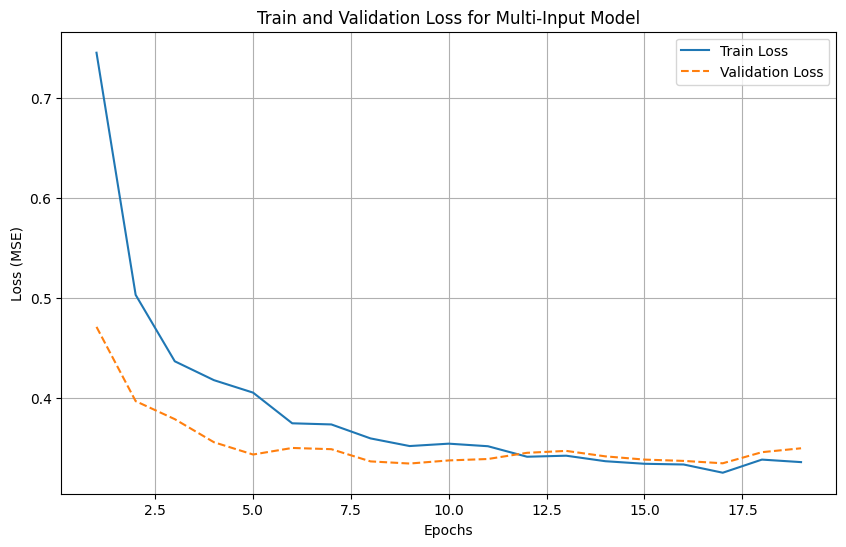

Test MSE: 0.3650
Test RMSE: 0.6042
Test MAE: 0.4434
Test R-squared: 0.6331


In [ ]:
best_params = study.best_trial.params

# Initialize the model with the best hyperparameters
model = MultiInputModel(
    embedding_sizes=embedding_sizes,
    num_numerical_features=num_numerical_features,
    text_input_dim=text_input_dim,
    hidden_layer_size=best_params['hidden_units'],
    dropout_rate=best_params['dropout_rate'],
    n_layers=best_params['n_layers']
)
model.to(device)

# Define optimizer
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=best_params['learning_rate'],
    weight_decay=best_params['weight_decay']
)

# Retrain the model (include dropout_rate)
train_losses, val_losses = train_model_with_regularization(
    model,
    train_loader,
    valid_loader,
    num_epochs=100,
    optimizer=optimizer,
    dropout_rate=best_params['dropout_rate'],  # Add this line
    early_stopping_patience=10,
    weight_decay=best_params['weight_decay']
)

# Plot losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss for Multi-Input Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the test set
all_labels, all_predictions = evaluate_model(model, test_loader)

## **Feature Importance Inspection**

In [ ]:
# Permute crew and overview text features
train_data['crew_permuted'] = np.random.permutation(train_data['crew'].values)
train_data['overview_permuted'] = np.random.permutation(train_data['overview'].values)

valid_data['crew_permuted'] = np.random.permutation(valid_data['crew'].values)
valid_data['overview_permuted'] = np.random.permutation(valid_data['overview'].values)

test_data['crew_permuted'] = np.random.permutation(test_data['crew'].values)
test_data['overview_permuted'] = np.random.permutation(test_data['overview'].values)


In [ ]:
# Compute embeddings for permuted text features
crew_train_embeddings_permuted = st_model.encode(train_data['crew_permuted'].tolist(), convert_to_tensor=True)
overview_train_embeddings_permuted = st_model.encode(train_data['overview_permuted'].tolist(), convert_to_tensor=True)

crew_valid_embeddings_permuted = st_model.encode(valid_data['crew_permuted'].tolist(), convert_to_tensor=True)
overview_valid_embeddings_permuted = st_model.encode(valid_data['overview_permuted'].tolist(), convert_to_tensor=True)

crew_test_embeddings_permuted = st_model.encode(test_data['crew_permuted'].tolist(), convert_to_tensor=True)
overview_test_embeddings_permuted = st_model.encode(test_data['overview_permuted'].tolist(), convert_to_tensor=True)

In [ ]:
# Create TensorDatasets with permuted embeddings
train_features_permuted = TensorDataset(
    numerical_train,
    categorical_train,
    crew_train_embeddings_permuted,
    overview_train_embeddings_permuted,
    y_train_tensor
)
valid_features_permuted = TensorDataset(
    numerical_valid,
    categorical_valid,
    crew_valid_embeddings_permuted,
    overview_valid_embeddings_permuted,
    y_valid_tensor
)
test_features_permuted = TensorDataset(
    numerical_test,
    categorical_test,
    crew_test_embeddings_permuted,
    overview_test_embeddings_permuted,
    y_test_tensor
)

# DataLoaders
train_loader_permuted = DataLoader(train_features_permuted, batch_size=batch_size, shuffle=True)
valid_loader_permuted = DataLoader(valid_features_permuted, batch_size=batch_size, shuffle=False)
test_loader_permuted = DataLoader(test_features_permuted, batch_size=batch_size, shuffle=False)

In [ ]:
# Train the model with permuted embeddings
train_losses_permuted, val_losses_permuted = train_model_with_regularization(
    model, train_loader_permuted, valid_loader_permuted, num_epochs=100, optimizer=optimizer,
    dropout_rate=0.5, weight_decay=1e-4
)

# Evaluate the model
print("Performance with original embeddings:")
all_labels_original, all_predictions_original = evaluate_model(model, test_loader)

print("\nPerformance with permuted embeddings:")
all_labels_permuted, all_predictions_permuted = evaluate_model(model, test_loader_permuted)

Epoch 1/100.. Train Loss: 0.3590.. Validation Loss: 0.3538
Epoch 2/100.. Train Loss: 0.3067.. Validation Loss: 0.3833
Epoch 3/100.. Train Loss: 0.2879.. Validation Loss: 0.3664
Epoch 4/100.. Train Loss: 0.2739.. Validation Loss: 0.3613
Epoch 5/100.. Train Loss: 0.2644.. Validation Loss: 0.3818
Early stopping at epoch 6
Performance with original embeddings:
Test MSE: 0.4082
Test RMSE: 0.6389
Test MAE: 0.4147
Test R-squared: 0.5897

Performance with permuted embeddings:
Test MSE: 0.4109
Test RMSE: 0.6410
Test MAE: 0.4132
Test R-squared: 0.5870


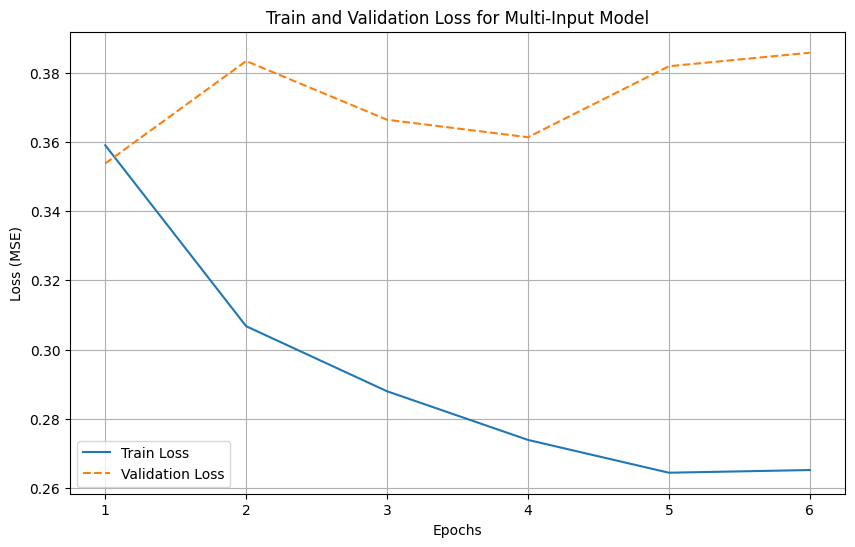

In [ ]:
# Plot losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_permuted) + 1), train_losses_permuted, label='Train Loss')
plt.plot(range(1, len(val_losses_permuted) + 1), val_losses_permuted, label='Validation Loss', linestyle='--')
plt.title('Train and Validation Loss for Multi-Input Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

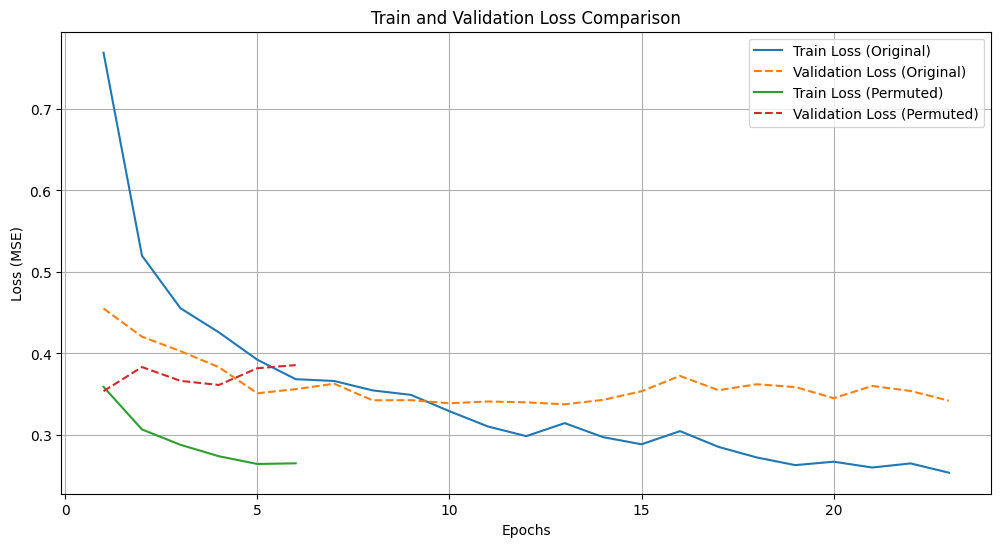

In [ ]:
# Plot comparison of train and validation losses
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss (Original)')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss (Original)', linestyle='--')
plt.plot(range(1, len(train_losses_permuted) + 1), train_losses_permuted, label='Train Loss (Permuted)')
plt.plot(range(1, len(val_losses_permuted) + 1), val_losses_permuted, label='Validation Loss (Permuted)', linestyle='--')
plt.title('Train and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## **Perform PCA**

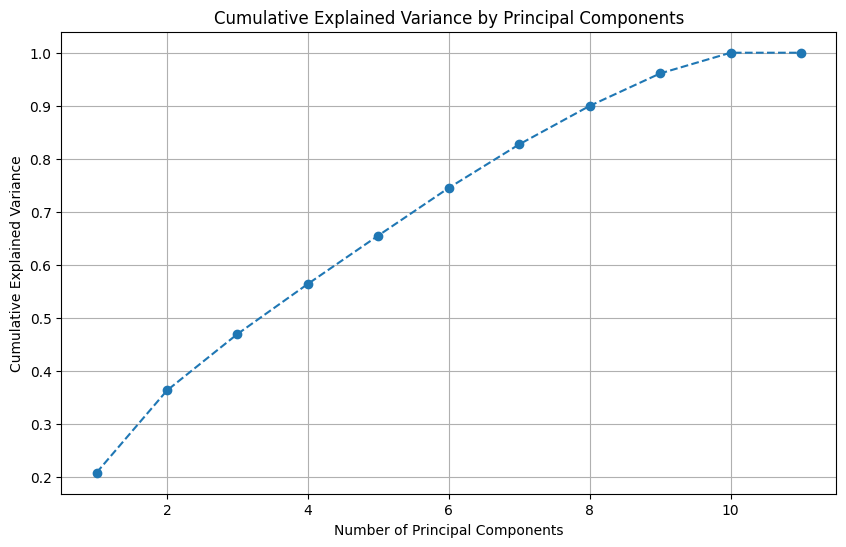

Number of components to retain for 95% variance: 9


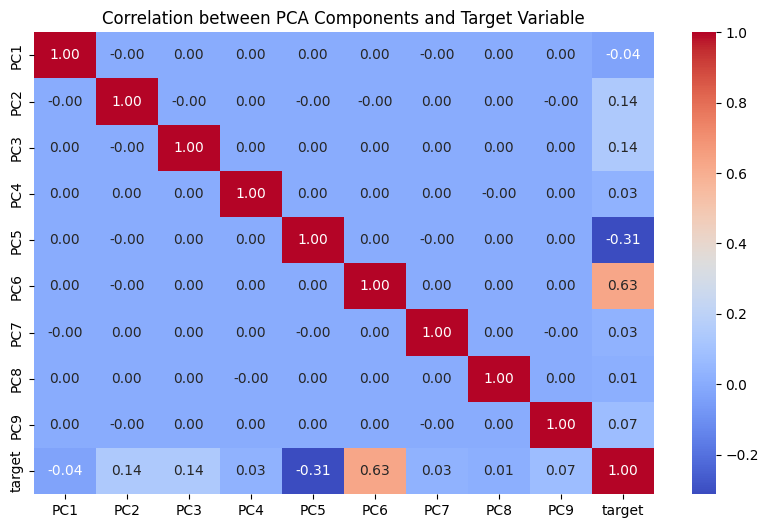

In [ ]:
import torch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Concatenate numerical and categorical features for PCA
train_data_combined = torch.cat((numerical_train, categorical_train.float()), dim=1).numpy()
valid_data_combined = torch.cat((numerical_valid, categorical_valid.float()), dim=1).numpy()
test_data_combined = torch.cat((numerical_test, categorical_test.float()), dim=1).numpy()

# Combine all data (train, valid, test) for PCA (no data leakage since PCA is unsupervised)
all_data_combined = np.vstack([train_data_combined, valid_data_combined, test_data_combined])

# Standardize the combined features
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

# Apply PCA
pca = PCA()
pca_transformed = pca.fit_transform(all_data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine number of components to retain (e.g., 95% variance)
n_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative > 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")

# Transform data using the selected number of components
pca_final = PCA(n_components=n_components)
train_pca = pca_final.fit_transform(train_data_combined)
valid_pca = pca_final.transform(valid_data_combined)
test_pca = pca_final.transform(test_data_combined)

# Convert back to PyTorch tensors
train_pca_tensor = torch.tensor(train_pca, dtype=torch.float32)
valid_pca_tensor = torch.tensor(valid_pca, dtype=torch.float32)
test_pca_tensor = torch.tensor(test_pca, dtype=torch.float32)

# Correlate PCA components with the target variable
import pandas as pd

# Create a DataFrame for PCA components and the target variable
train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train_pca_df['target'] = y_train_tensor.numpy()

# Correlation heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train_pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between PCA Components and Target Variable')
plt.show()


In [ ]:
# Assuming `pca` is the PCA object and `features` is the list of original feature names
import pandas as pd

# Combine numerical and categorical column names
numerical_features = list(X_train.drop(columns=categorical_columns).columns)
categorical_features = categorical_columns  # Defined earlier
features = numerical_features + categorical_features

# Get the loadings (PCA components)
loadings = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Extract loadings for significant PCs
significant_pcs = ['PC5', 'PC6']  # Replace with PCs identified from the heatmap
significant_loadings = loadings.loc[significant_pcs]

# Display the top contributing features for each significant PC
for pc in significant_pcs:
    print(f"Top features for {pc}:")
    print(significant_loadings.loc[pc].sort_values(ascending=False).head(10))
    print()

Top features for PC5:
status_ In Production    0.639217
release_month            0.609664
genre                    0.129402
country                  0.107223
score                    0.025782
is_weekend               0.017808
orig_lang               -0.001833
status_ Released        -0.021415
title_changed           -0.031679
budget_x                -0.036662
Name: PC5, dtype: float32

Top features for PC6:
release_month              0.666907
status_ Post Production    0.389733
genre                      0.285593
orig_lang                  0.169103
title_changed              0.096428
score                      0.082683
country                   -0.038493
status_ Released          -0.068230
budget_x                  -0.154122
is_weekend                -0.257406
Name: PC6, dtype: float32



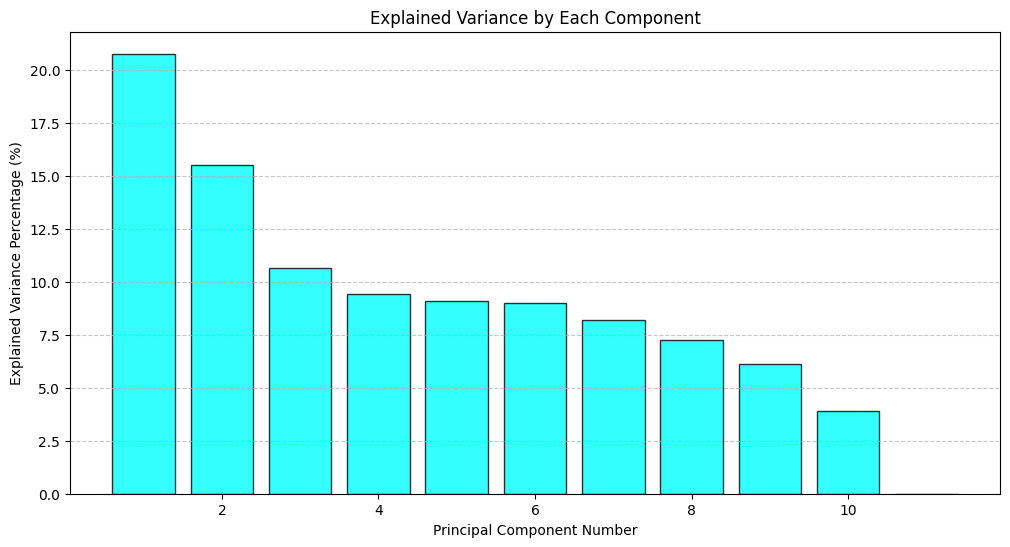

In [ ]:
# Assuming PCA is already applied and `pca` is the PCA object
explained_variance_ratio = pca.explained_variance_ratio_  # Get explained variance ratio
explained_variance_percentage = explained_variance_ratio * 100  # Convert to percentage

# Plot the explained variance by each component
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_percentage) + 1), explained_variance_percentage,
        color='cyan', alpha=0.8, edgecolor='black')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Percentage (%)')
plt.title('Explained Variance by Each Component')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()